# Proyecto IMT2200 - Análisis de Datos

En este notebook, revisaremos y analizaremos los datos obtenidos hasta el momento, con el objetivo de responder las preguntas de investigación planteadas al inicio del proyecto. A lo largo de este análisis, profundizaremos en los distintos aspectos y patrones presentes en los datos para ofrecer conclusiones informadas y relevantes para cada pregunta de interés.

In [5]:
import pandas as pd
import seaborn as sns
import geopandas as gpd
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from datetime import datetime

## Apertura de Datos Económicos

A continuación, procederemos a cargar los datos desde la carpeta que contiene la información recopilada sobre economía. Estos datos serán la base de nuestro análisis para explorar las tendencias y relaciones económicas clave en el contexto de nuestro proyecto.

In [6]:
#from google.colab import drive
#drive.mount('/content/drive')

In [7]:
path = '/content/drive/MyDrive/CD-FINAL/'

In [8]:
# df_economia = pd.read_parquet(f"{path}datos de economia/DataFrames_economia.parquet")
df_economia = pd.read_parquet("datos de economia/DataFrames_economia.parquet")
df_economia.info()
df_economia

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   fecha                            78 non-null     datetime64[ns]
 1   PIB_precio_corriente             72 non-null     float64       
 2   PIB_volumen_encadenado           72 non-null     float64       
 3   PIB_volumen_desestacionalizado   72 non-null     float64       
 4   ingreso_mediano_real             75 non-null     float64       
 5   mineria                          75 non-null     float64       
 6   manufactura                      75 non-null     float64       
 7   electricidad                     75 non-null     float64       
 8   suministro_agua                  75 non-null     float64       
 9   construccion                     75 non-null     float64       
 10  comercio_mayorista_minorista     75 non-null     float64       


fecha  PIB_precio_corriente  PIB_volumen_encadenado  \
0  2018-01-01          46986.271371            46511.870532   
1  2018-02-01          46986.271371            46511.870532   
2  2018-03-01          46986.271371            46511.870532   
3  2018-04-01          47033.691982            47707.607554   
4  2018-05-01          47033.691982            47707.607554   
..        ...                   ...                     ...   
73 2024-02-01                   NaN                     NaN   
74 2024-03-01                   NaN                     NaN   
75 2024-04-01                   NaN                     NaN   
76 2024-05-01                   NaN                     NaN   
77 2024-06-01                   NaN                     NaN   

    PIB_volumen_desestacionalizado  ingreso_mediano_real  mineria  \
0                     46837.401890                109.38   105.82   
1                     46837.401890                108.97   105.75   
2                     46837.401890                109.53   105.57   
3                     47461.533987                109.84   107.08   
4                     47461.533987                109.69   105.03   
..                             ...                   ...      ...   
73                             NaN                158.13   160.50   
74                             NaN                159.19   163.57   
75                             NaN                   NaN      NaN   
76                             NaN                   NaN      NaN   
77                             NaN                   NaN      NaN   

    manufactura  electricidad  suministro_agua  construccion  ...  \
0        107.48        112.61           109.26        110.41  ...   
1        107.39        110.06           109.40        110.93  ...   
2        107.93        112.35           114.01        110.93  ...   
3        108.77        110.00           110.75        111.72  ...   
4        108.61        111.30           110.72        112.88  ...   
..          ...           ...              ...           ...  ...   
73       160.70        152.19           162.73        158.77  ...   
74       161.52        159.05           163.00        159.10  ...   
75          NaN           NaN              NaN           NaN  ...   
76          NaN           NaN              NaN           NaN  ...   
77          NaN           NaN              NaN           NaN  ...   

    servicios_administrativos_apoyo  administracion_publica  educacion  \
0                            107.46                  111.54     112.71   
1                            103.69                  111.32     112.85   
2                            106.72                  111.84     112.29   
3                            105.35                  111.71     112.48   
4                            106.15                  111.34     112.78   
..                              ...                     ...        ...   
73                           155.63                  149.66     158.40   
74                           156.55                  150.97     160.43   
75                              NaN                     NaN        NaN   
76                              NaN                     NaN        NaN   
77                              NaN                     NaN        NaN   

    salud_humana  arte_entretenimiento  fuerza_laboral_trimestral  \
0         107.82                105.61                9438.115290   
1         108.88                104.70                9449.494321   
2         110.55                105.31                9456.608476   
3         110.81                105.57                9441.395486   
4         111.01                104.66                9465.329449   
..           ...                   ...                        ...   
73        159.65                164.47               10174.908428   
74        161.30                167.77               10193.230625   
75           NaN                   NaN               10209.534117   
76           N

## Carga de Datos del Económicos por región

In [9]:
# df_economia_region = pd.read_parquet(f"{path}datos de economia/df_economia_final.parquet")
df_economia_region = pd.read_parquet("datos de economia/df_economia_final.parquet")
df_economia_region.info()
df_economia_region

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Periodo_trimestral  736 non-null    datetime64[ns]
 1   Consumo_Hogares     736 non-null    float64       
 2   CodRegion           736 non-null    int64         
 3   Region_x            713 non-null    object        
 4   Ctas_Nacional       713 non-null    float64       
 5   Saldo_Nacional      713 non-null    float64       
 6   Ctas_Extranjera     713 non-null    float64       
 7   Saldo_Extranjero    713 non-null    float64       
 8   Saldo_Vista         713 non-null    float64       
 9   Region_y            736 non-null    object        
 10  Fuerza_Trabajo      736 non-null    float64       
 11  Ocupados            736 non-null    float64       
 12  Tasa_Desocupacion   736 non-null    float64       
 13  PIB_Regional        736 non-null    float64       

Periodo_trimestral  Consumo_Hogares  CodRegion       Region_x  \
0           2013-03-01       393.516067          1       Tarapaca   
1           2013-06-01       396.035933          1       Tarapaca   
2           2013-09-01       414.969278          1       Tarapaca   
3           2013-12-01       447.752190          1       Tarapaca   
4           2014-03-01       402.835411          1       Tarapaca   
..                 ...              ...        ...            ...   
731         2023-06-01     16383.297847         13  Metropolitana   
732         2023-09-01     16034.061789         13  Metropolitana   
733         2023-12-01     17149.969954         13  Metropolitana   
734         2024-03-01     15553.203250         13  Metropolitana   
735         2024-06-01     16517.536678         13  Metropolitana   

     Ctas_Nacional  Saldo_Nacional  Ctas_Extranjera  Saldo_Extranjero  \
0     4.139133e+04    1.799732e+06       666.333333      1.092781e+07   
1     4.204000e+04    1.785954e+06       664.666667      1.101341e+07   
2     4.273100e+04    1.853857e+06       669.000000      1.116178e+07   
3     4.340833e+04    1.832446e+06       667.666667      1.289925e+07   
4     4.393533e+04    1.909806e+06       668.000000      1.379185e+07   
..             ...             ...              ...               ...   
731   6.065315e+06    1.209344e+06    429379.333333      2.209989e+06   
732   6.517317e+06    1.106488e+06    480266.666667      1.787989e+06   
733   7.034871e+06    1.037563e+06    533406.000000      1.535191e+06   
734   7.459227e+06    1.034034e+06    581706.000000      1.379730e+06   
735   7.892439e+06    1.004330e+06    630182.000000      1.248800e+06   

      Saldo_Vista       Region_y  Fuerza_Trabajo     Ocupados  \
0    1.928896e+04       Tarapaca      142.670496   136.036022   
1    2.021345e+04       Tarapaca      151.111341   140.688553   
2    2.027268e+04       Tarapaca      154.507437   145.272515   
3    2.150547e+04       Tarapaca      155.474256   145.933936   
4    2.182164e+04       Tarapaca      158.197040   147.823280   
..            ...            ...             ...          ...   
731  3.777679e+06  Metropolitana     4443.822474  4033.025196   
732  3.662006e+06  Metropolitana     4469.990997  4044.122061   
733  3.735128e+06  Metropolitana     4497.930053  4065.239972   
734  3.833088e+06  Metropolitana     4525.393446  4102.689078   
735  3.832904e+06  Metropolitana     4560.664160  4164.908120   

     Tasa_Desocupacion  PIB_Regional         Region  
0             4.647879    811.931803       Tarapaca  
1             6.885483    926.814620       Tarapaca  
2             5.976382   1044.963002       Tarapaca  
3             6.137231   1135.992471       Tarapaca  
4             6.557147    977.620431       Tarapaca  
..                 ...           ...            ...  
731           9.244615  21281.075679  Metropolitana  
732           9.527413  20673.921435  Metropolitana  
733           9.620284  22032.121888  Metropolitana  
734           9.340321  21124.552771  Metropolitana  
735           8.677670  21484.966717  Metropolitana  

[736 rows x 15 columns]

## Carga de Datos del Índice de Criminalidad
A continuación, procederemos a cargar los datos almacenados en la carpeta que contiene información sobre los índices de criminalidad en las comunas de la Región Metropolitana de Chile. Estos datos servirán como base para nuestro análisis, permitiéndonos examinar las variaciones y tendencias en el contexto del proyecto.

In [10]:
# df_ind_crime = pd.read_parquet(f"{path}datos de indice de criminalidad/DataFrames_total_regiones.parquet")
df_ind_crime = pd.read_parquet(f"datos de indice de criminalidad/DataFrames_total_regiones.parquet")
df_ind_crime.info()
df_ind_crime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Region_name                               736 non-null    object        
 1   cod_lugar                                 736 non-null    int64         
 2   Periodo_trimestral                        736 non-null    datetime64[ns]
 3   Delitos violentos                         736 non-null    float64       
 4   Delitos asociados a drogas                736 non-null    float64       
 5   Delitos asociados a armas                 736 non-null    float64       
 6   Delitos contra la propiedad no violentos  736 non-null    float64       
 7   Incivilidades                             736 non-null    float64       
 8   Otros delitos o faltas                    736 non-null    float64       
dtypes: datetime64[ns](1), float64(6),

0    Region_name  cod_lugar Periodo_trimestral  Delitos violentos  \
0    Antofagasta          2         2013-03-01           1.712333   
1    Antofagasta          2         2013-06-01           1.675000   
2    Antofagasta          2         2013-09-01           1.627667   
3    Antofagasta          2         2013-12-01           1.708667   
4    Antofagasta          2         2014-03-01           1.650333   
..           ...        ...                ...                ...   
731        Ñuble         16         2023-06-01         875.000000   
732        Ñuble         16         2023-09-01         908.000000   
733        Ñuble         16         2023-12-01         971.000000   
734        Ñuble         16         2024-03-01           1.022000   
735        Ñuble         16         2024-06-01         839.333333   

0    Delitos asociados a drogas  Delitos asociados a armas  \
0                     40.666667                  52.000000   
1                     84.333333                  62.666667   
2                     74.333333                  67.000000   
3                     47.000000                  54.666667   
4                     50.000000                  67.666667   
..                          ...                        ...   
731                   44.000000                  53.666667   
732                   28.333333                  29.333333   
733                   23.666667                  46.000000   
734                   40.000000                  24.333333   
735                   41.000000                 142.333333   

0    Delitos contra la propiedad no violentos  Incivilidades  \
0                                    1.587000       1.905000   
1                                    1.581667       2.539333   
2                                    1.489667       2.331667   
3                                    1.515333       2.223333   
4                                    1.631000       1.866000   
..                                        ...            ...   
731                                746.333333     699.666667   
732                                703.333333     747.000000   
733                                718.666667     704.000000   
734                                681.000000     716.000000   
735                                703.000000     670.000000   

0    Otros delitos o faltas  
0                  1.742333  
1                  1.930000  
2                  1.787333  
3                  1.865333  
4                  1.743667  
..                      ...  
731                1.287000  
732                1.253667  
733                1.398000  
734                1.396333  
735                1.586000  

[736 rows x 9 columns]

## Carga de Datos del Índice de Corrupción
A continuación, cargaremos los datos almacenados en la carpeta que contiene información sobre los índices de corrupción en las comunas de la Región Metropolitana de Chile. Estos datos constituirán la base de nuestro análisis, permitiéndonos examinar variaciones y tendencias relevantes dentro del contexto del proyecto. Cabe mencionar que, no se ha logrado obtener una gran cantidad de información en esta área.

In [11]:
# df_corrupcion = pd.read_parquet(f"{path}datos de corupcion/DataFrames_corupcion.parquet")
df_corrupcion = pd.read_parquet(f"datos de corupcion/DataFrames_corupcion.parquet")
df_corrupcion.info()
df_corrupcion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Año          14 non-null     int64  
 1   Año inicio   8 non-null      float64
 2   Año fin      8 non-null      float64
 3   Monto        14 non-null     object 
 4   Sector       14 non-null     object 
 5   Comuna       14 non-null     object 
 6   Posición     13 non-null     object 
 7   Perjudicado  9 non-null      object 
 8   Delitos      12 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 1.1+ KB


Año  Año inicio  Año fin           Monto     Sector        Comuna  \
0   2024         NaN      NaN  41.000.000.000    Derecha         Maipú   
1   2021      2017.0   2020.0  10.210.000.000     Centro   San Joaquín   
2   2024         NaN      NaN   8.000.000.000    Derecha    Las Condes   
3   2023         NaN      NaN   4.500.000.000    Derecha      Vitacura   
4   2020      2020.0   2022.0   1.600.000.000  Izquierda   Providencia   
5   2022      2020.0   2023.0   1.291.937.035  Izquierda      Recoleta   
6   2020      2020.0   2024.0     816.000.000    Derecha      Santiago   
7   2018         NaN      NaN     680.000.000    Derecha  Lo Barnechea   
8   2024      2019.0   2024.0     200.000.000  Izquierda      Recoleta   
9   2021         NaN      NaN     188.000.000    Derecha      Santiago   
10  2024      2015.0   2021.0     176.000.000    Derecha         Ñuñoa   
11  2020         NaN      NaN      59.595.096    Derecha    Las Condes   
12  2019      2017.0   2019.0      31.000.000  Izquierda   Providencia   
13  2023      2023.0   2024.0      20.000.000  Izquierda      Recoleta   

                 Posición Perjudicado  \
0                 Alcalde   Municipio   
1                 Alcalde   Municipio   
2                 Alcalde        None   
3                 Alcalde   Municipio   
4   Funcionario municipal   Municipio   
5                 Alcalde        None   
6                    None       Fisco   
7                 Alcalde   Municipio   
8                 Alcalde        None   
9                 Alcalde        None   
10                Alcalde   Municipio   
11                Alcalde        None   
12                Alcalde   Municipio   
13                Alcalde   Municipio   

                                              Delitos  
0   fraude al fisco y falsificación de instrumento...  
1                  saldos no rendidos ni justificados  
2         fraude al fisco, asignación de horas extras  
3   malversación de caudales públicos, fraude al F...  
4   malversación de caudales públicos, aplicación ...  
5                                                None  
6   corrupción, soborno, cohecho, financiamiento i...  
7   malversación de caudales públicos, fraude al F...  
8   cohecho, administración desleal, fraude al Fis...  
9           Pagos de horas extra, pagos de honorarios  
10                                    Fraude al fisco  
11                                               None  
12                                Pago de horas extra  
13  cohecho, fraude al fisco, estafa, administraci...

## Carga de Archivos Geolocalizados
A continuación, cargaremos el archivo que contiene información geolocalizada. Esto nos permitirá crear representaciones gráficas para visualizar mejor los cambios y tendencias, especialmente en aquellos aspectos clave que queremos analizar en el contexto del proyecto.

In [12]:
# df_mapa = gpd.read_file(f"{path}datos de mapas/comunas.shp")
df_mapa = gpd.read_file("datos de mapas/comunas.shp")
df_mapa.info()
df_mapa

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   objectid    346 non-null    int64   
 1   shape_leng  346 non-null    float64 
 2   dis_elec    346 non-null    int64   
 3   cir_sena    346 non-null    int64   
 4   cod_comuna  346 non-null    int64   
 5   codregion   346 non-null    int64   
 6   st_area_sh  346 non-null    float64 
 7   st_length_  346 non-null    float64 
 8   Region      346 non-null    object  
 9   Comuna      346 non-null    object  
 10  Provincia   346 non-null    object  
 11  geometry    346 non-null    geometry
dtypes: float64(3), geometry(1), int64(5), object(3)
memory usage: 32.6+ KB


objectid     shape_leng  dis_elec  cir_sena  cod_comuna  codregion  \
0          48  170038.624165        16         8        6204          6   
1          29  125730.104795        15         8        6102          6   
2          30   63026.084422        15         8        6103          6   
3          31   89840.903562        15         8        6104          6   
4          78  122626.493264        23        11        9121          9   
..        ...            ...       ...       ...         ...        ...   
341       255  130240.555805        19        10       16305         16   
342       253  311061.932415        19        10       16304         16   
343       245  159257.906431        19        10       16303         16   
344       243  157467.049667        19        10       16104         16   
345       242  276848.826499        19        10       16302         16   

       st_area_sh     st_length_                                    Region  \
0    9.685774e+08  206184.271675  Región del Libertador Bernardo O'Higgins   
1    4.157446e+08  151911.576827  Región del Libertador Bernardo O'Higgins   
2    1.448565e+08   76355.326122  Región del Libertador Bernardo O'Higgins   
3    3.256572e+08  108874.623150  Región del Libertador Bernardo O'Higgins   
4    6.990727e+08  156680.410681                    Región de La Araucanía   
..            ...            ...                                       ...   
341  8.751006e+08  160459.137929                           Región de Ñuble   
342  2.393007e+09  388109.613857                           Región de Ñuble   
343  7.638173e+08  195593.933727                           Región de Ñuble   
344  1.044405e+09  196962.664313                           Región de Ñuble   
345  2.764576e+09  346671.611064                           Región de Ñuble   

          Comuna      Provincia  \
0      Marchigüe  Cardenal Caro   
1        Codegua      Cachapoal   
2         Coinco      Cachapoal   
3       Coltauco      Cachapoal   
4       Cholchol         Cautín   
..           ...            ...   
341  San Nicolás        Punilla   
342   San Fabián        Punilla   
343       Ñiquén        Punilla   
344    El Carmen          Ñuble   
345     Coihueco        Punilla   

                                              geometry  
0    POLYGON ((-7992818.789 -4056669.319, -7992731....  
1    POLYGON ((-7831651.813 -4022443.109, -7831596....  
2    POLYGON ((-7892616.357 -4060673.364, -7892621....  
3    POLYGON ((-7906457.717 -4051723.734, -7906266....  
4    POLYGON ((-8121756.186 -4645860.295, -8121644....  
..                                                 ...  
341  POLYGON ((-8041950.854 -4349201.562, -8041735....  
342  POLYGON ((-7931328.549 -4363544.179, -7931320....  
343  POLYGON ((-8026032.185 -4319505.012, -8025933....  
344  POLYGON ((-7986315.104 -4415272.935, -7986309....  
345  POLYGON ((-7927593.046 -4435376.051, -7927638....  

[346 rows x 12 columns]

### ahora nos dedicaremos a principalmente de limpiar los datos y acortar todo para que esten en un rango desde el ano 2018 a mediados de 2024

In [13]:
df_ind_crime = df_ind_crime[(df_ind_crime["Periodo_trimestral"] <= "2024-06-30") & (df_ind_crime["Periodo_trimestral"] >= "2018-01-01")]
df_economia = df_economia[(df_economia["fecha"] <= "2024-06-30") & (df_economia["fecha"] >= "2018-01-01")]

## Manejo de Datos Faltantes en Índices Económicos con Algoritmos de Predicción
Dado que estamos utilizando información económica muy reciente, es común que algunos datos no estén aún disponibles, generando casillas con valores faltantes (NaN) en nuestro DataFrame de índices económicos. Para abordar este problema, hemos decidido realizar pruebas de imputación mediante métodos de predicción, rellenando los datos faltantes con estimaciones fundamentadas. obteniendo así una visión más completa y confiable sobre los posibles valores de los índices que aún no tienen datos disponibles.

In [14]:
df_economia_columns_nan = list(df_economia[df_economia.columns[df_economia.isnull().any()]].columns)
print("la siguiente lista son las colunmas que poseen almenos un dato tipo NaN: \n", df_economia_columns_nan)

la siguiente lista son las colunmas que poseen almenos un dato tipo NaN: 
 ['PIB_precio_corriente', 'PIB_volumen_encadenado', 'PIB_volumen_desestacionalizado', 'ingreso_mediano_real', 'mineria', 'manufactura', 'electricidad', 'suministro_agua', 'construccion', 'comercio_mayorista_minorista', 'transporte_almacenaje', 'alojamiento_alimentos', 'informacion_comunicacion', 'finanzas_seguros', 'bienes_raices', 'servicios_cientificos_tecnicos', 'servicios_administrativos_apoyo', 'administracion_publica', 'educacion', 'salud_humana', 'arte_entretenimiento']


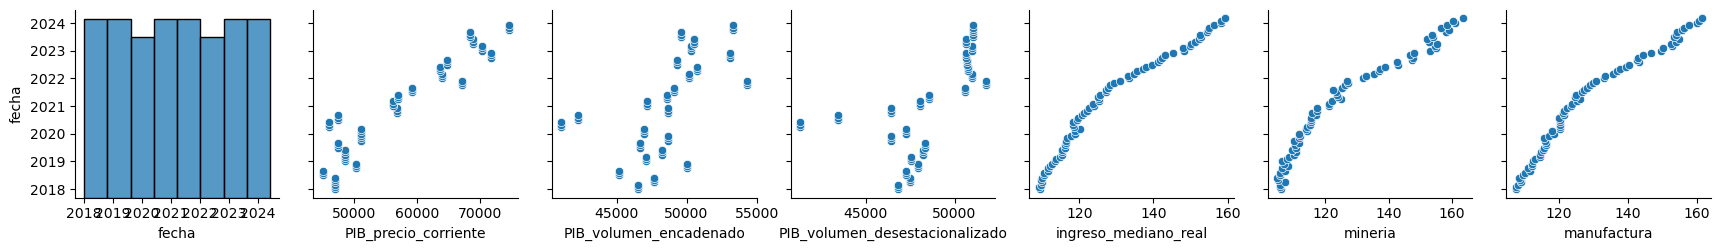

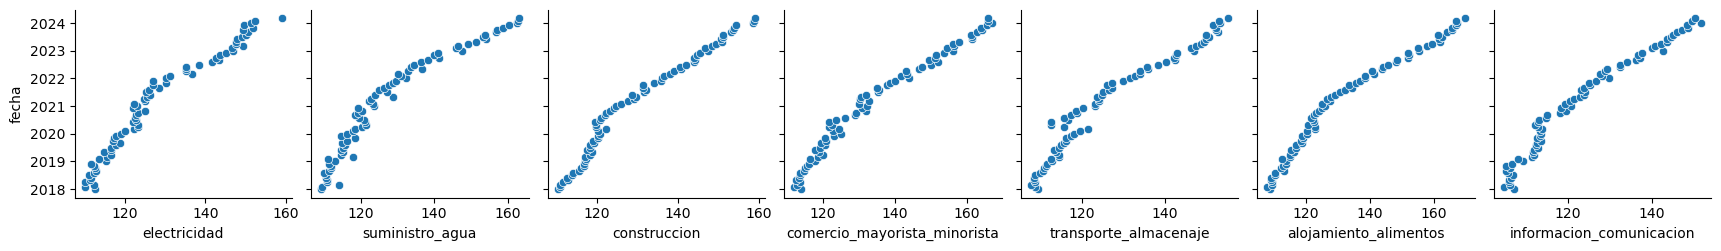

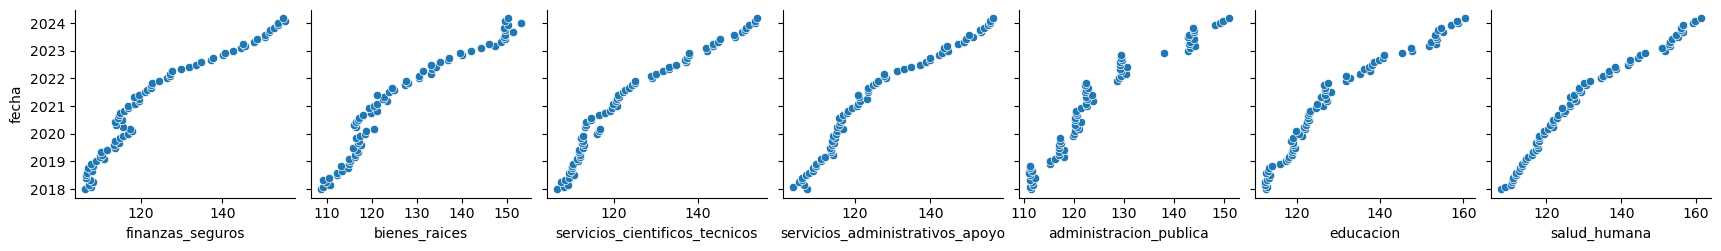

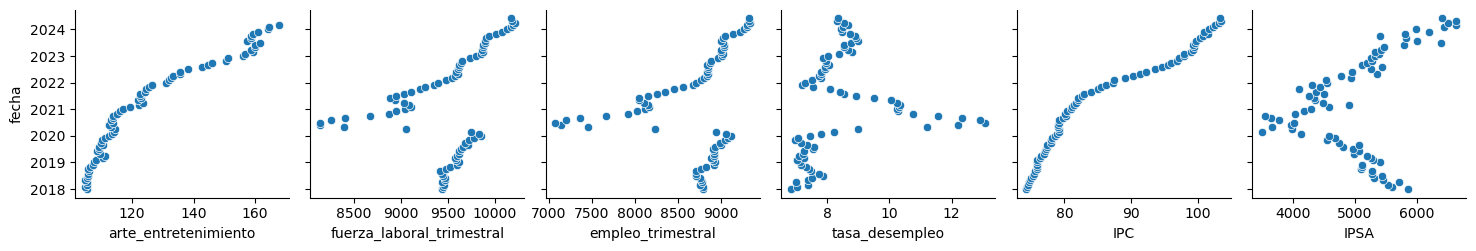

In [15]:
df_economia_columns = list(df_economia.columns)

for i in range(0, len(df_economia_columns), 7):
    sns.pairplot(df_economia, y_vars="fecha", x_vars=df_economia_columns[i : i+7])

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, r2_score

df_economia_1 = df_economia.copy()

# 1. convertir las fechas a un valor numerico (meses desde 2017)
fecha_base = pd.Timestamp("2017-01-01")
df_economia_1['fecha_num'] = (df_economia_1['fecha'].dt.year - fecha_base.year) * 12 + df_economia_1['fecha'].dt.month - fecha_base.month

# 2. Seleccionar las columnas numericas
columnas_numericas = list(df_economia_1.select_dtypes(include=['float64', 'int64']).columns)

# 3. Eescalar las columnas numericas
scaler = StandardScaler()
df_economia_1_scaled = df_economia_1.copy()
df_economia_1_scaled[columnas_numericas] = scaler.fit_transform(df_economia_1_scaled[columnas_numericas])

# 4. dividir el conjunto de datos completos
df_economia_completo = df_economia_1_scaled.dropna()
df_economia_conocido = df_economia_completo.sample(frac=0.8, random_state=42)  # 80% para entrenamiento
df_economia_oculto = df_economia_completo.drop(df_economia_conocido.index)  # 20% para prueba

# 5. ocultar valores aleatorios en el conjunto de prueba
df_economia_oculto_masked = df_economia_oculto.copy()
np.random.seed(42)
for col in columnas_numericas:
    mask = np.random.rand(len(df_economia_oculto_masked)) < 0.3  # 30% de valores ocultos
    df_economia_oculto_masked.loc[mask, col] = np.nan

# 6. imputar valores utilizando KNN
imputer = KNNImputer(n_neighbors=3)
df_economia_oculto_imputed = df_economia_oculto_masked.copy()
df_economia_oculto_imputed[columnas_numericas] = imputer.fit_transform(df_economia_oculto_imputed[columnas_numericas])
df_economia_1_scaled[columnas_numericas] = imputer.fit_transform(df_economia_1_scaled[columnas_numericas])

# 7. desescalar los valores imputados y reales
df_economia_oculto_imputed[columnas_numericas] = scaler.inverse_transform(df_economia_oculto_imputed[columnas_numericas])
df_economia_oculto[columnas_numericas] = scaler.inverse_transform(df_economia_oculto[columnas_numericas])
df_economia_1[columnas_numericas] = scaler.inverse_transform(df_economia_1_scaled[columnas_numericas])

mse_mean = 0
r2_mean = 0
for col in columnas_numericas:
    y_true = df_economia_oculto[col].dropna()
    y_pred = df_economia_oculto_imputed.loc[y_true.index, col]
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mse_mean += mse
    r2_mean += r2

    # print(f"Columna: {col}")
    # print(f"  Mean Squared Error (MSE): {mse:.4f}")
    # print(f"  R²: {r2:.4f}")

num_columnas = len(columnas_numericas)
print(f"Promedio de Mean Squared Error (MSE): {mse_mean / num_columnas}")
print(f"Promedio de R²: {r2_mean / num_columnas}")

Promedio de Mean Squared Error (MSE): 150406.77183393415
Promedio de R²: 0.872919256033067


In [17]:
from sklearn.experimental import enable_iterative_imputer  # Habilita el IterativeImputer
from sklearn.impute import IterativeImputer
#from sklearn.ensemble import RandomForestRegressor

df_economia_2 = df_economia.iloc[:,1:].copy()

imputer = IterativeImputer(max_iter=100,random_state=42)
imputed = imputer.fit_transform(df_economia_2)
df_imputed = pd.DataFrame(imputed, columns=df_economia_2.columns)

df_imputed = pd.concat([df_economia["fecha"], df_imputed], axis=1)

df_imputed.info()
df_imputed


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   fecha                            78 non-null     datetime64[ns]
 1   PIB_precio_corriente             78 non-null     float64       
 2   PIB_volumen_encadenado           78 non-null     float64       
 3   PIB_volumen_desestacionalizado   78 non-null     float64       
 4   ingreso_mediano_real             78 non-null     float64       
 5   mineria                          78 non-null     float64       
 6   manufactura                      78 non-null     float64       
 7   electricidad                     78 non-null     float64       
 8   suministro_agua                  78 non-null     float64       
 9   construccion                     78 non-null     float64       
 10  comercio_mayorista_minorista     78 non-null     float64       


fecha  PIB_precio_corriente  PIB_volumen_encadenado  \
0  2018-01-01          46986.271371            46511.870532   
1  2018-02-01          46986.271371            46511.870532   
2  2018-03-01          46986.271371            46511.870532   
3  2018-04-01          47033.691982            47707.607554   
4  2018-05-01          47033.691982            47707.607554   
..        ...                   ...                     ...   
73 2024-02-01          74595.349842            53368.640678   
74 2024-03-01          75786.286141            53581.622926   
75 2024-04-01          74292.150244            53332.677241   
76 2024-05-01          74184.540786            53242.550863   
77 2024-06-01          74513.722466            53372.920258   

    PIB_volumen_desestacionalizado  ingreso_mediano_real     mineria  \
0                     46837.401890            109.380000  105.820000   
1                     46837.401890            108.970000  105.750000   
2                     46837.401890            109.530000  105.570000   
3                     47461.533987            109.840000  107.080000   
4                     47461.533987            109.690000  105.030000   
..                             ...                   ...         ...   
73                    53074.318861            158.130000  160.500000   
74                    53341.761800            159.190000  163.570000   
75                    53075.605905            156.279916  160.853693   
76                    53062.415440            155.925815  160.940564   
77                    53060.211704            155.949303  160.735639   

    manufactura  electricidad  suministro_agua  construccion  ...  \
0    107.480000    112.610000       109.260000    110.410000  ...   
1    107.390000    110.060000       109.400000    110.930000  ...   
2    107.930000    112.350000       114.010000    110.930000  ...   
3    108.770000    110.000000       110.750000    111.720000  ...   
4    108.610000    111.300000       110.720000    112.880000  ...   
..          ...           ...              ...           ...  ...   
73   160.700000    152.190000       162.730000    158.770000  ...   
74   161.520000    159.050000       163.000000    159.100000  ...   
75   157.836193    152.105434       157.188919    155.438482  ...   
76   157.515569    151.941310       156.796140    155.254494  ...   
77   157.569159    151.998434       156.420484    155.399346  ...   

    servicios_administrativos_apoyo  administracion_publica   educacion  \
0                        107.460000              111.540000  112.710000   
1                        103.690000              111.320000  112.850000   
2                        106.720000              111.840000  112.290000   
3                        105.350000              111.710000  112.480000   
4                        106.150000              111.340000  112.780000   
..                              ...                     ...         ...   
73                       155.630000              149.660000  158.400000   
74                       156.550000              150.970000  160.430000   
75                       154.542594              144.843390  156.360290   
76                       154.176183              144.026156  155.855487   
77                       154.083248              144.089589  155.707792   

    salud_humana  arte_entretenimiento  fuerza_laboral_trimestral  \
0     107.820000            105.610000                9438.115290   
1     108.880000            104.700000                9449.494321   
2     110.550000            105.310000                9456.608476   
3     110.810000            105.570000                9441.395486   
4     111.010000            104.660000                9465.329449   
..           ...                   ...                        ...   
73    159.650000            164.470000               10174.908428   
74    161.300000            167.770000               10193.230625   
75    157.962695            164.633

# Responder las preguntas propuestas
En esta sección del Jupyter Notebook, nos enfocaremos en responder las preguntas planteadas al inicio del proyecto. Para ello, utilizaremos EDA (Exploratory Data Analysis, por sus siglas en inglés) como herramienta principal. Aplicaremos diversos tipos de gráficos para visualizar los datos de manera clara y extraer conclusiones significativas a partir de la información recopilada hasta ahora.

###  ¿Existe una relacion significativa entre las tasas de desempleo y el aumento de la criminalidad en la region metropolitana?

La distribución de la tasa de desocupación de la región metropolitana se concentra en tasas bajas del 6%.

* Delitos violentos:

El análisis muestra que existe una posible segmentación en dos grupos (clusters) al observar la relación entre la tasa de desocupación y los delitos violentos. El cluster inferior , que incluye la mayoría de los datos, sugiere una relación positiva : a mayor tasa de desocupación, aumenta la cantidad de delitos violentos, lo que podría estar relacionado con factores como frustración económica o tensiones sociales. Por otro lado, el cluster superior parece ser un grupo pequeño y más disperso, sin un patrón claro, lo que podría deberse a factores externos como narcotráfico, conflictos sociales, etc. Cuando ambos clusters se analizan juntos, la relación global es negativa (-0.33) , ya que el cluster superior actúa como un conjunto de valores atípicos que distorsionan la compensación general

* Delitos asociados a las drogas:

En este análisis se observa que no hay una clara relación, hay demasiada dispersión. No se logra identificar la relación entre esas dos variables.

* Delitos asociados a las armas:

Aquí si se puede observar una relación negativa, a medida que aumenta la tasa de desocupación, la cantidad de delitos asociados a armas tiende a disminuir, aunque la La dispersión de los datos indica que no es un patrón muy fuerte.

* Delitos contra la propiedad no violentos:

Se nota claramente una relación negativa entre ambas variables, esto se puede deber a que debido a la alta desocupación prefiern evitar este tipo de delitos contra la propiedad. Factores como un mayor control policial en períodos de crisis económica o restricciones en el acceso a armas podrían influir en esta disminución.

* Incivilidades y otros delitos:

Aquí la relación parece ser más dispersa, sin un patrón claro entre la tasa de desocupación y estos tipos de delitos.



In [18]:
df_ind_crime_santiago = df_ind_crime[df_ind_crime['Region_name'] == 'Región Metropolitana de Santiago']
df_economia_santiago = df_economia_region[df_economia_region['Region'] == 'Metropolitana']

df_merge = df_ind_crime_santiago.drop(columns={'Region_name'}).merge(df_economia_santiago[['Tasa_Desocupacion','Periodo_trimestral']], how='left',on='Periodo_trimestral')

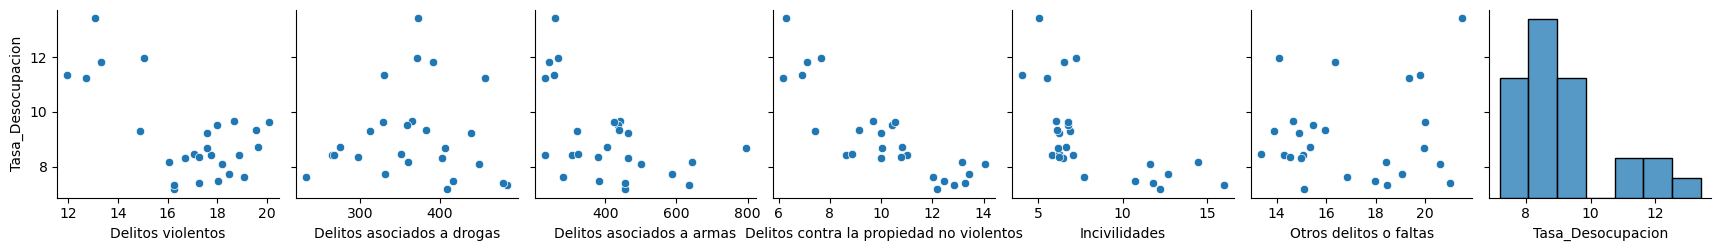

In [19]:
pairplot = sns.pairplot(df_merge, y_vars="Tasa_Desocupacion", x_vars=df_merge.columns[2:])
# pairplot.savefig('imagenes/pregunta 1/pairplot_indices_delitos_vs_tasa_desocupacion.png', bbox_inches="tight")
# plt.close()
plt.show()

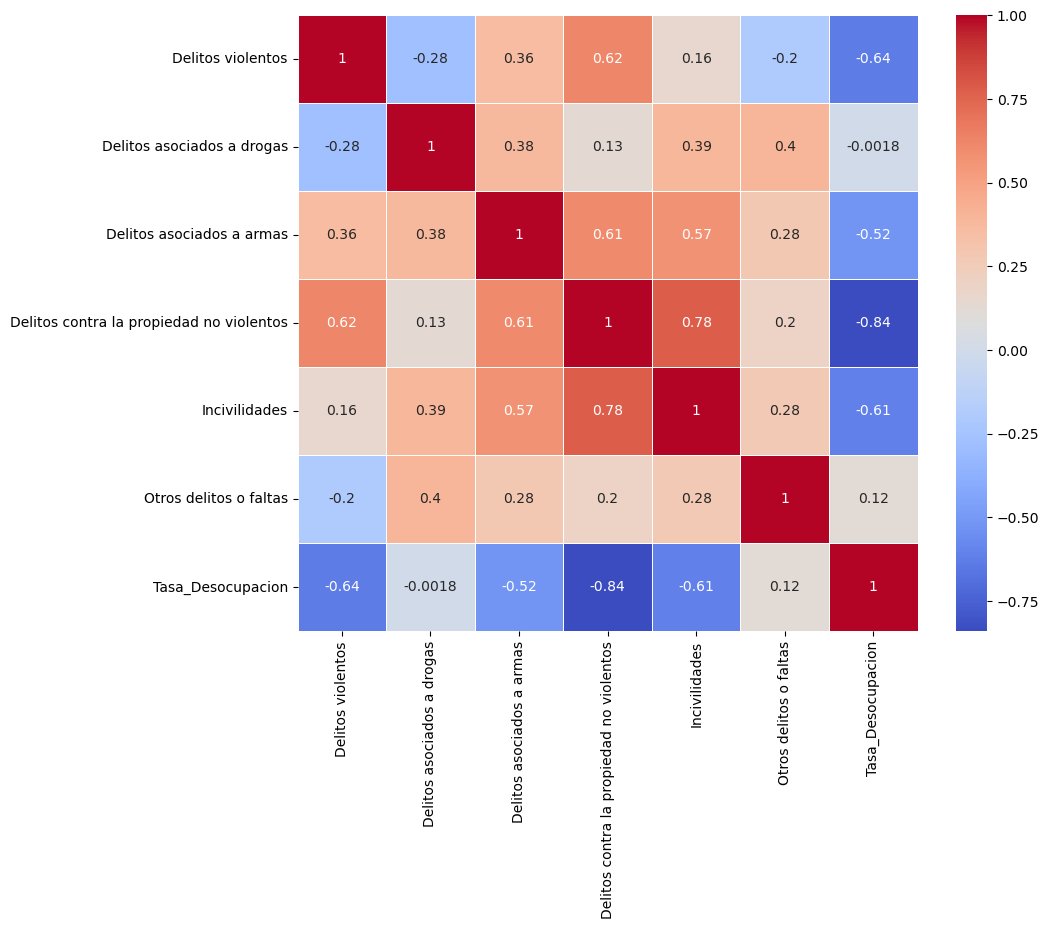

In [20]:
plt.figure(figsize=(10, 8))
correlaciones = df_merge.iloc[:, 2:].corr()

sns.heatmap(correlaciones, annot=True, linewidths=0.5, cmap='coolwarm')
# plt.savefig('imagenes/pregunta 1/heatmap_indices_delitos_vs_tasa_desocupacion.png', bbox_inches="tight")
# plt.close()
plt.show()

### ¿Como influye la riqueza de una Región en la concentracion de delitos en diferentes regiones de Chile?

#=============================================================#
REGION - Tarapacá
#=============================================================#


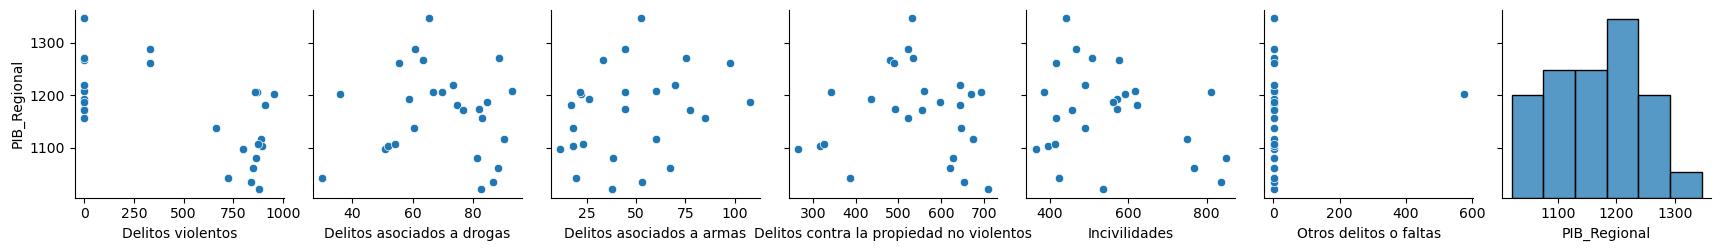

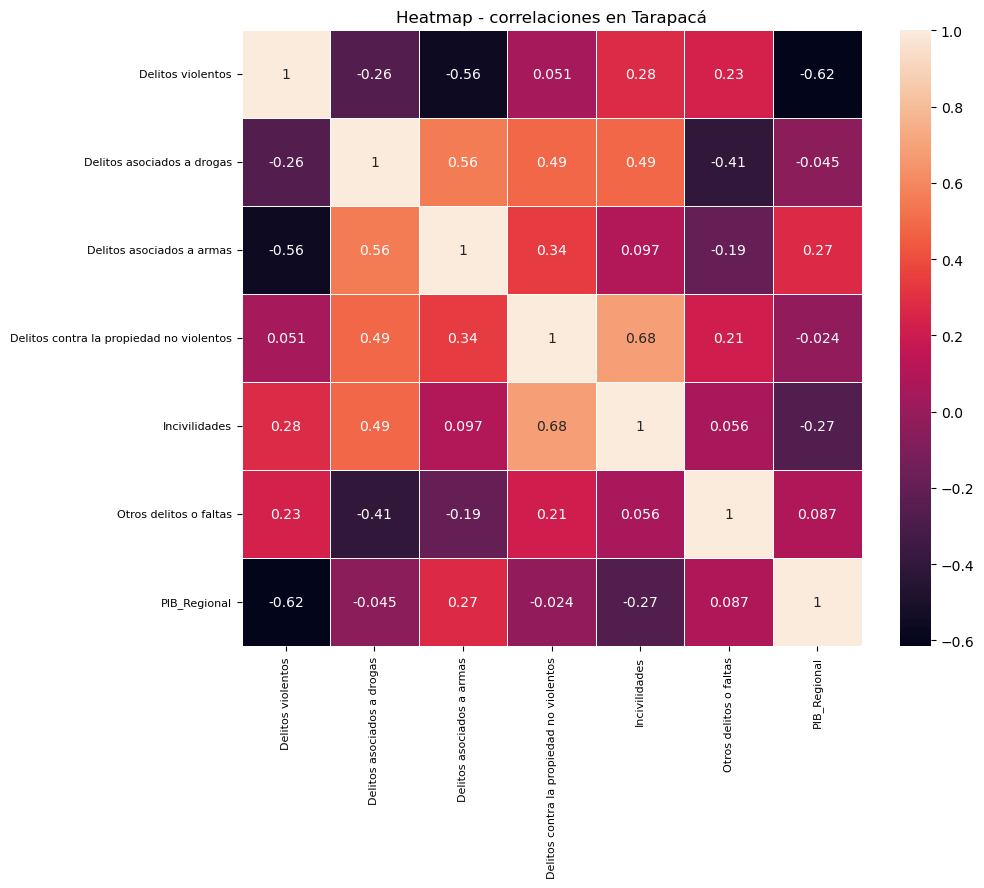

#=============================================================#
#=============================================================#
REGION - Atacama
#=============================================================#


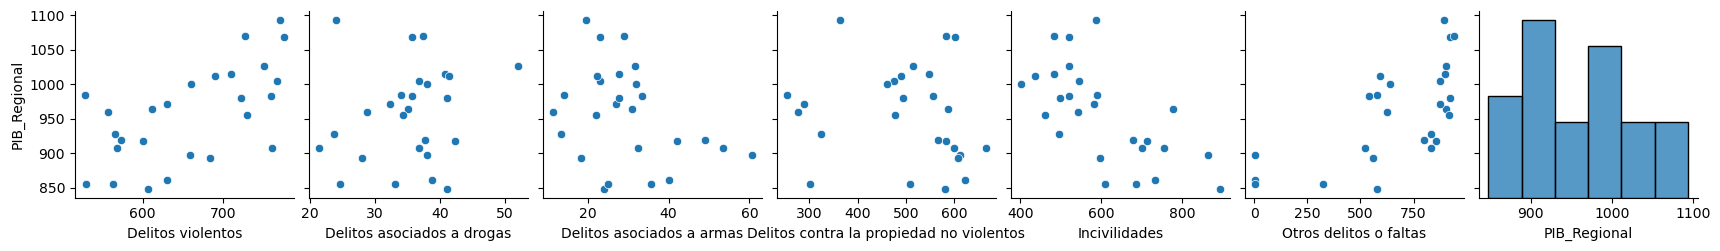

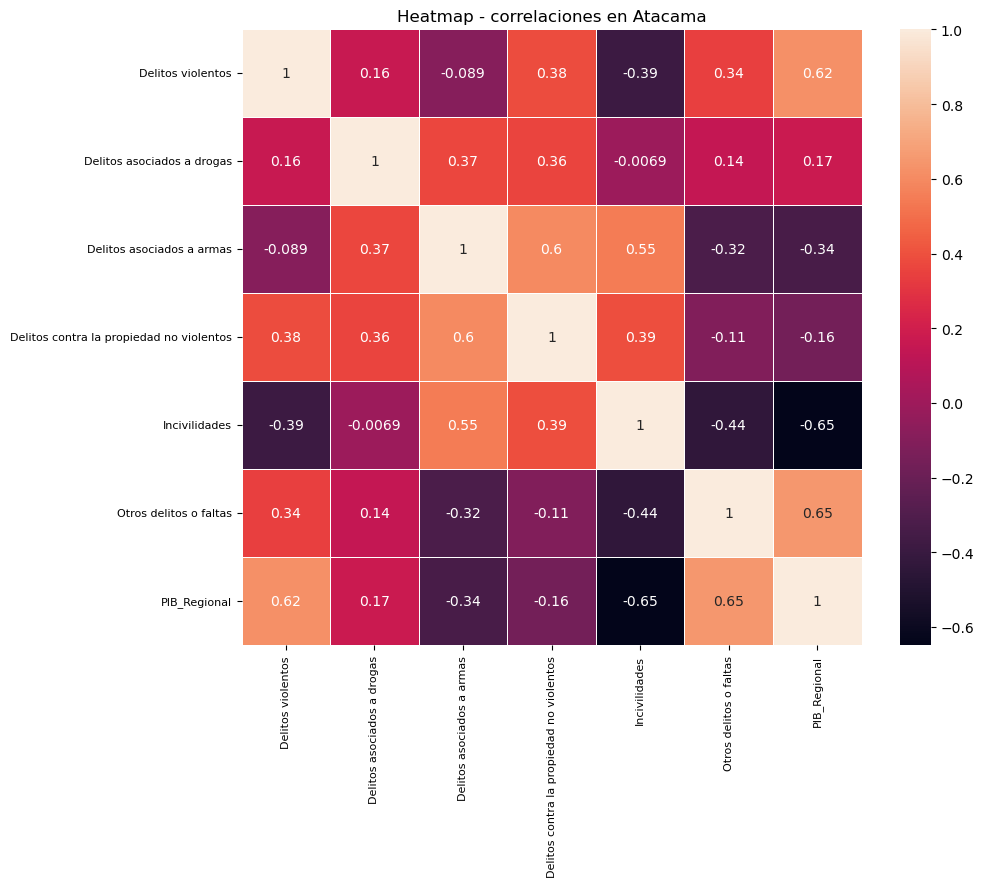

#=============================================================#
#=============================================================#
REGION - Antofagasta
#=============================================================#


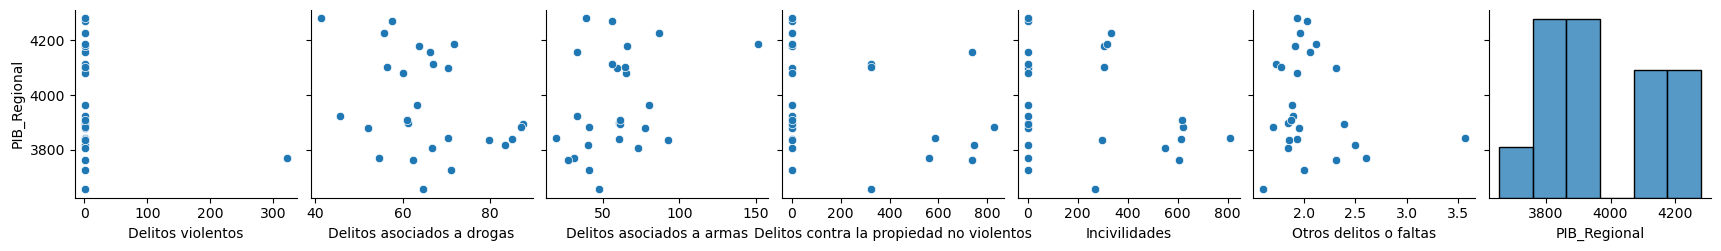

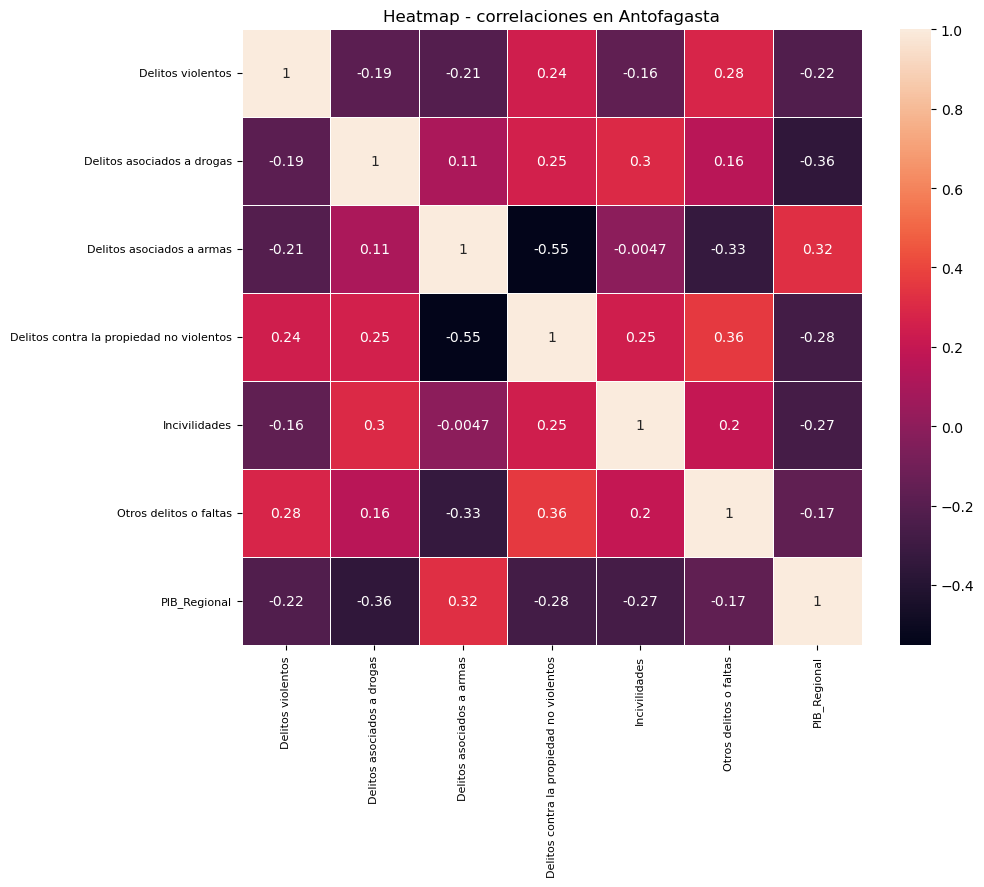

#=============================================================#
#=============================================================#
REGION - Coquimbo
#=============================================================#


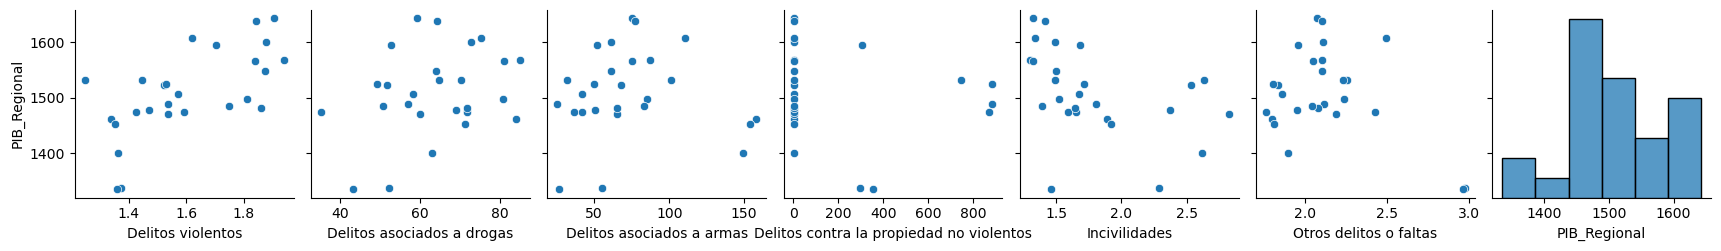

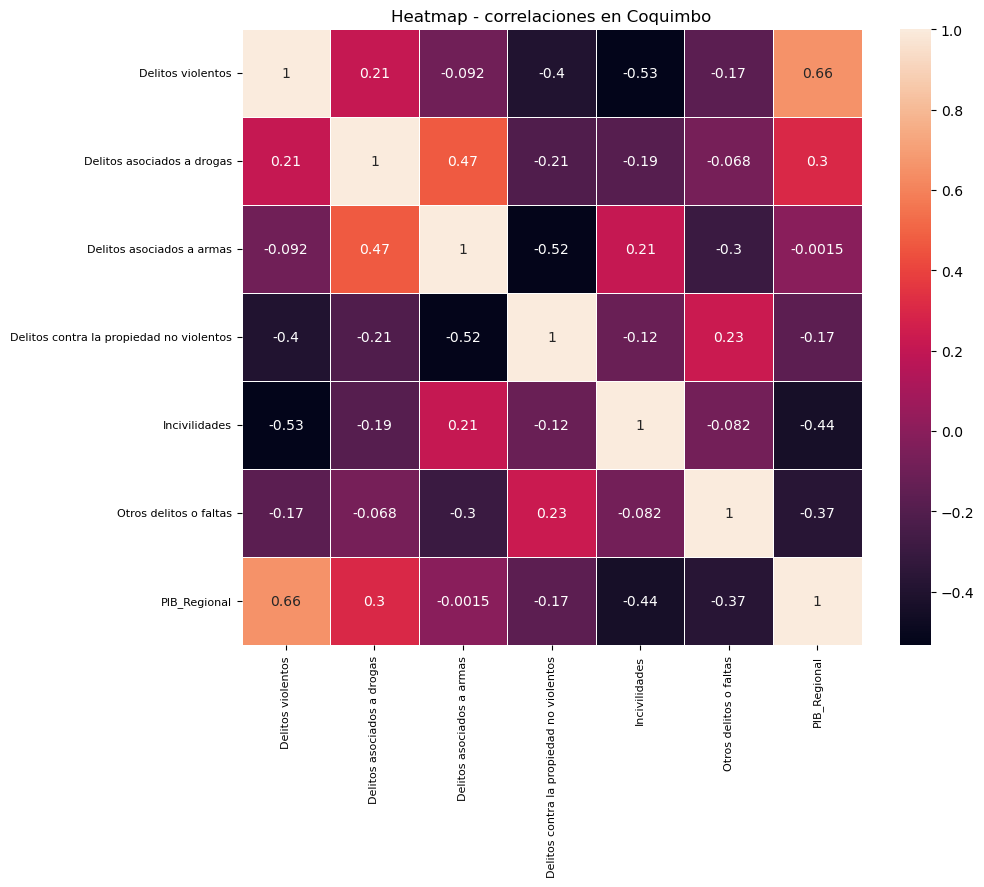

#=============================================================#
#=============================================================#
REGION - Valparaíso
#=============================================================#


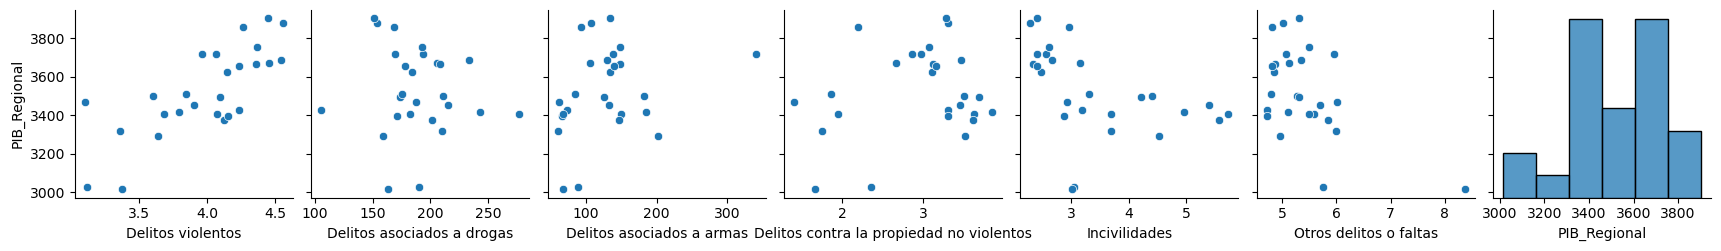

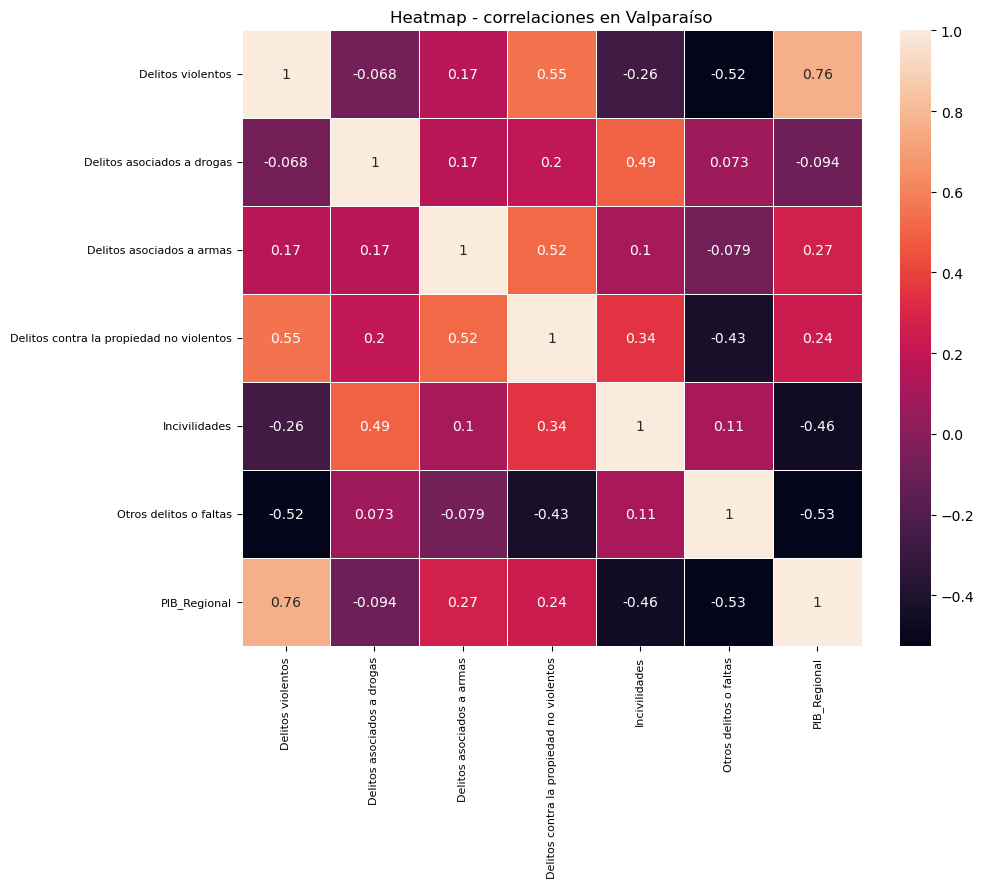

#=============================================================#
#=============================================================#
REGION - Arica y Parinacota
#=============================================================#


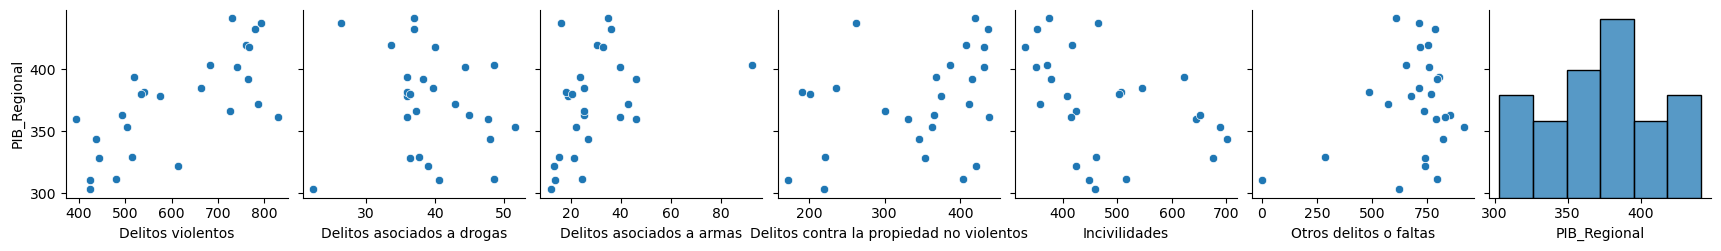

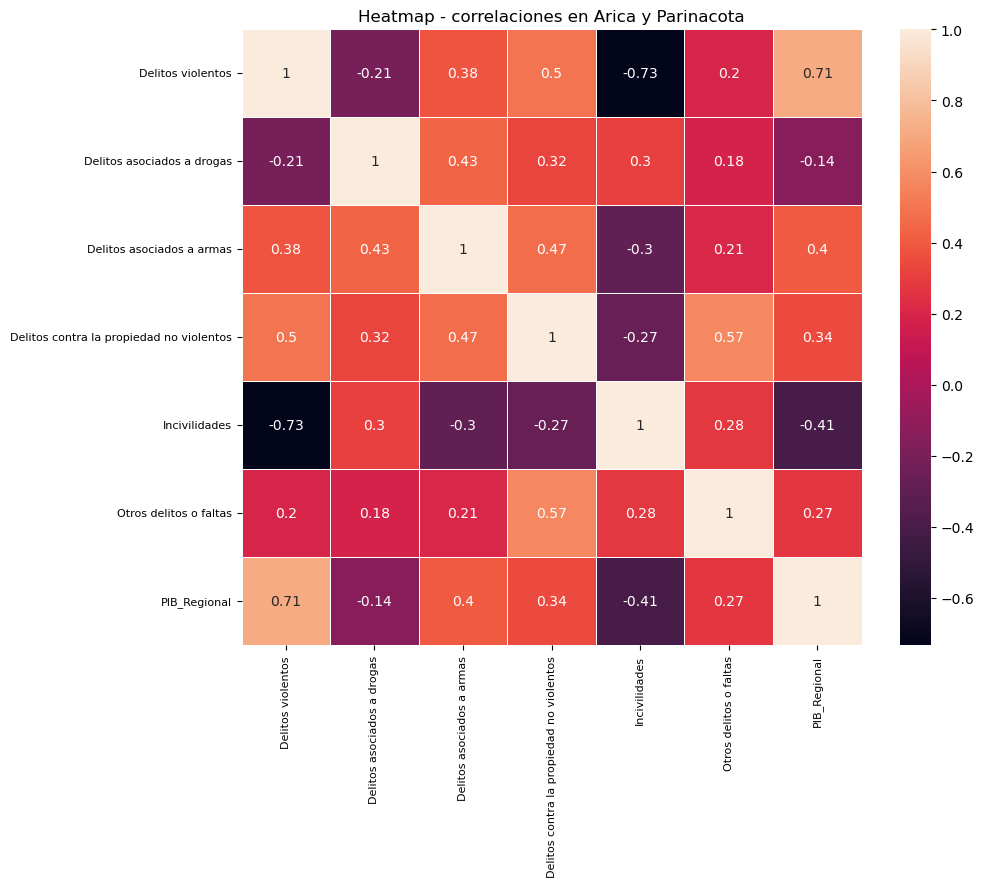

#=============================================================#
#=============================================================#
REGION - Magallanes y la Antártica Chilena
#=============================================================#


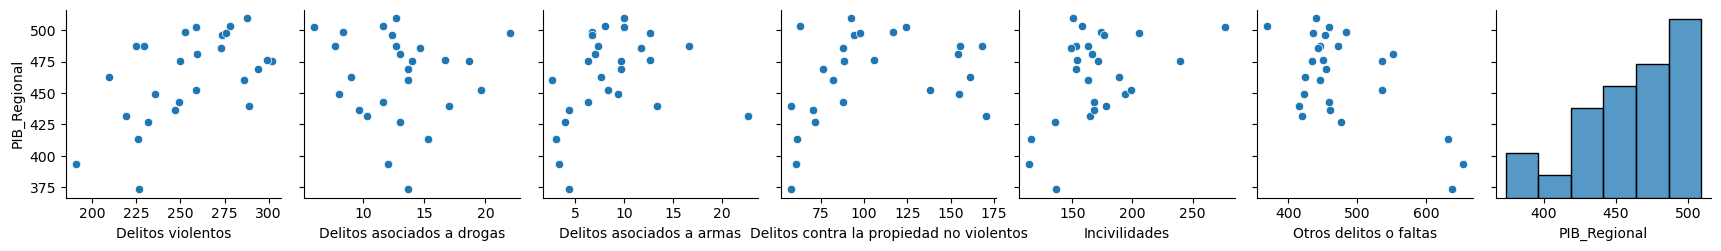

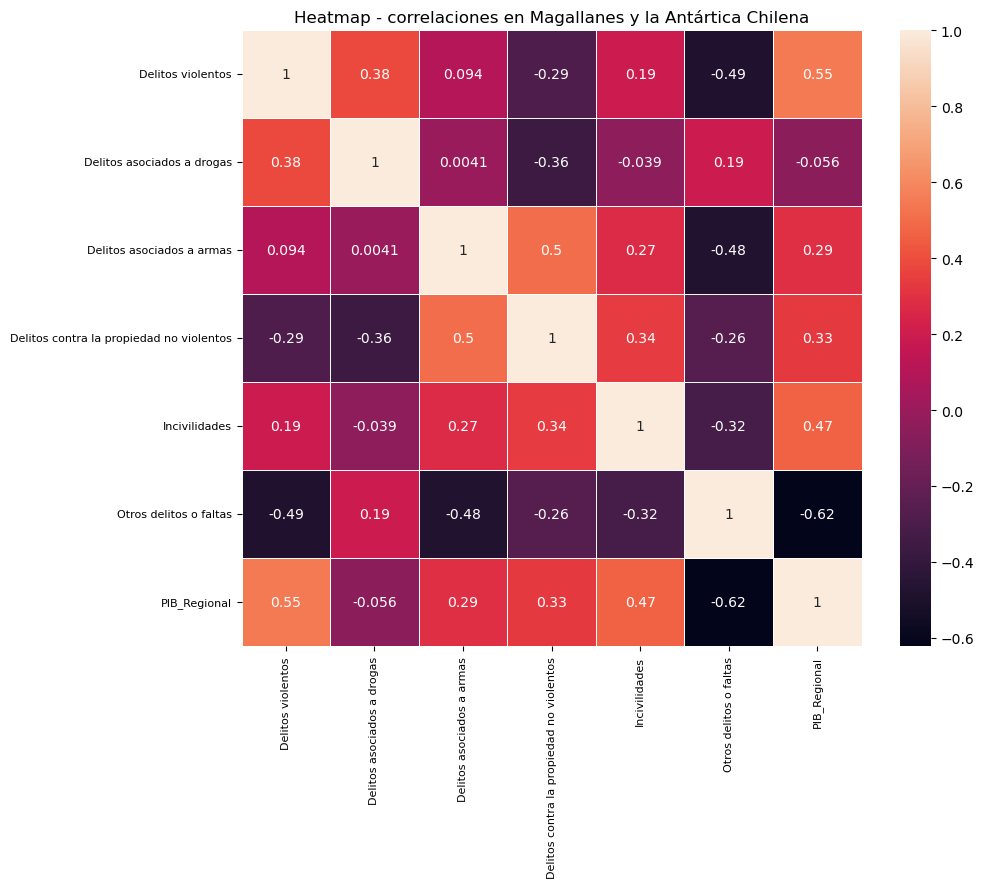

#=============================================================#
#=============================================================#
REGION - Los Lagos
#=============================================================#


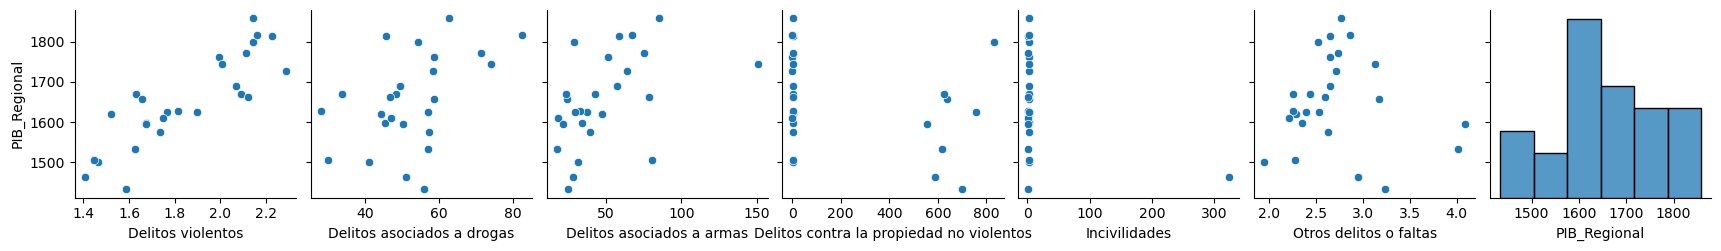

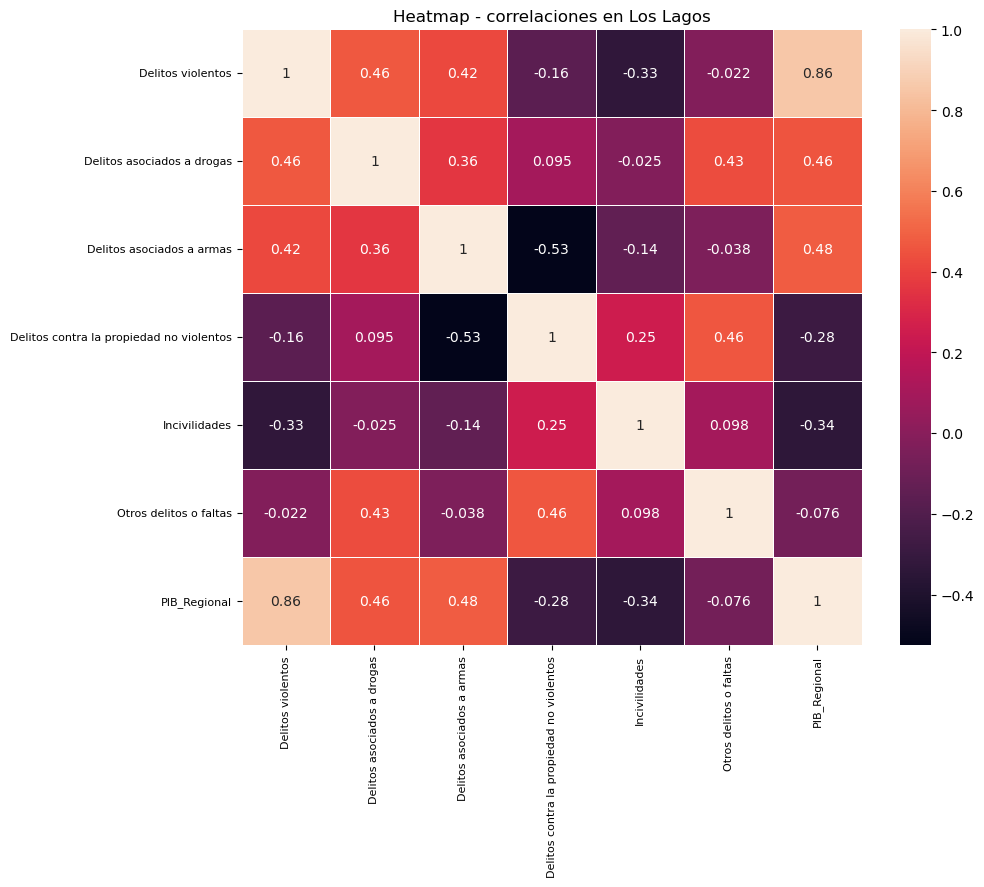

#=============================================================#
#=============================================================#
REGION - Los Ríos
#=============================================================#


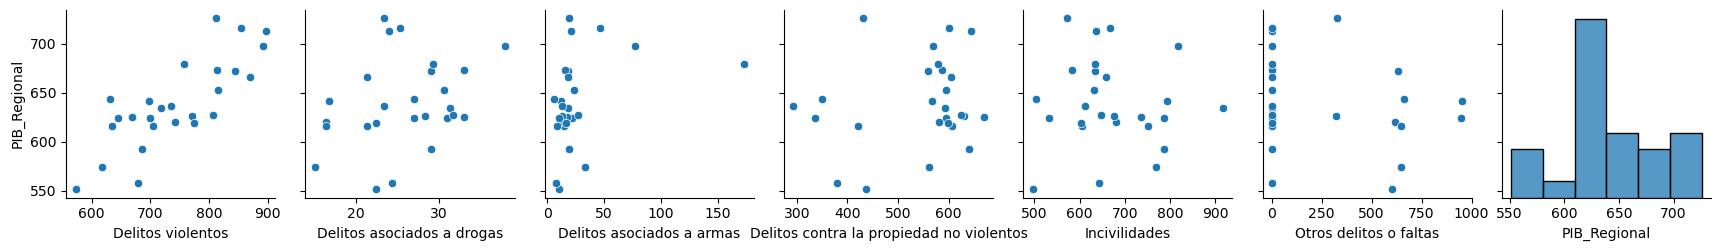

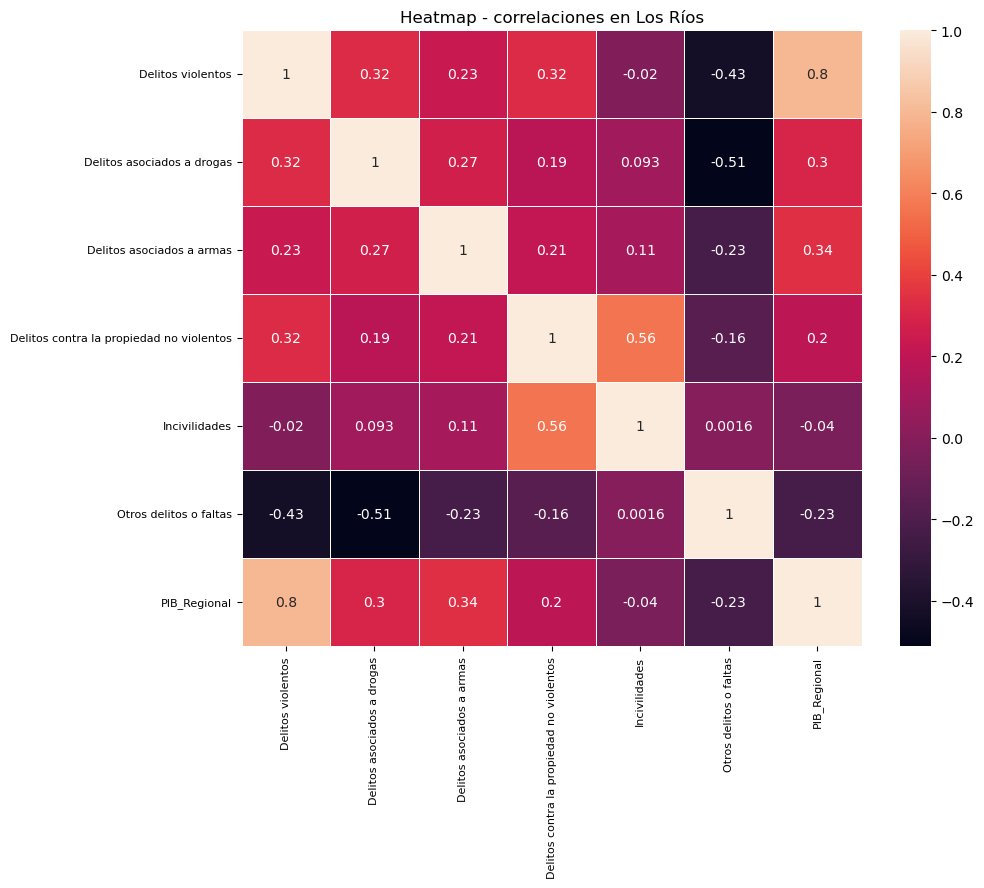

#=============================================================#
#=============================================================#
REGION - La Araucanía
#=============================================================#


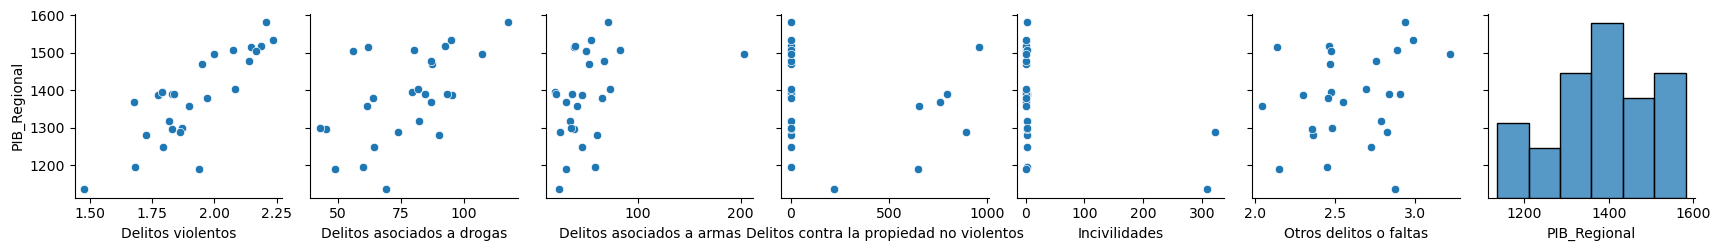

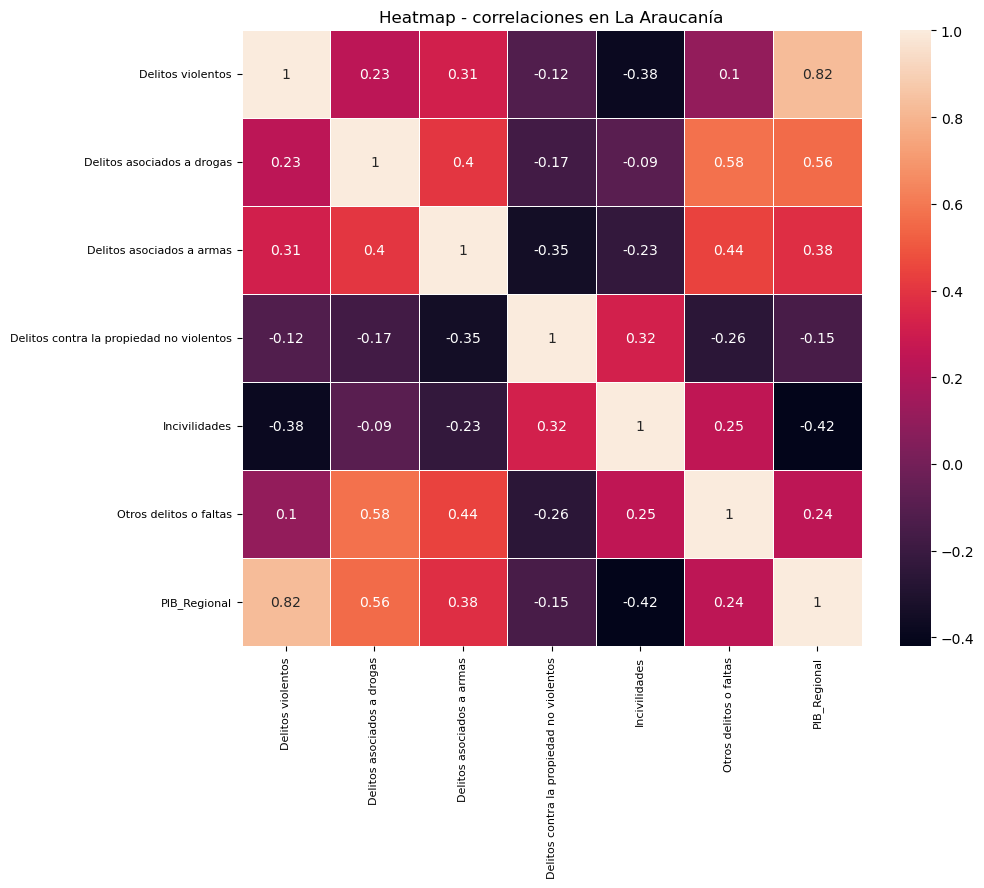

#=============================================================#
#=============================================================#
REGION - Ñuble
#=============================================================#


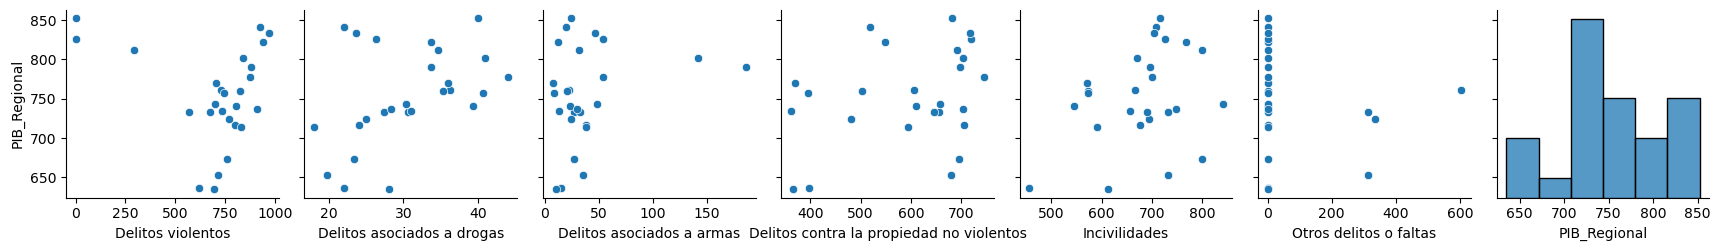

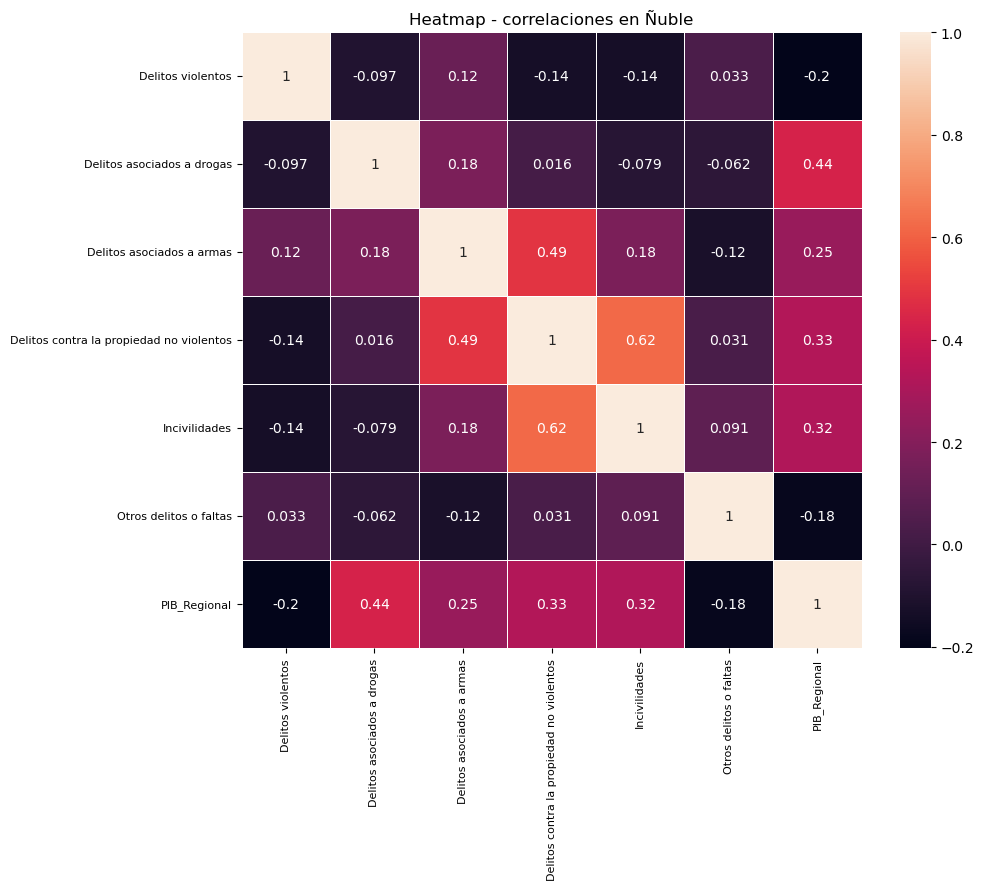

#=============================================================#
#=============================================================#
REGION - Biobío
#=============================================================#


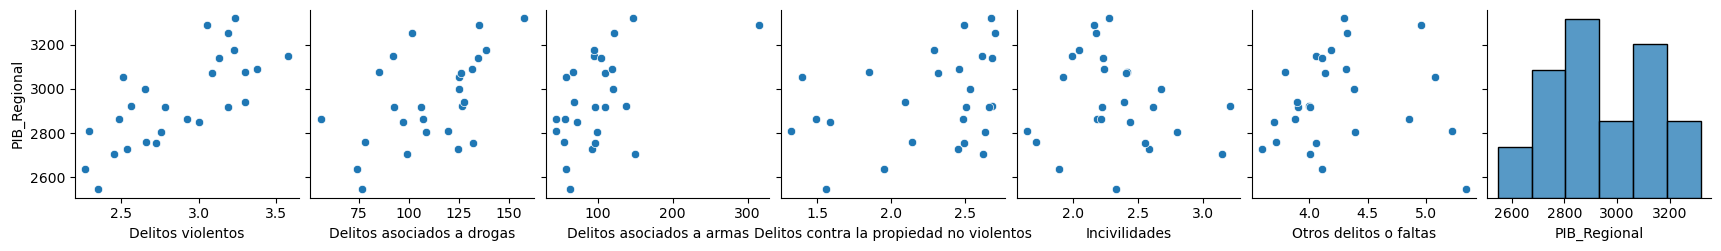

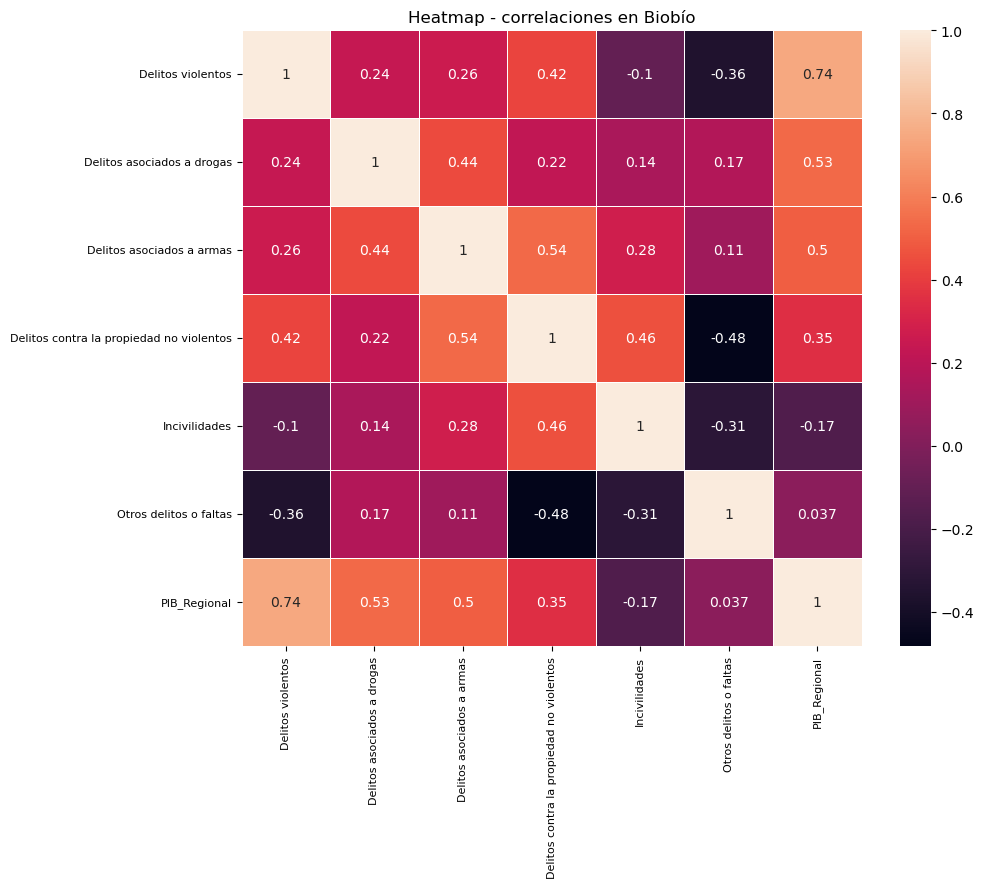

#=============================================================#
#=============================================================#
REGION - Maule
#=============================================================#


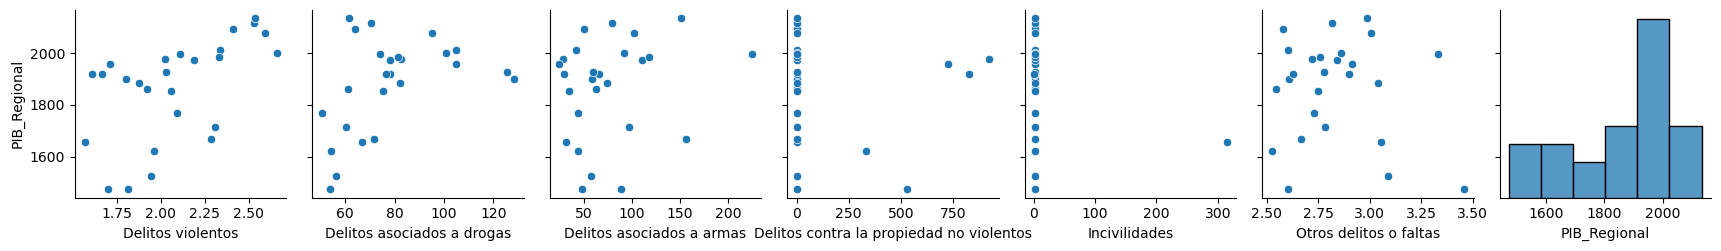

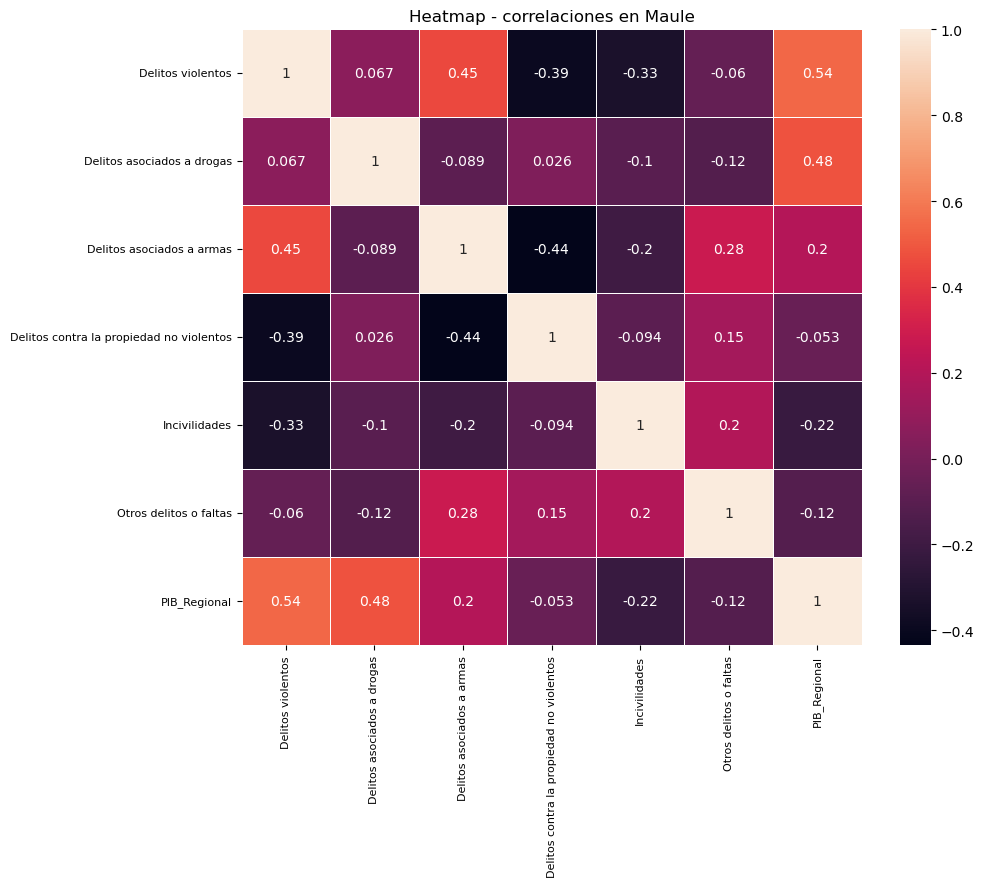

#=============================================================#
#=============================================================#
REGION - O'Higgins
#=============================================================#


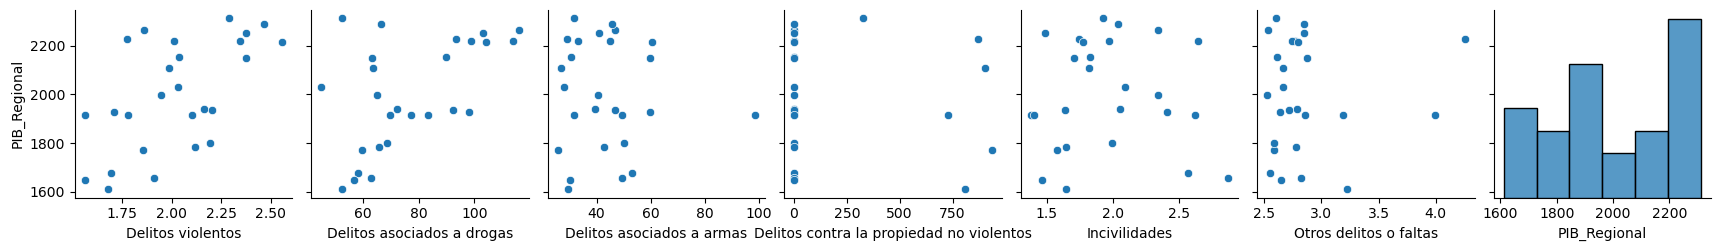

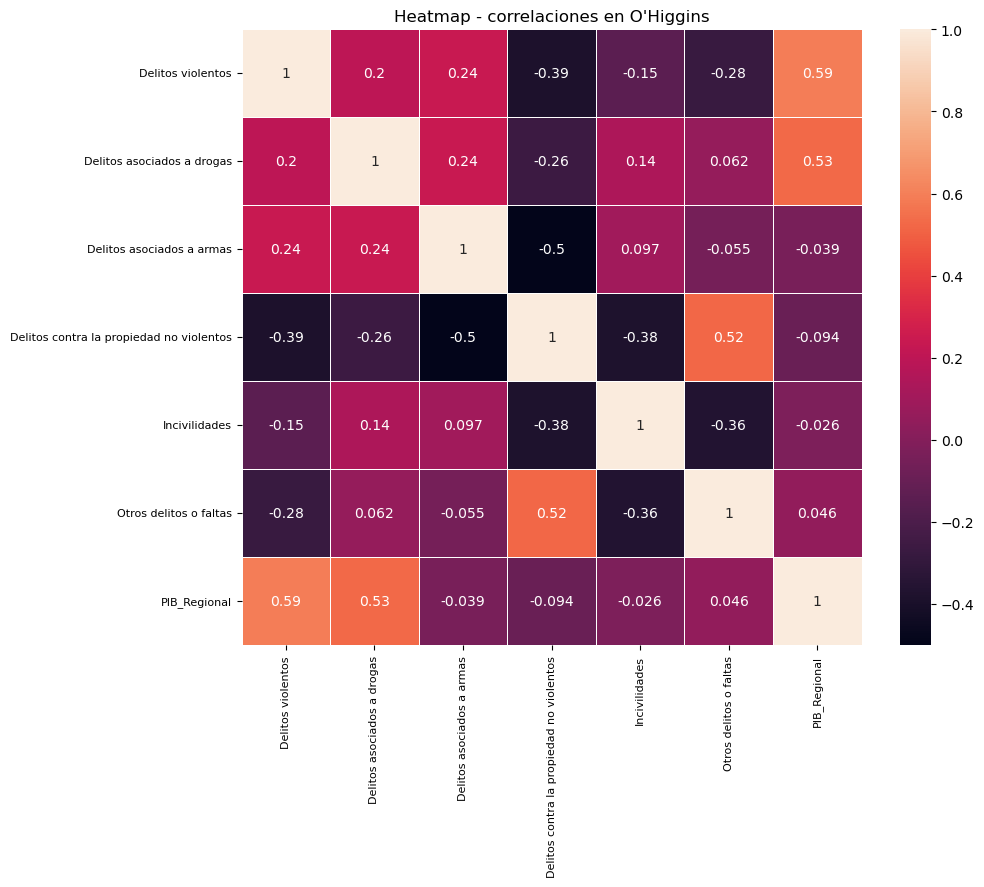

#=============================================================#
#=============================================================#
REGION - Aysén del General Carlos Ibáñez del Campo
#=============================================================#


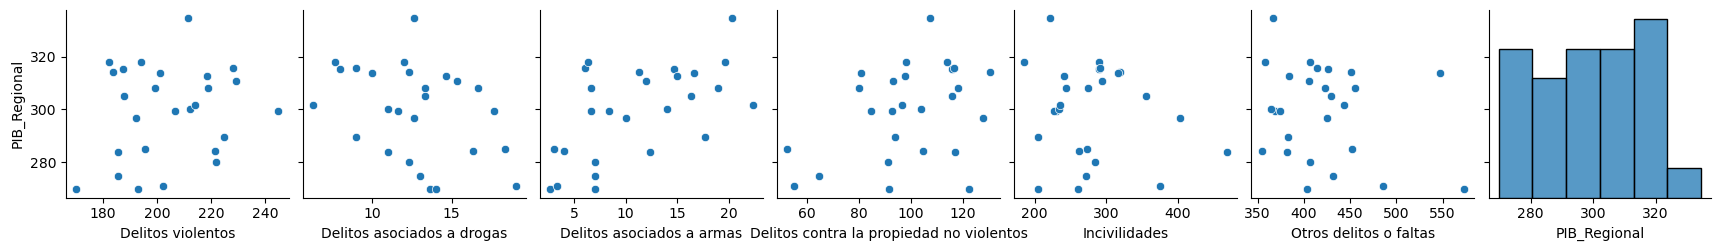

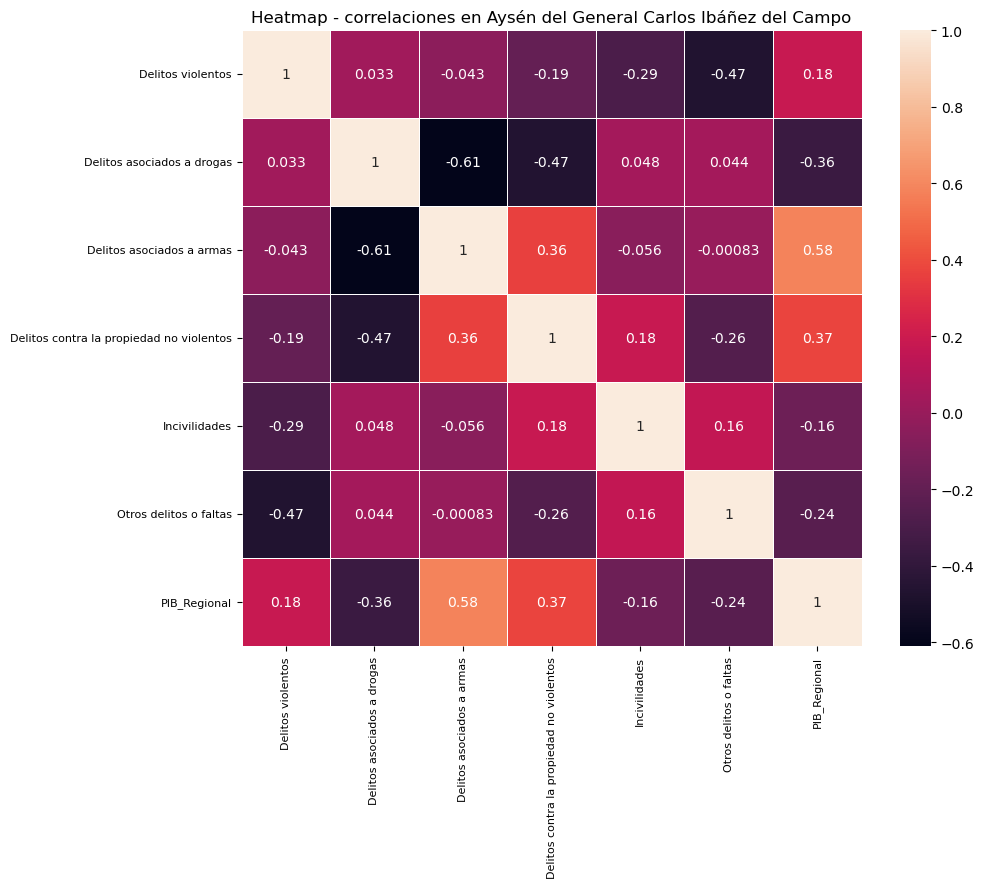

#=============================================================#
#=============================================================#
REGION - Región Metropolitana de Santiago
#=============================================================#


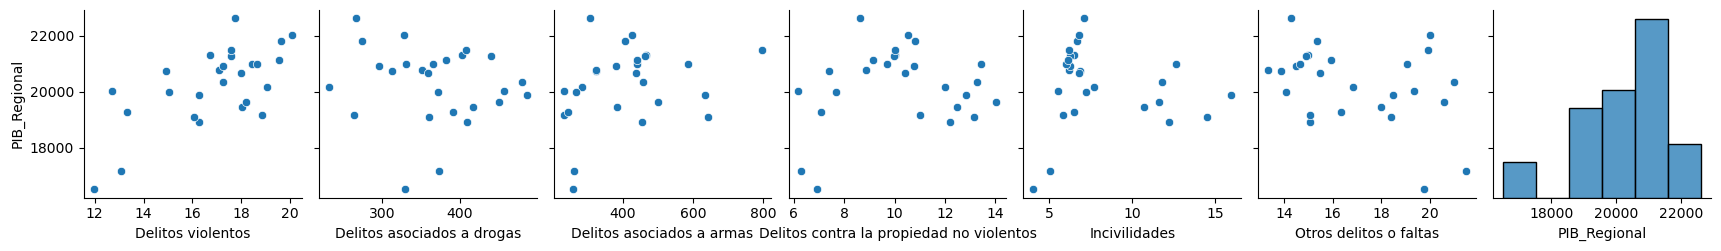

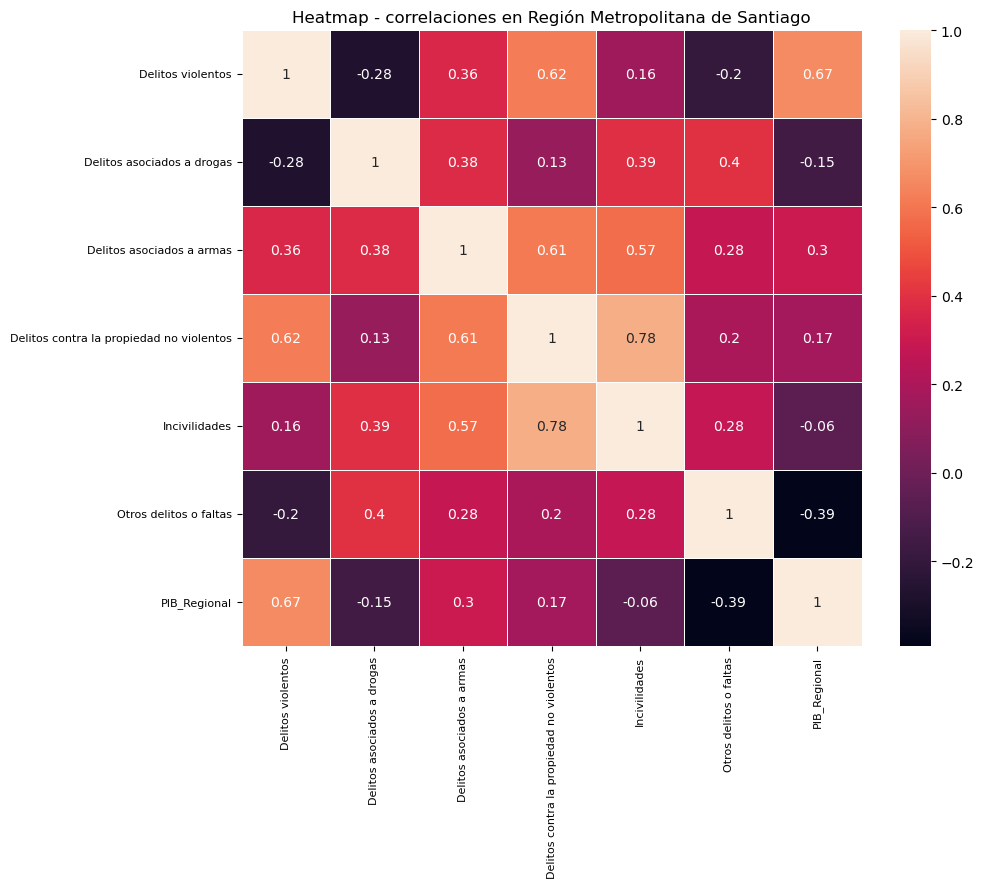

#=============================================================#


In [21]:
for i in df_economia_region['CodRegion'].unique():
    # Filtrar datos de crímenes y economía por región
    crimenes = df_ind_crime[df_ind_crime['cod_lugar'] == i]
    economia = df_economia_region[df_economia_region['CodRegion'] == i][['PIB_Regional', 'Periodo_trimestral']]

    print("#=============================================================#")
    print(f"REGION - {crimenes['Region_name'].unique()[0]}")
    print("#=============================================================#")

    df_merge = crimenes.drop(columns={'Region_name'}).merge(economia, how='left', on='Periodo_trimestral')

    pairplot = sns.pairplot(df_merge, y_vars="PIB_Regional", x_vars=df_merge.columns[2:])
    # pairplot.savefig(f'imagenes/pregunta 2/pairplot_indices_delitos_vs_PIB_regional_{crimenes["Region_name"].unique()[0]}.png', bbox_inches="tight")
    # plt.close()
    plt.show()

    correlaciones = df_merge.iloc[:, 2:].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlaciones, annot=True, linewidth=0.5)
    plt.title(f'Heatmap - correlaciones en {crimenes["Region_name"].unique()[0]}')
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    # plt.savefig(f'imagenes/pregunta 2/heatmap_indices_delitos_vs_PIB_regional_{crimenes["Region_name"].unique()[0]}.png', bbox_inches="tight")
    # plt.close()
    plt.show()

* En general, se observa una relación positiva entre la riqueza de un país, medida a través del Producto Bruto Interno (PBI), y la cantidad de delitos cometidos. Esto podría explicarse por la desigualdad económica que suele acompañar al crecimiento económico: mientras algunas personas se benefician y aumentan su riqueza, otras permanecen rezagadas o incluso enfrentan una situación económica más precaria. Esta desigualdad puede generar tensiones sociales, resentimientos y, en algunos casos, un aumento en los niveles de criminalidad, especialmente en comunidades donde las oportunidades económicas son limitadas.Sin embargo, no todas las relaciones son homogéneas, ya que algunos tipos de delitos muestran un comportamiento más disperso , dependiendo de factores locales como la distribución de la riqueza, el acceso a la educación y las políticas de seguridad. En este contexto, resulta especialmente interesante el caso de las incivilidades , que en muchas regiones parecen tener una relación negativa con el PBI . Esto podría indicar que en áreas más desarrolladas económicamente, las medidas de control social, la infraestructura y las políticas públicas ayudan a reducir este tipo de comportamientos menores que afectan la convivencia, como el vandalismo o el desorden público. Por el contrario, en regiones menos favorecidas, estas incivilidades podrían ser más frecuentes debido a la falta de recursos para abordar problemas sociales de raíz.

### ¿Existe alguna relación entre el consumo de los hogares y los delitos por región?

#=============================================================#
REGION - Tarapacá
#=============================================================#


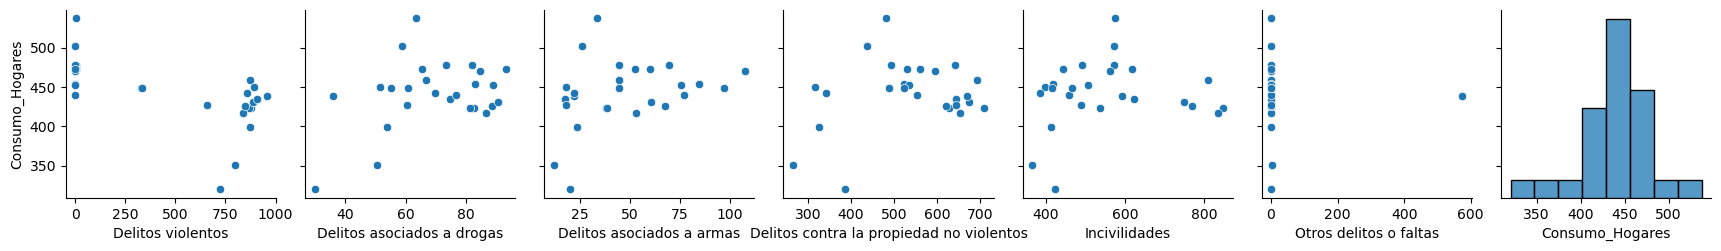

#=============================================================#
REGION - Atacama
#=============================================================#


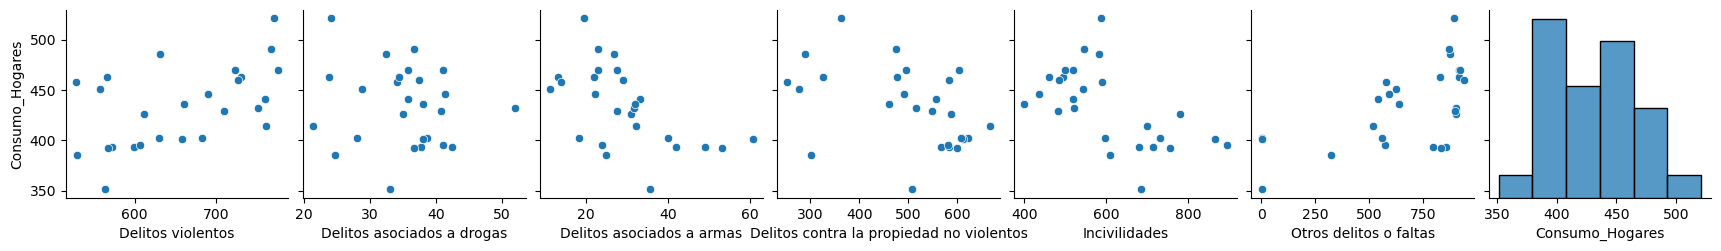

#=============================================================#
REGION - Antofagasta
#=============================================================#


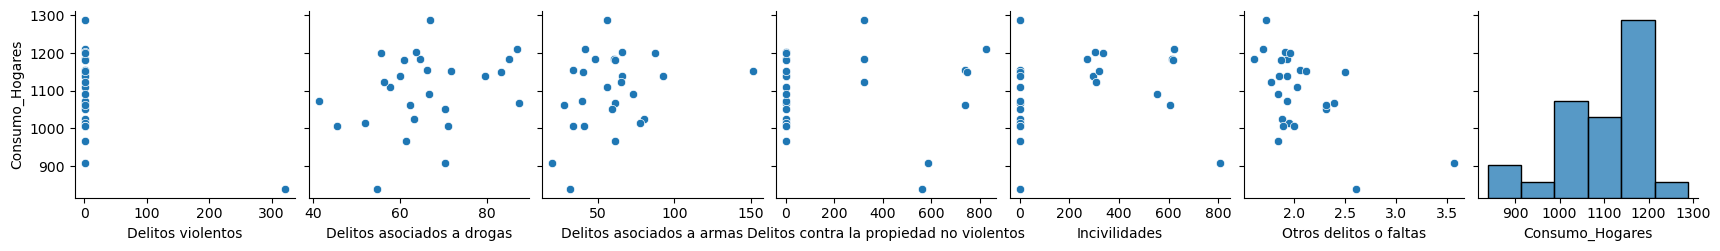

#=============================================================#
REGION - Coquimbo
#=============================================================#


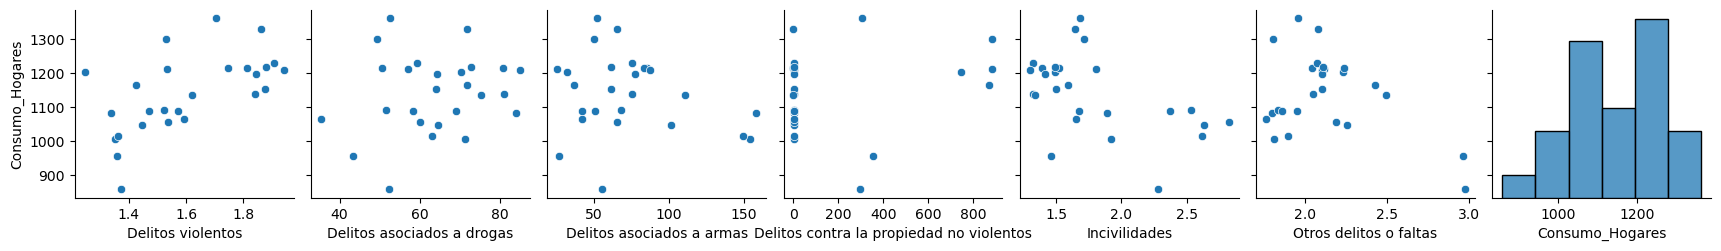

#=============================================================#
REGION - Valparaíso
#=============================================================#


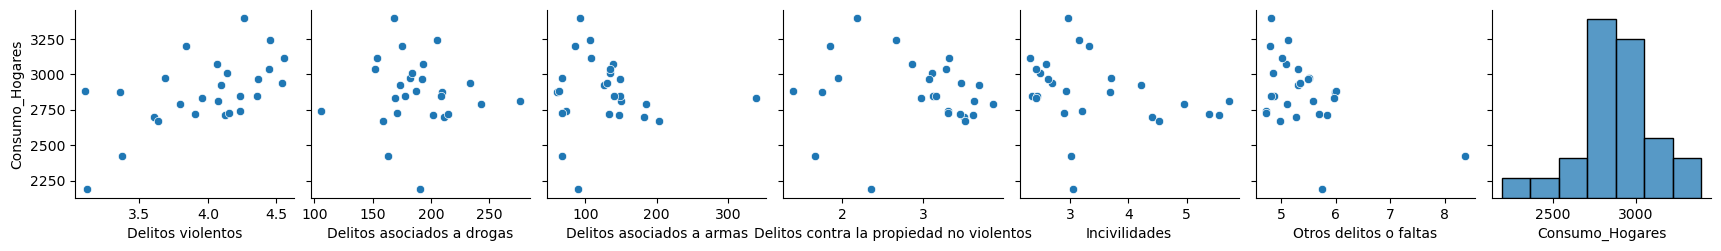

#=============================================================#
REGION - Arica y Parinacota
#=============================================================#


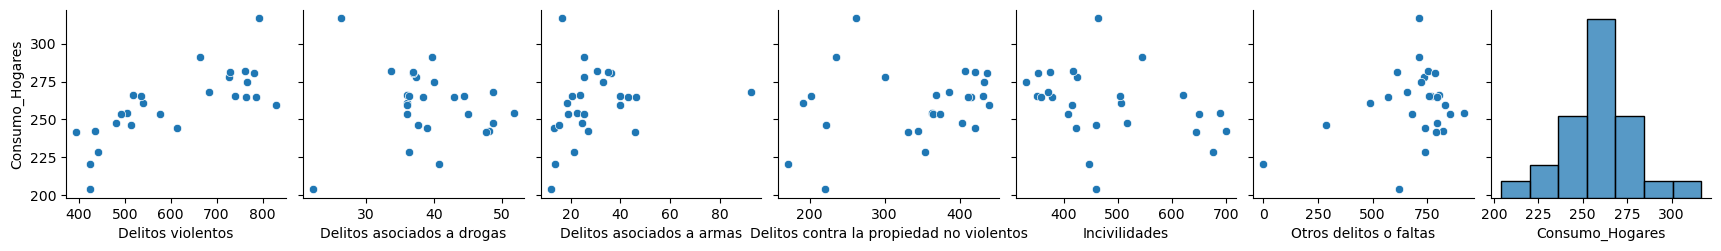

#=============================================================#
REGION - Magallanes y la Antártica Chilena
#=============================================================#


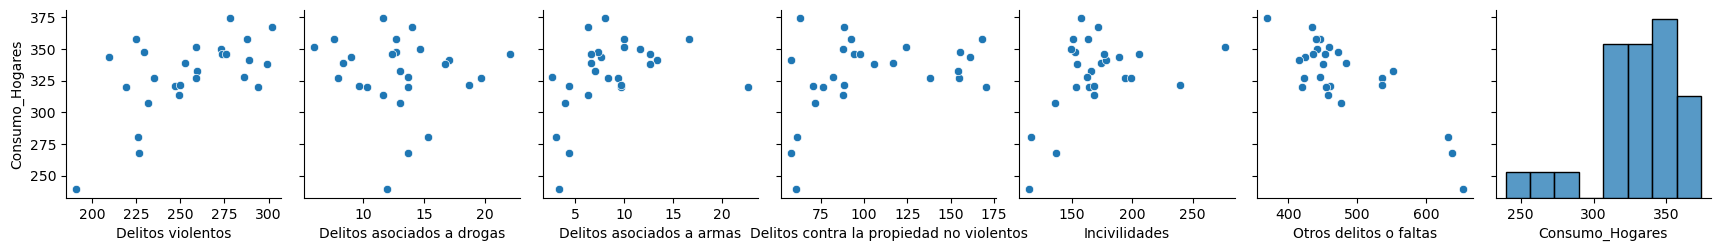

#=============================================================#
REGION - Los Lagos
#=============================================================#


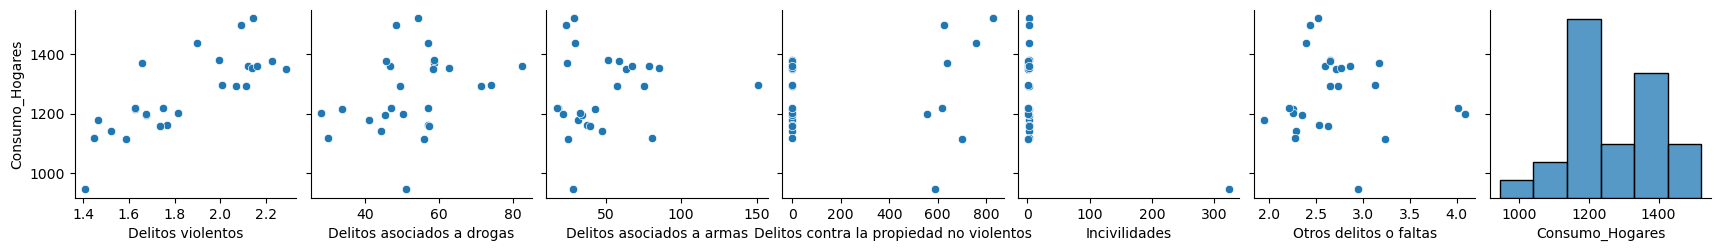

#=============================================================#
REGION - Los Ríos
#=============================================================#


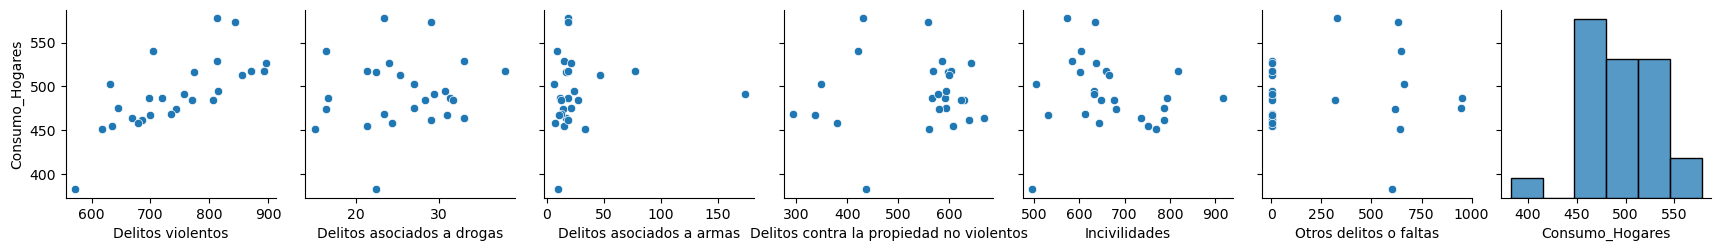

#=============================================================#
REGION - La Araucanía
#=============================================================#


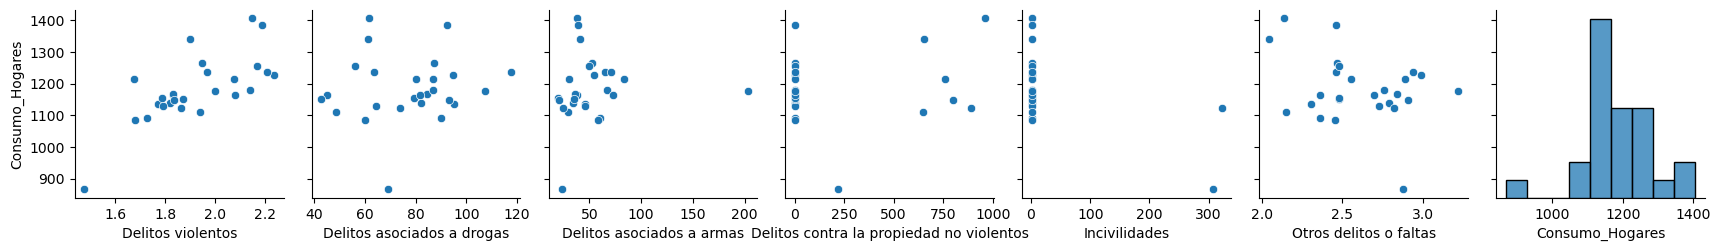

#=============================================================#
REGION - Ñuble
#=============================================================#


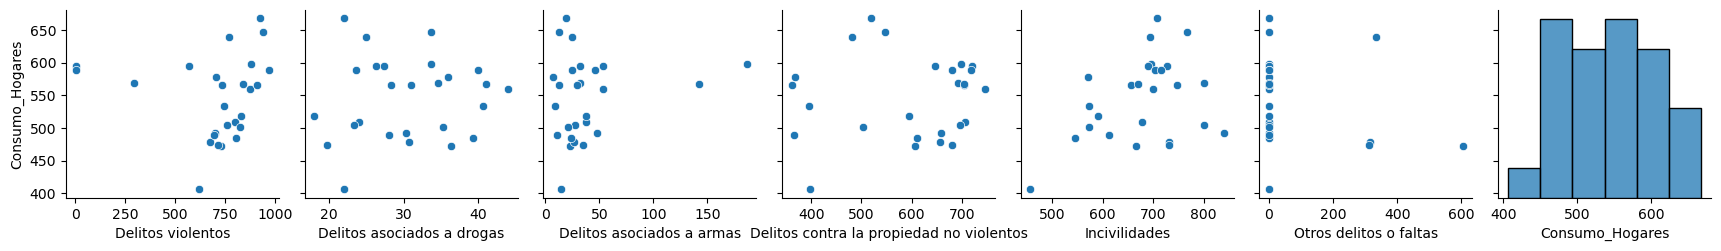

#=============================================================#
REGION - Biobío
#=============================================================#


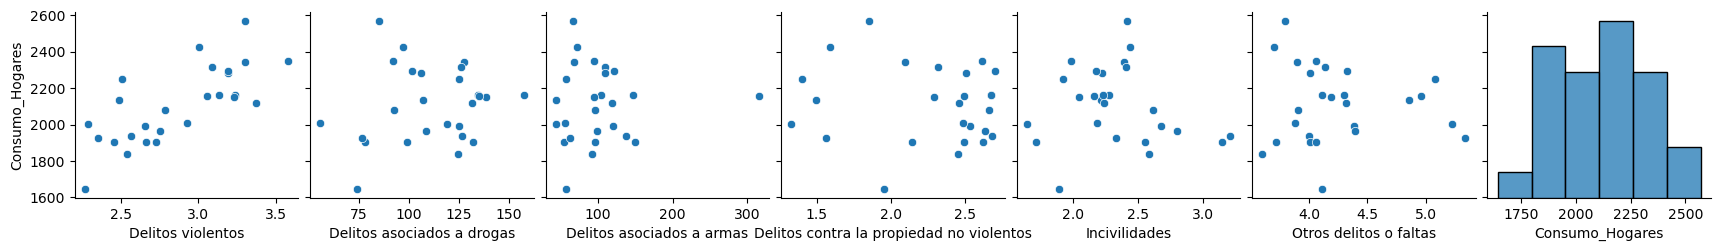

#=============================================================#
REGION - Maule
#=============================================================#


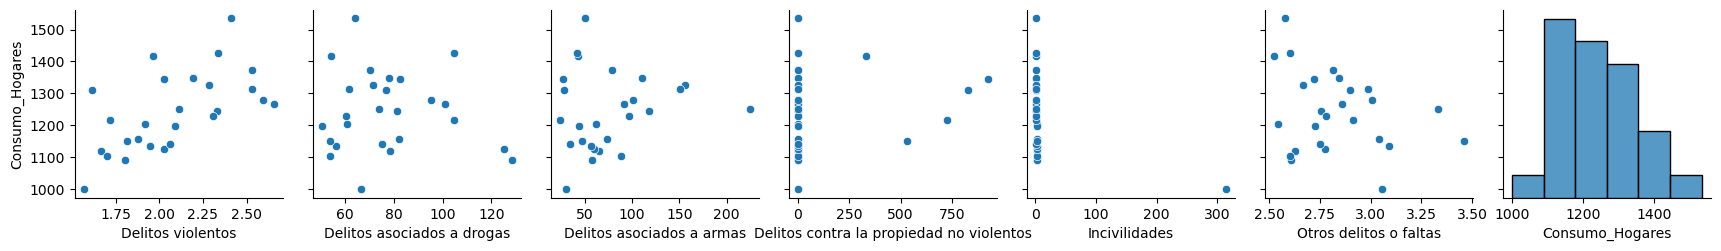

#=============================================================#
REGION - O'Higgins
#=============================================================#


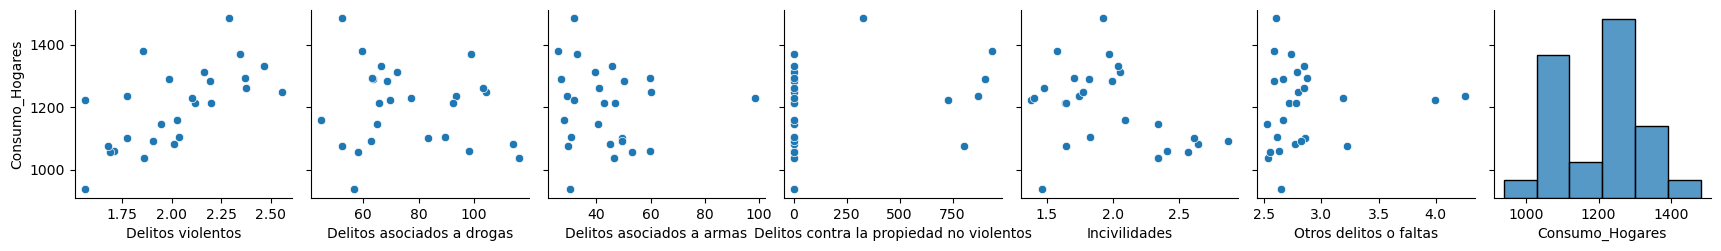

#=============================================================#
REGION - Aysén del General Carlos Ibáñez del Campo
#=============================================================#


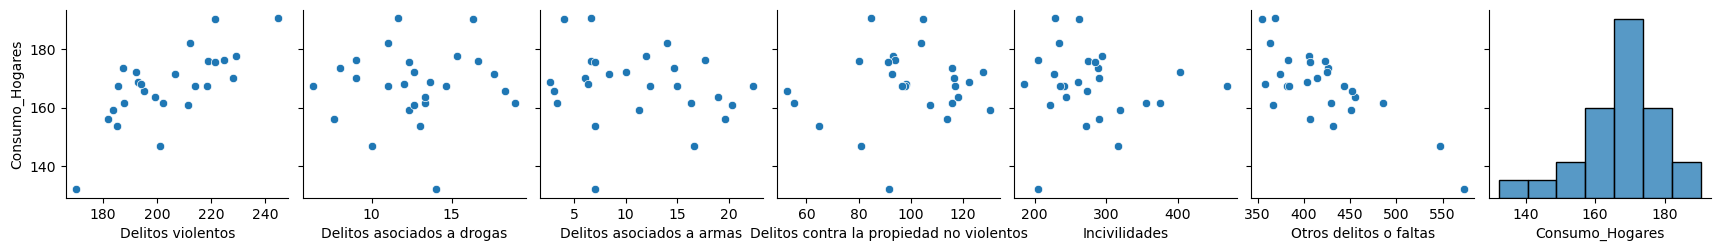

#=============================================================#
REGION - Región Metropolitana de Santiago
#=============================================================#


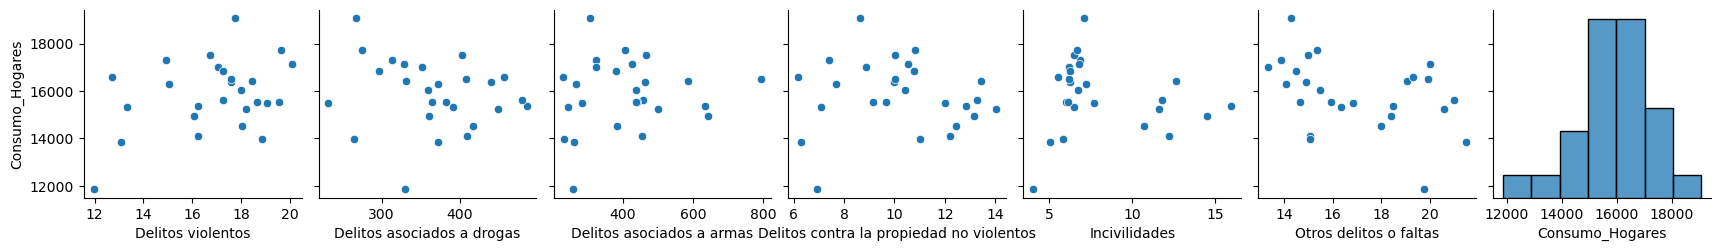

In [22]:
for i in df_economia_region['CodRegion'].unique():
  crimenes = df_ind_crime[df_ind_crime['cod_lugar'] == i]
  economia = df_economia_region[df_economia_region['CodRegion'] == i][['Consumo_Hogares','Periodo_trimestral']]

  print("#=============================================================#")
  print(f"REGION - {crimenes['Region_name'].unique()[0]}")
  print("#=============================================================#")

  df_merge = crimenes.drop(columns={'Region_name'}).merge(economia, how='left',on='Periodo_trimestral')

  sns.pairplot(df_merge, y_vars="Consumo_Hogares", x_vars= df_merge.columns[2:])
  # plt.savefig(f'imagenes/pregunta 3/pairplot_indices_delitos_vs_consumo_Hogares_{crimenes["Region_name"].unique()[0]}.png', bbox_inches="tight")
  # plt.close()
  plt.show()

* Región: O'Higgins
Los gráficos de dispersión muestran el consumo de los hogares en relación con >distintos tipos de delitos en la región de O'Higgins. No se observa una relación clara y consistente entre el consumo de los hogares y los delitos violentos, asociados a drogas o armas. Sin embargo, hay cierta tendencia positiva entre el consumo y los delitos contra la propiedad no violentos, así como con "otros delitos o faltas", lo que podría indicar que estas actividades están asociadas en cierto grado al consumo. El histograma final muestra una distribución relativamente simétrica del consumo, con un mayor número de hogares en el rango entre 1000 y 1400 unidades.

* Región: Ñuble
En Ñuble, los gráficos sugieren que no existe una relación definida entre el consumo de los hogares y los delitos violentos o asociados a drogas. En cuanto a los delitos contra la propiedad no violentos y las incivilidades, se observan patrones más dispersos que no evidencian tendencias claras. "Otros delitos o faltas" muestran mayor dispersión, aunque podría haber un ligero aumento en el consumo en los rangos altos de delitos. El histograma muestra una distribución del consumo centrada entre 400 y 600, con una menor frecuencia en los extremos.

* Región: Maule
Los gráficos de la región del Maule presentan una situación similar a Ñuble, con una alta dispersión en la relación entre consumo de los hogares y delitos violentos, asociados a drogas o armas. En los delitos contra la propiedad no violentos y "otros delitos o faltas", hay un nivel de tendencia positiva, aunque no concluyente. El histograma refleja que el consumo de los hogares tiene su mayor frecuencia entre 1000 y 1400 unidades.


* Región Metropolitana de Santiago
En la Región Metropolitana, los gráficos sugieren una posible correlación positiva entre el consumo de los hogares y los delitos violentos, delitos asociados a drogas y delitos contra la propiedad no violentos. Esto podría indicar que en zonas con mayor consumo, ciertos tipos de delitos también son más prevalentes. El histograma revela que el consumo está concentrado entre 12000 y 18000, con una distribución más amplia que las regiones anteriores.

* Región: Biobío
En Biobío, no se aprecian relaciones significativas entre el consumo de los hogares y los delitos. En general, los puntos están dispersos, con algunas concentraciones para los delitos contra la propiedad no violentos y "otros delitos o faltas". El histograma del consumo muestra que los hogares tienden a consumir entre 1750 y 2500 unidades, con un ligero sesgo hacia valores mayores.

* Región: Aysén
En Aysén, los gráficos muestran una relación más consistente entre el consumo y algunos delitos. Por ejemplo, los delitos asociados a drogas y contra la propiedad no violentos tienen una tendencia positiva evidente. Esto puede sugerir que en esta región más pequeña, la relación entre delitos y consumo es más pronunciada. El histograma indica un consumo más bajo en comparación con las otras regiones, con una concentración entre 140 y 180 unidades.



###  ¿Es posible predecir aumentos en la criminalidad basandose en variaciones mensuales en la tasa de inflacion y desempleo?

In [23]:
regiones_map = {
    'Antofagasta': 'Antofagasta',
    'Araucania': 'La Araucanía',
    'Arica': 'Arica y Parinacota',
    'Atacama': 'Atacama',
    'Aysén': 'Aysén del General Carlos Ibáñez del Campo',
    'Biobio': 'Biobío',
    'Coquimbo': 'Coquimbo',
    'Libertador': "O'Higgins",
    'Loslagos': 'Los Lagos',
    'Losrios': 'Los Ríos',
    'Magallanes': 'Magallanes y la Antártica Chilena',
    'Maule': 'Maule',
    'Metropolitana': 'Región Metropolitana de Santiago',
    'Nuble': 'Ñuble',
    'Tarapaca': 'Tarapacá',
    'Valparaiso': 'Valparaíso'}

In [24]:
# df_ind_del_reg = pd.read_parquet(f"{path}datos de economia/Datos_ordenados_1/df_Ind_des_trimes.parquet")
df_ind_del_reg = pd.read_parquet("datos de economia/Datos_ordenados_1/df_Ind_des_trimes.parquet")
df_ipc = df_economia_1[["fecha", "IPC"]]

df_ind_del_reg["Region"] = df_ind_del_reg["Region"].apply(lambda reg: regiones_map[reg])
df_ind_del_reg = df_ind_del_reg[(df_ind_del_reg["Periodo_trimestral"] <= "2024-06-30") & (df_ind_del_reg["Periodo_trimestral"] >= "2018-01-01")]
print('df_ind_del_reg:',df_ind_del_reg.shape)
print('df_ind_crime:',df_ind_crime.shape)

df_ind_del_reg: (416, 5)
df_ind_crime: (416, 9)


In [25]:
def conseguir_trimestre(df: pd.DataFrame):
    col_num = list(df.select_dtypes(include=['float64', 'int64']).columns)
    col_cat = list(df.select_dtypes(include=['object', 'category']).columns)

    col_num_agg = {col: "mean" for col in col_num}
    col_cat_agg = {col: "first" for col in col_cat}

    col_agg = {**col_num_agg, **col_cat_agg}
    df["Periodo_trimestral"] = df['fecha'].dt.to_period('Q')
    df_grouped = df.groupby('Periodo_trimestral').agg(col_agg).reset_index()
        
    df_grouped["Periodo_trimestral"] = df_grouped["Periodo_trimestral"].apply(fin_trimestre)
    return df_grouped
def fin_trimestre(periodo):
    year = periodo.year
    quarter = periodo.quarter
    if quarter == 1:
        return pd.Timestamp(f'{year}-03-01')
    elif quarter == 2:
        return pd.Timestamp(f'{year}-06-01')
    elif quarter == 3:
        return pd.Timestamp(f'{year}-09-01')
    elif quarter == 4:
        return pd.Timestamp(f'{year}-12-01')
df_ipc = conseguir_trimestre(df_ipc)
repetir = len(df_ind_crime["Region_name"].unique())
df_ipc = pd.DataFrame({"Periodo_trimestral_": list(df_ipc.iloc[:, 0]) * repetir, "IPC": list(df_ipc.iloc[:, 1]) * repetir})
print('df_ipc:',df_ipc.shape)

df_ipc: (416, 2)


C:\Users\Jose\AppData\Local\Temp\ipykernel_18624\3738600896.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Periodo_trimestral"] = df['fecha'].dt.to_period('Q')


In [26]:
df_cid = pd.merge(left= df_ind_crime, right=df_ind_del_reg, left_on=["Periodo_trimestral", "Region_name"], right_on=["Periodo_trimestral", "Region"])
df_cid = pd.concat([df_cid, df_ipc], axis=1)
df_cid.drop(columns=["Region", "Periodo_trimestral_", "1.Fuerza de trabajo (Miles de personas)", "2.Ocupados (Miles de personas)"], inplace=True)

df_cid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Region_name                               416 non-null    object        
 1   cod_lugar                                 416 non-null    int64         
 2   Periodo_trimestral                        416 non-null    datetime64[ns]
 3   Delitos violentos                         416 non-null    float64       
 4   Delitos asociados a drogas                416 non-null    float64       
 5   Delitos asociados a armas                 416 non-null    float64       
 6   Delitos contra la propiedad no violentos  416 non-null    float64       
 7   Incivilidades                             416 non-null    float64       
 8   Otros delitos o faltas                    416 non-null    float64       
 9   3.Tasa de desocupación (%)      

#=============================================================#
REGION - Antofagasta
#=============================================================#


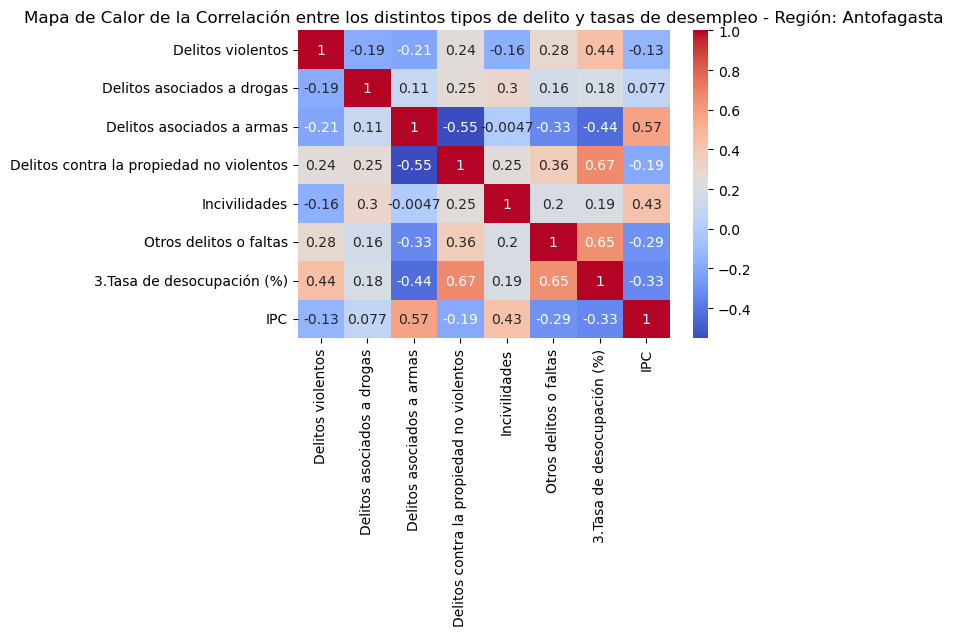

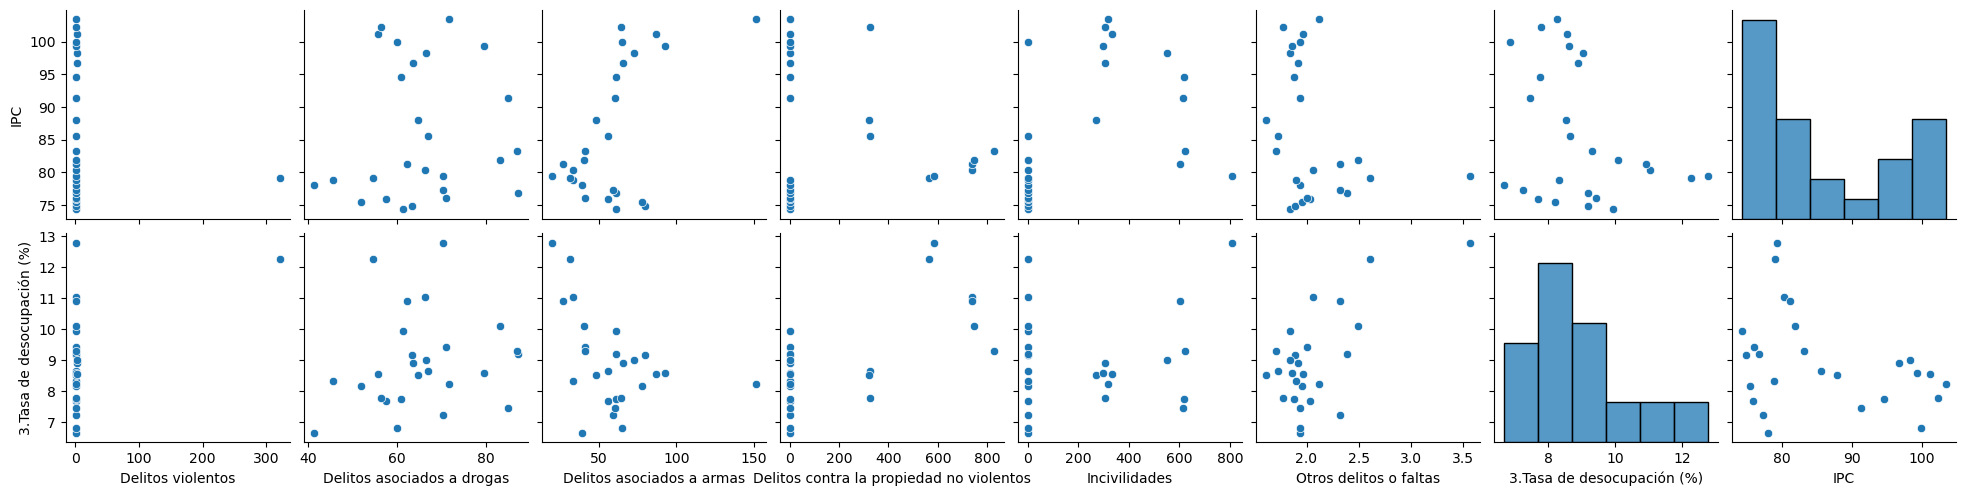

#=============================================================#
REGION - Arica y Parinacota
#=============================================================#


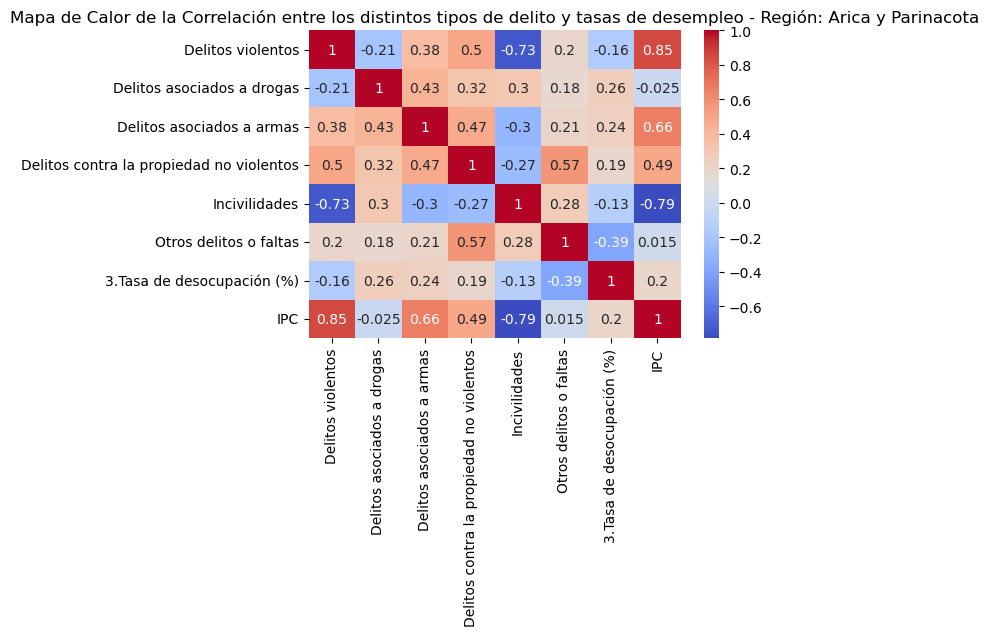

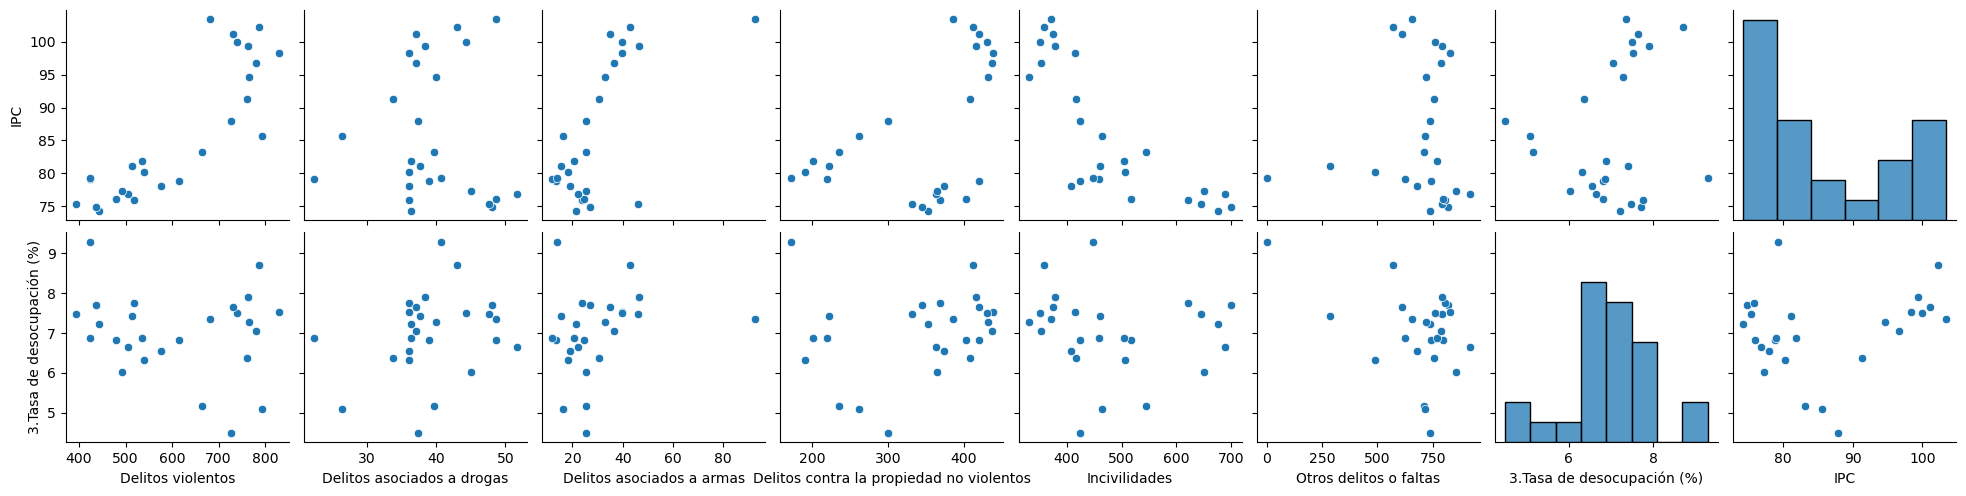

#=============================================================#
REGION - Atacama
#=============================================================#


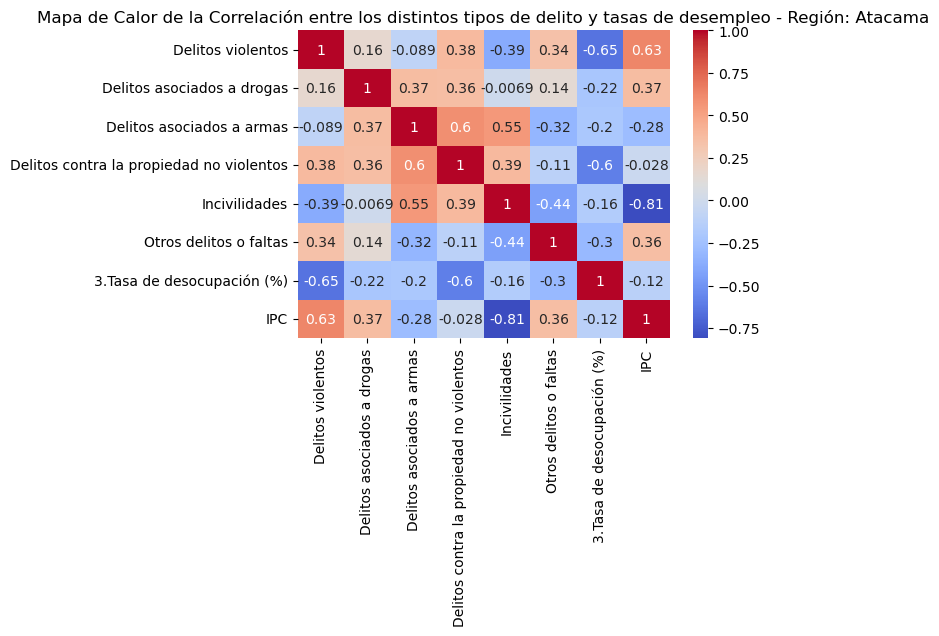

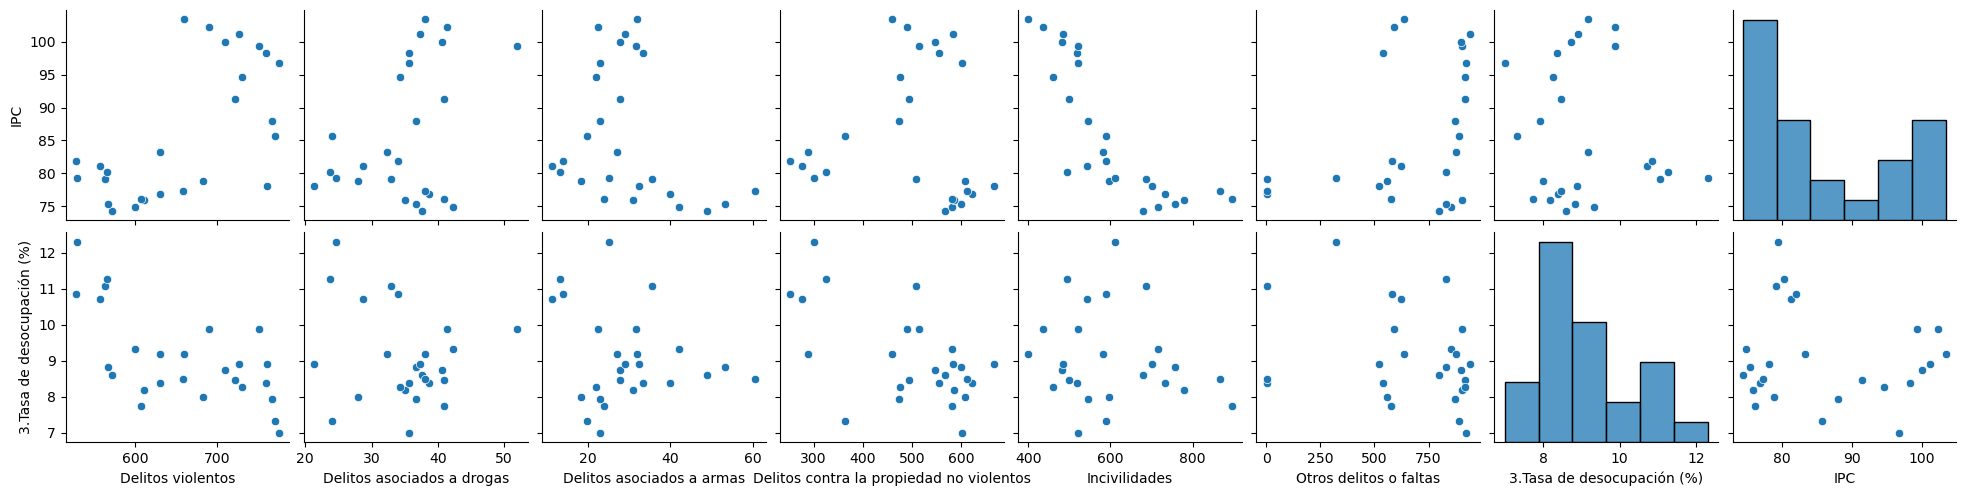

#=============================================================#
REGION - Aysén del General Carlos Ibáñez del Campo
#=============================================================#


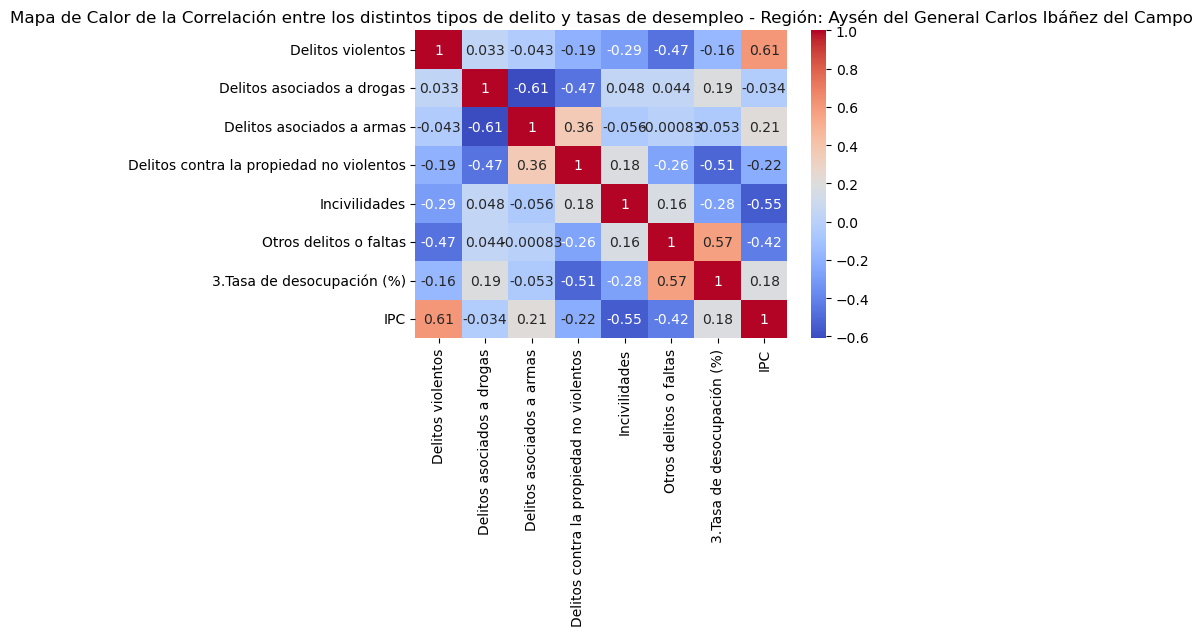

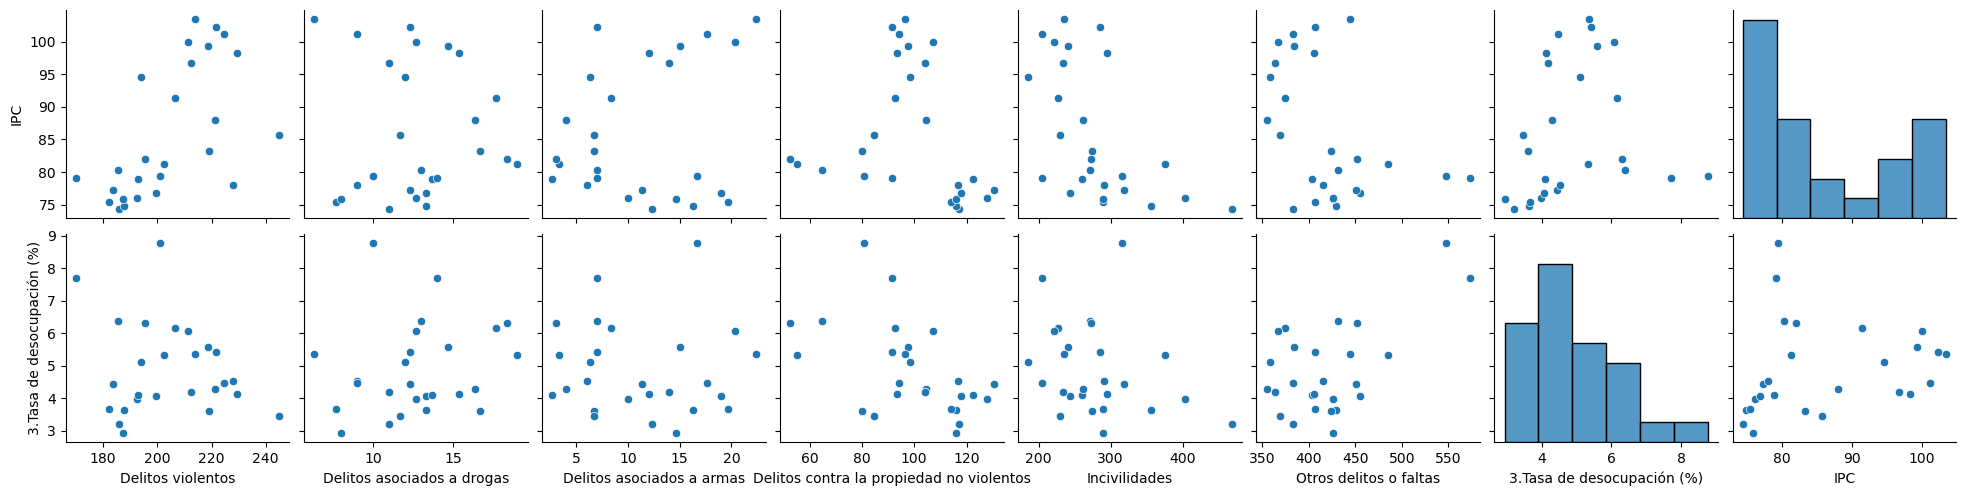

#=============================================================#
REGION - Biobío
#=============================================================#


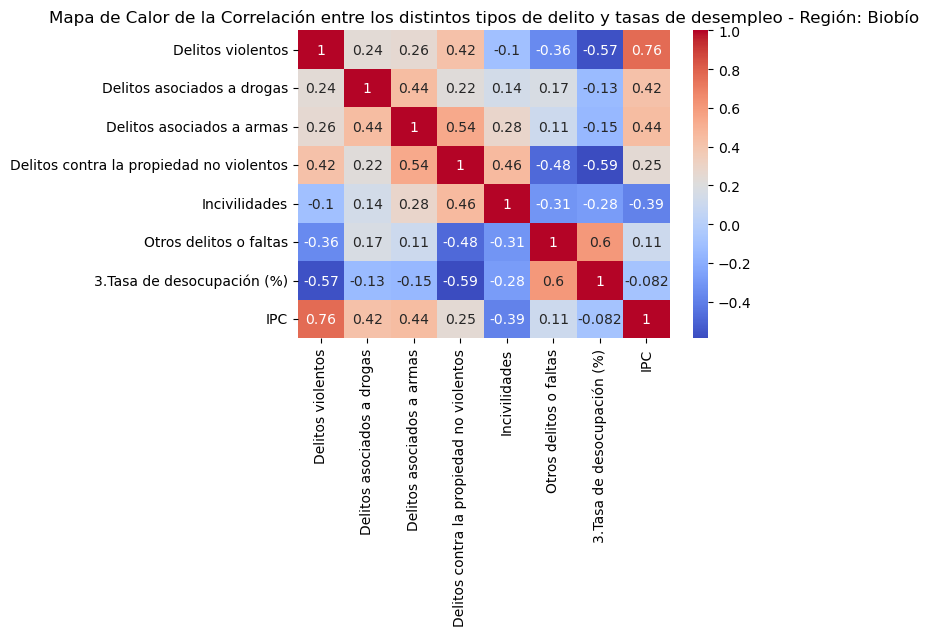

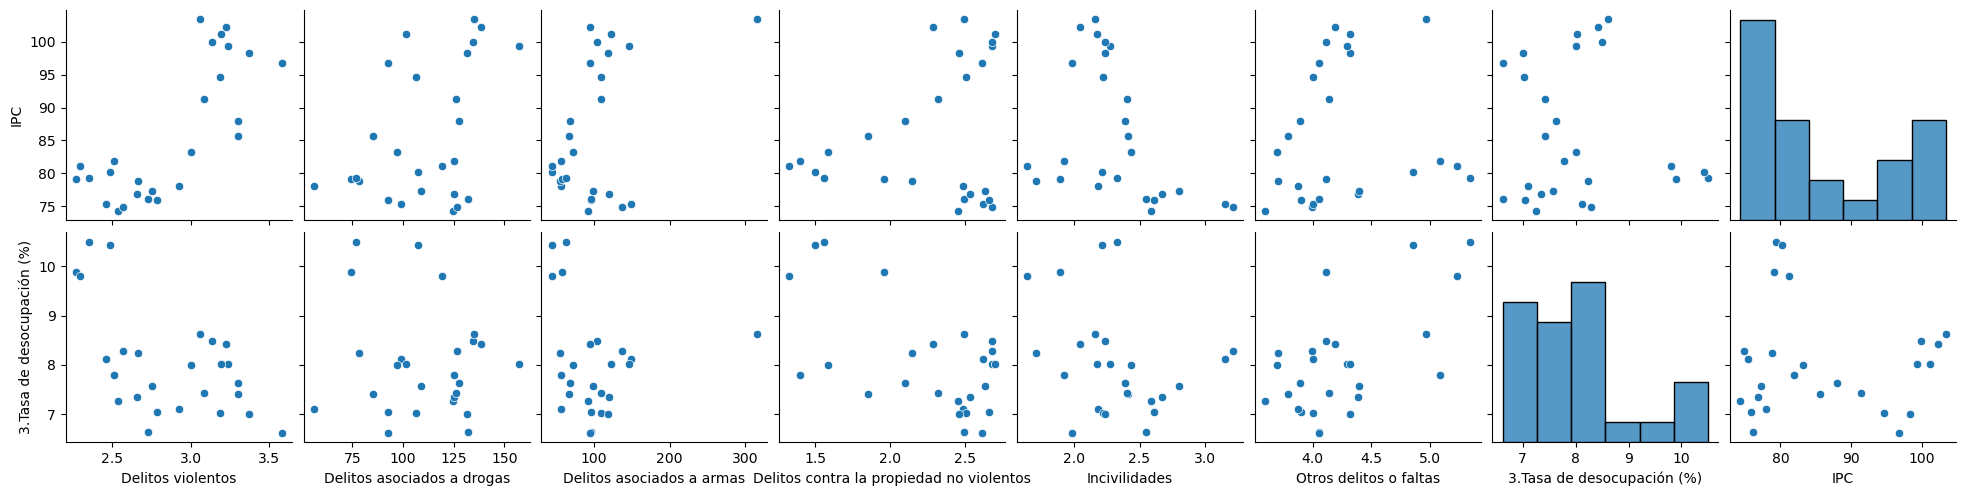

#=============================================================#
REGION - Coquimbo
#=============================================================#


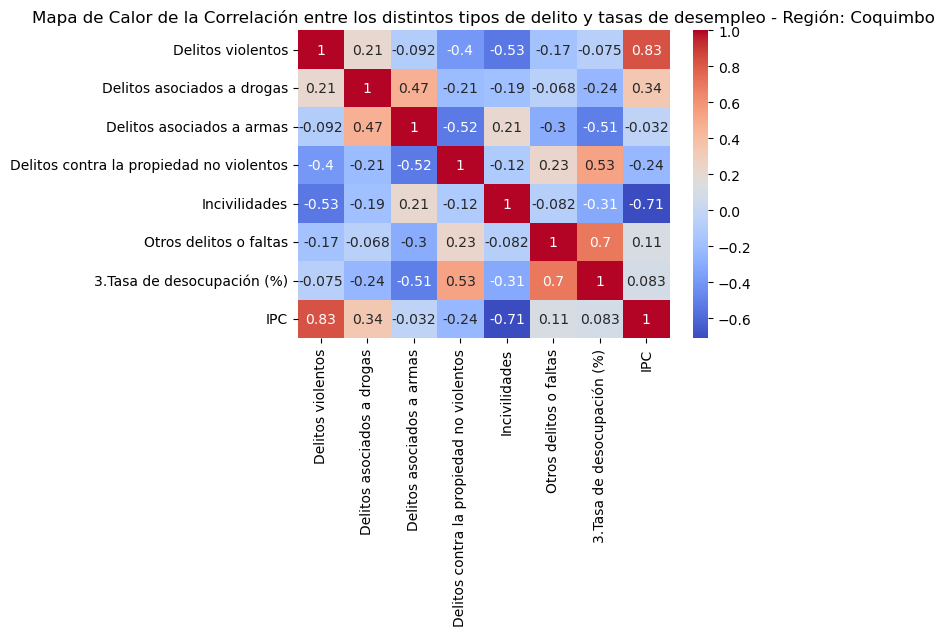

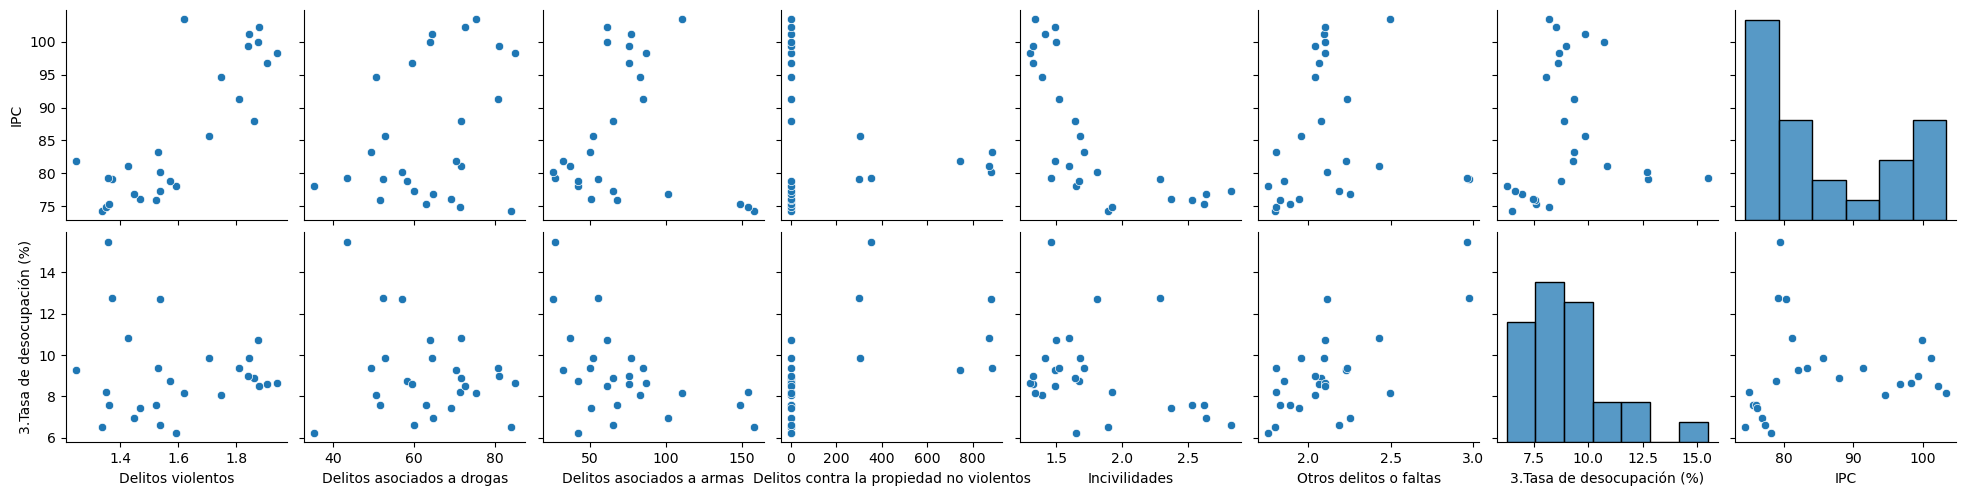

#=============================================================#
REGION - La Araucanía
#=============================================================#


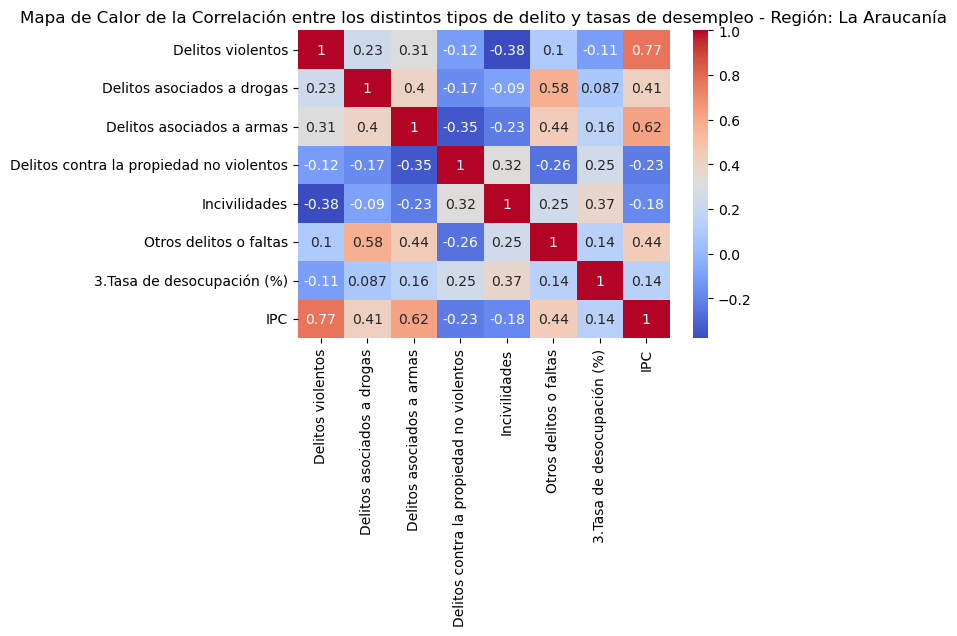

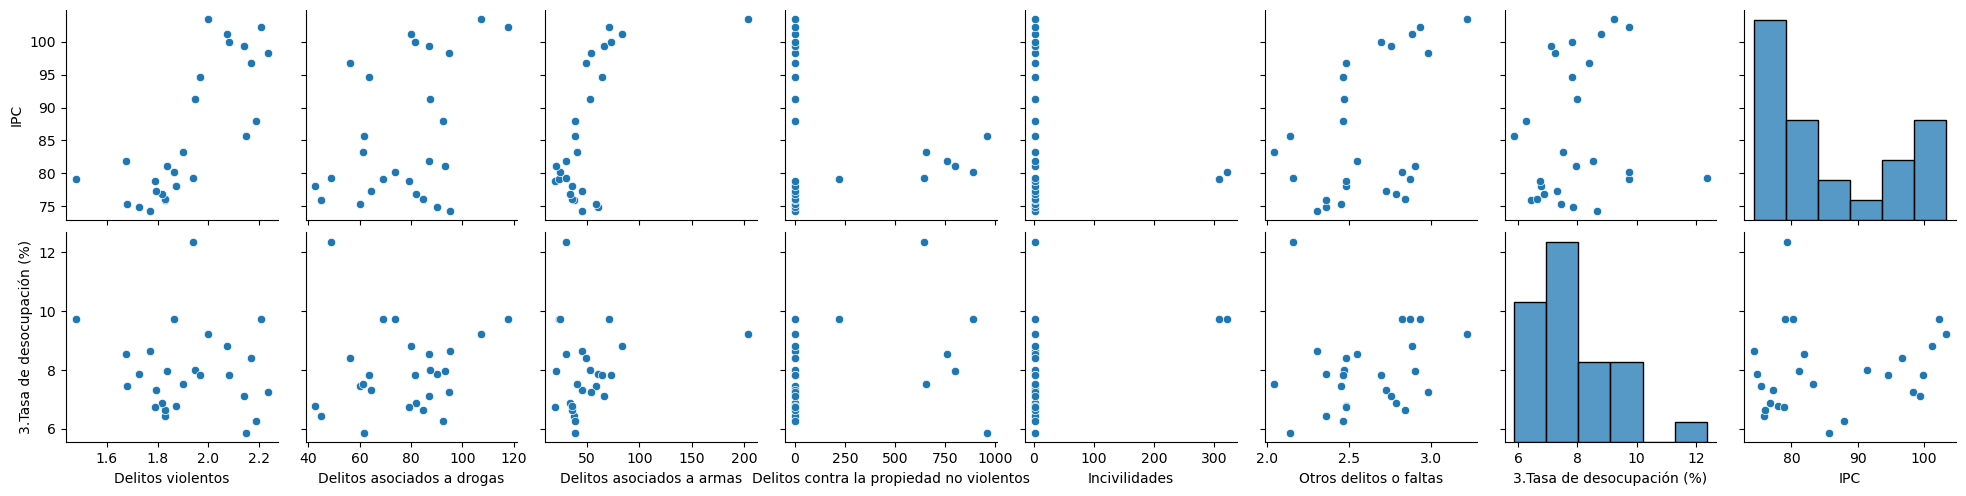

#=============================================================#
REGION - Los Lagos
#=============================================================#


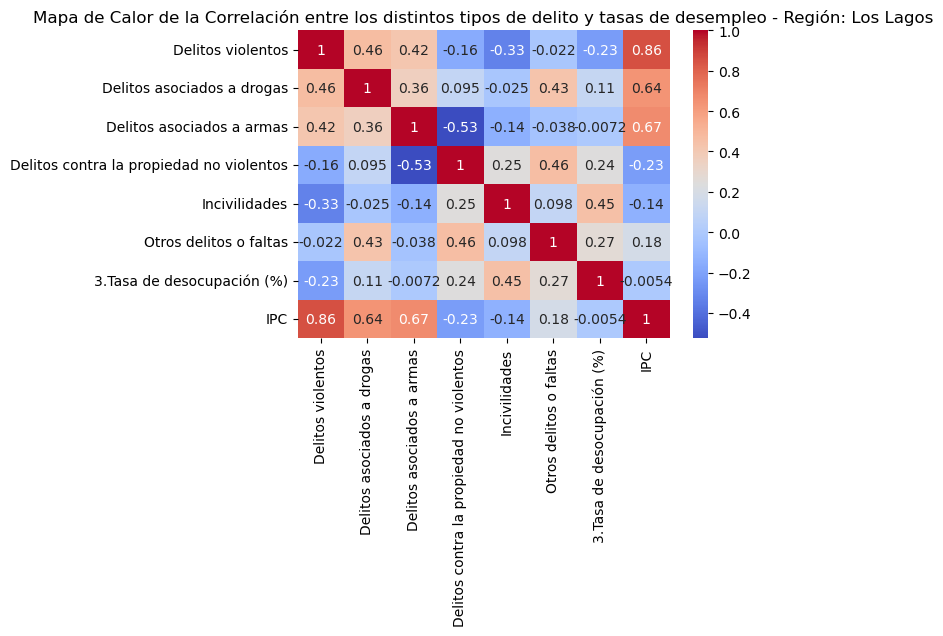

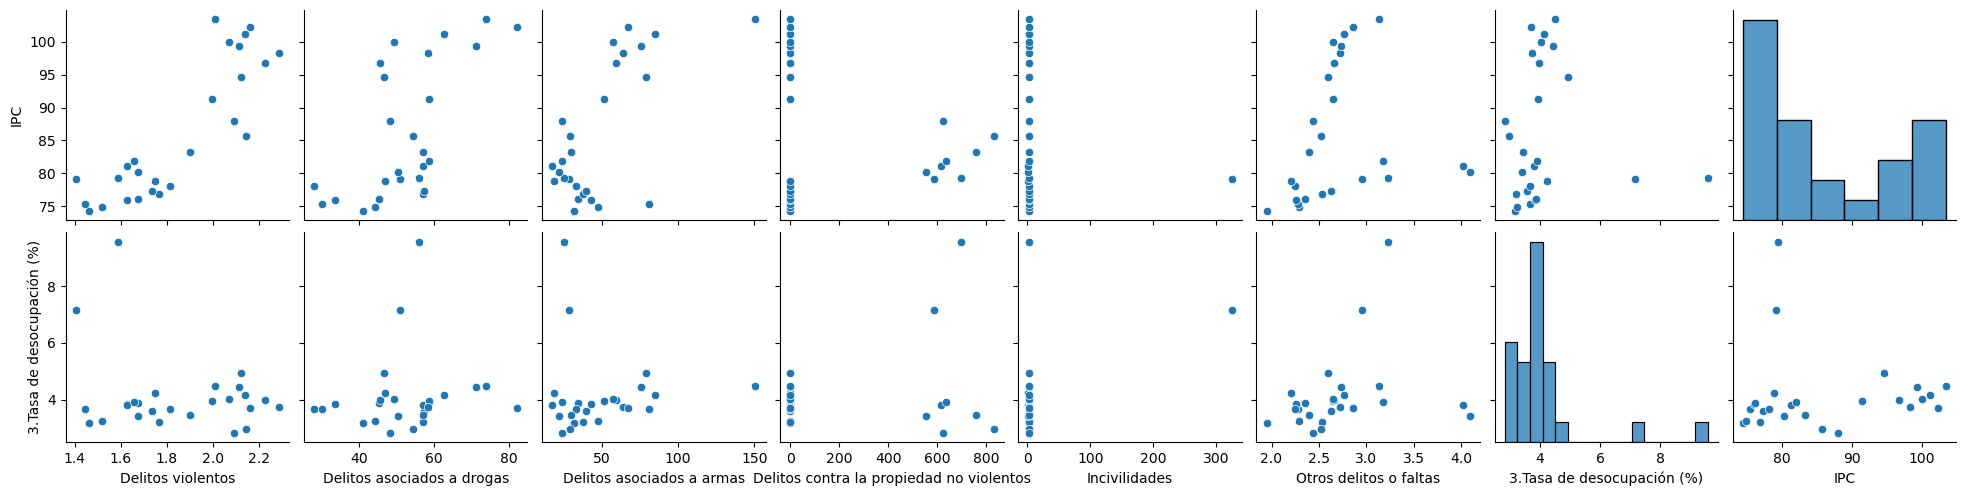

#=============================================================#
REGION - Los Ríos
#=============================================================#


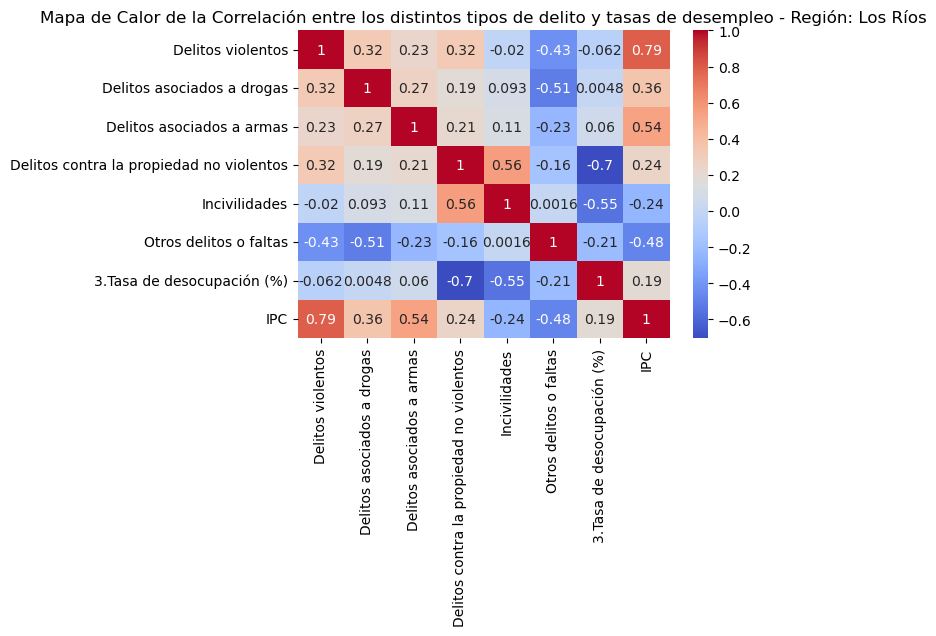

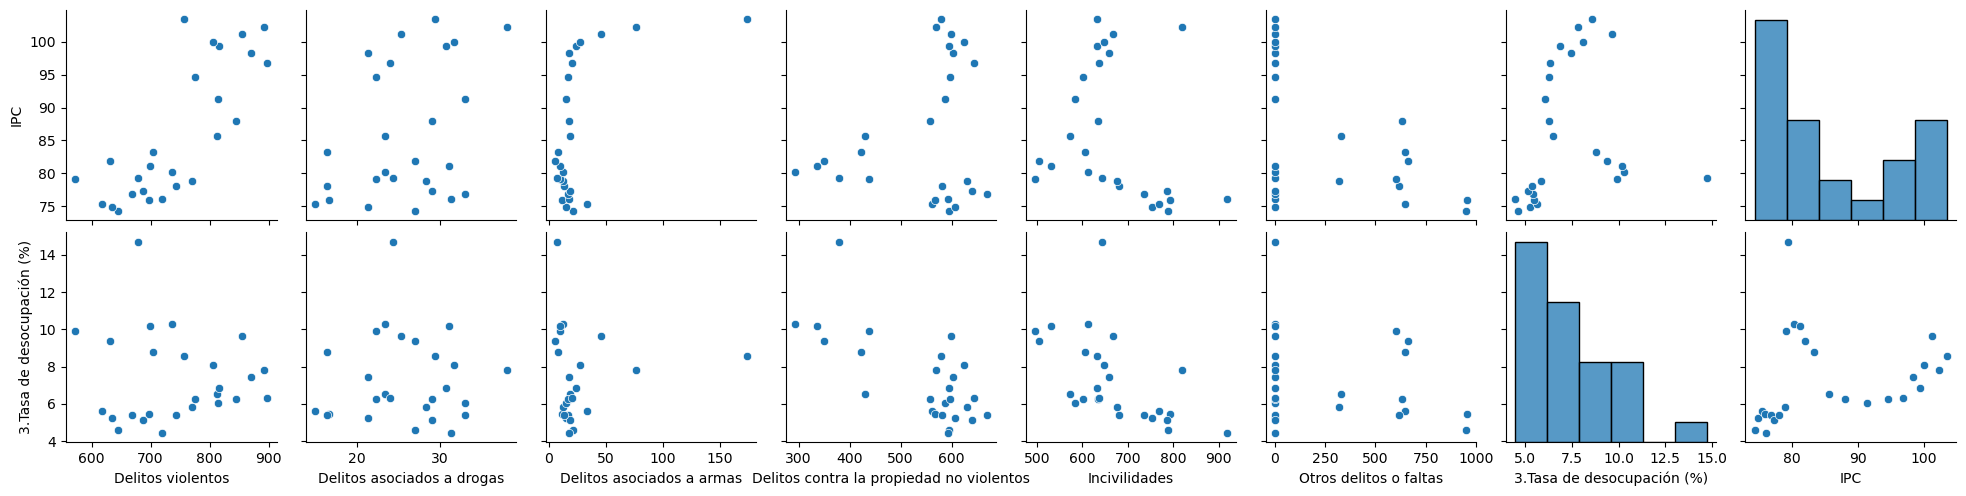

#=============================================================#
REGION - Magallanes y la Antártica Chilena
#=============================================================#


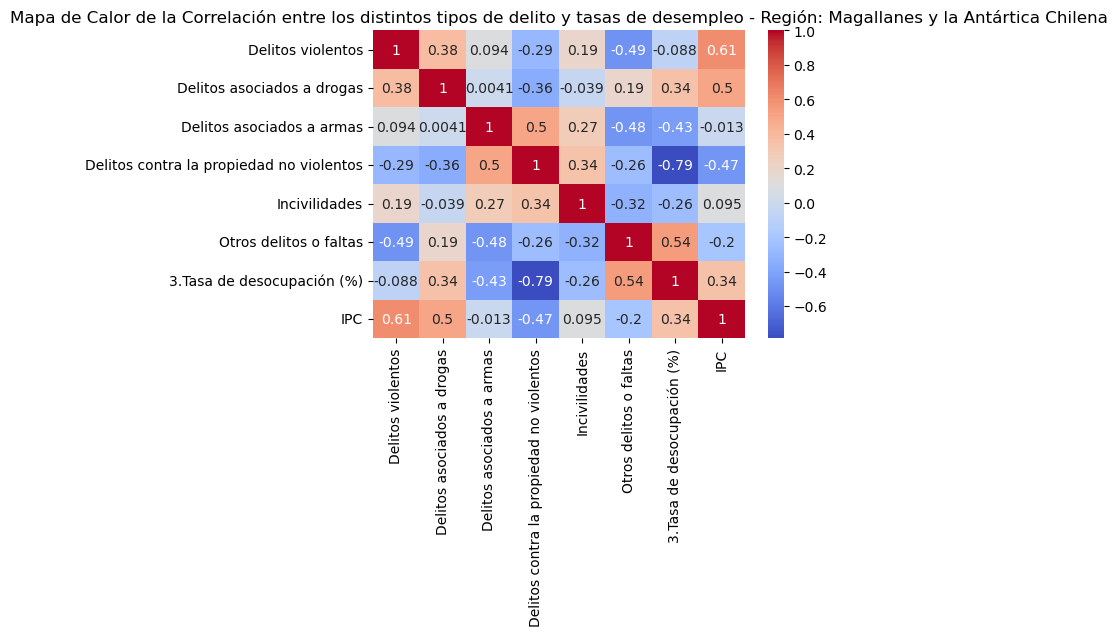

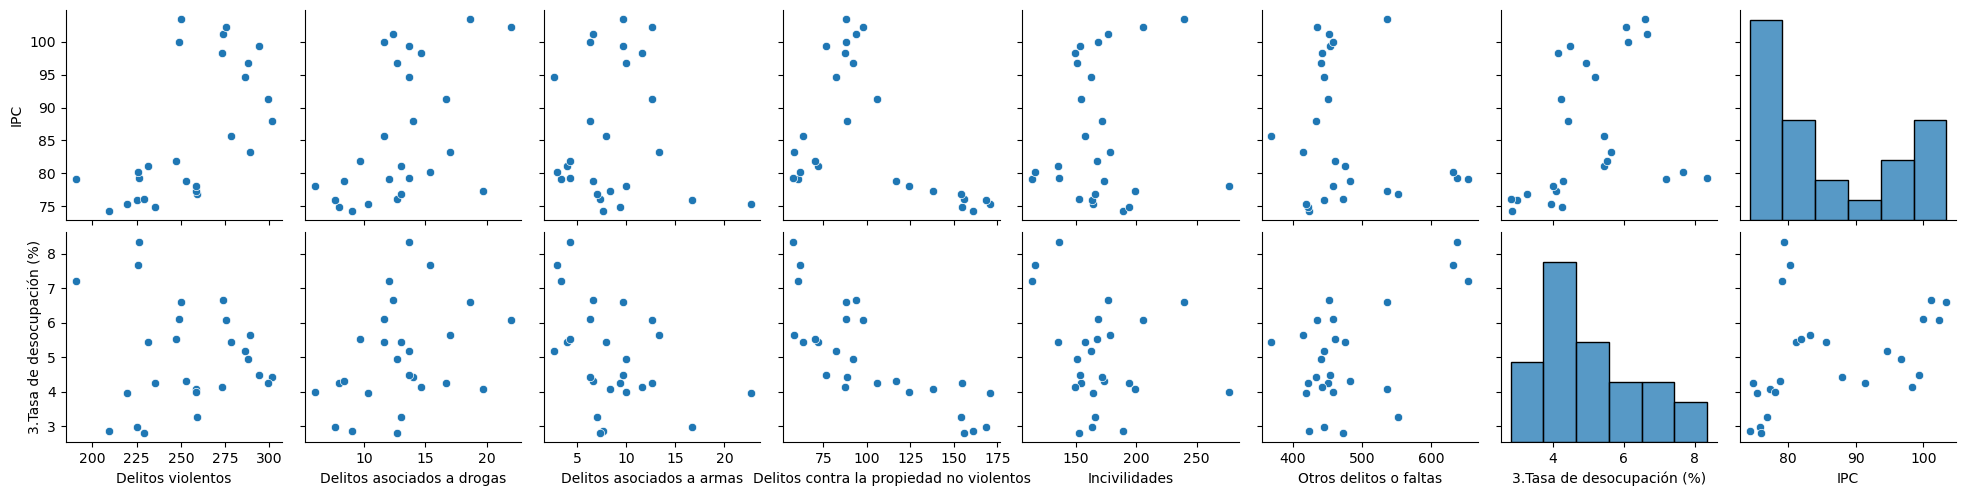

#=============================================================#
REGION - Maule
#=============================================================#


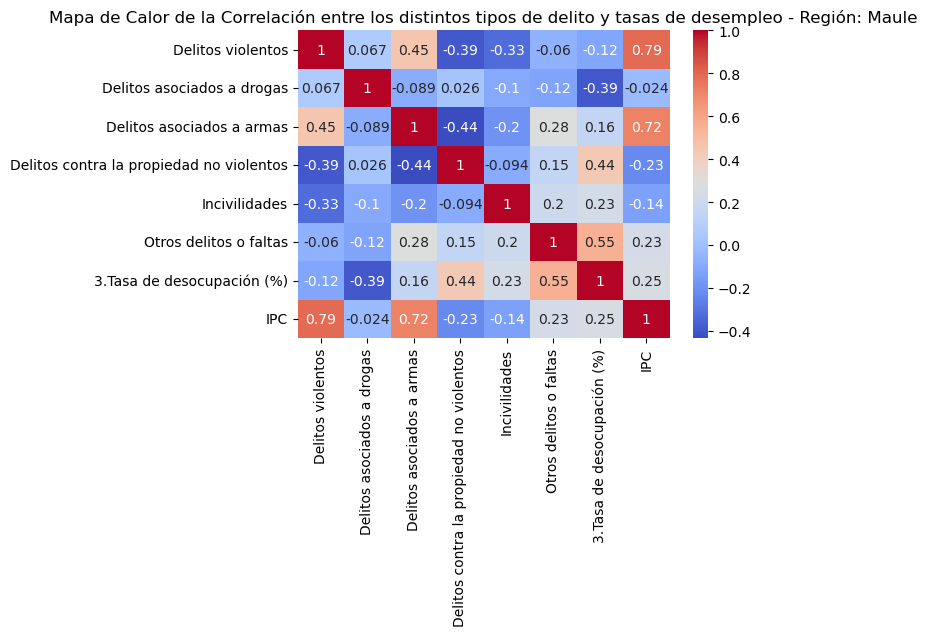

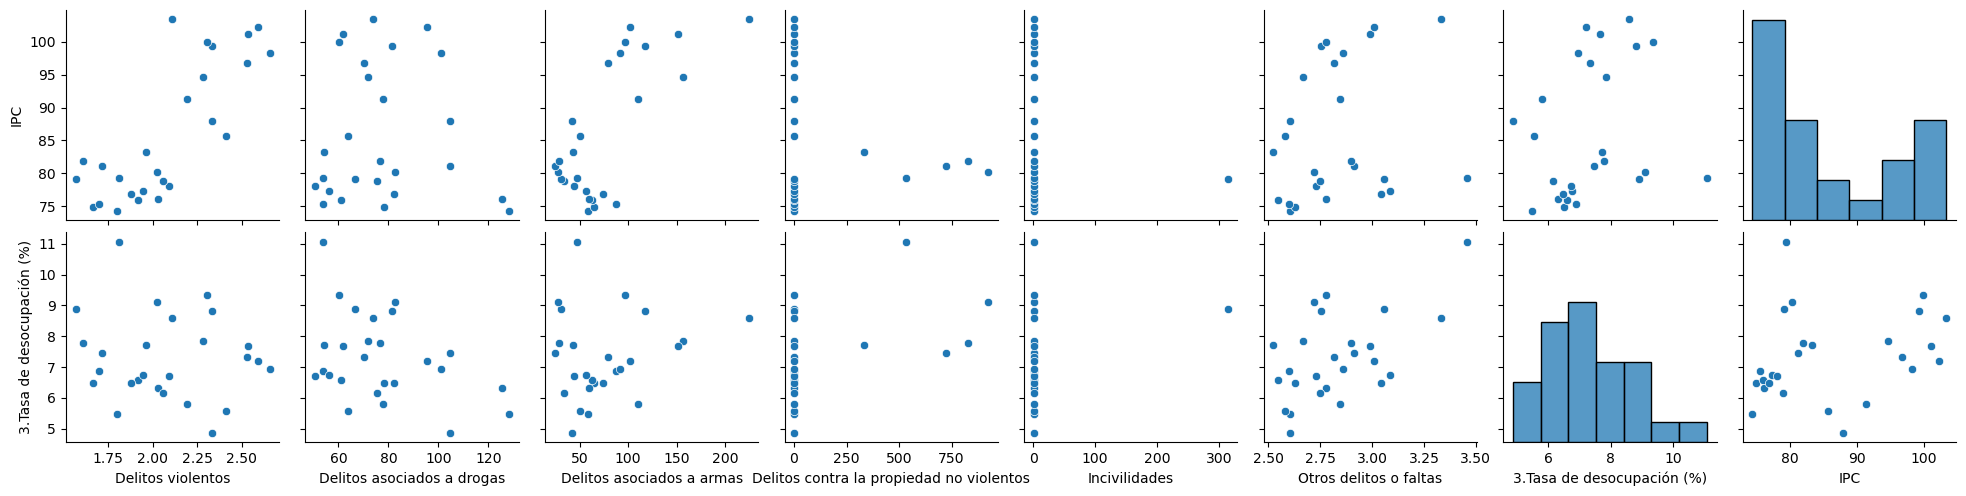

#=============================================================#
REGION - O'Higgins
#=============================================================#


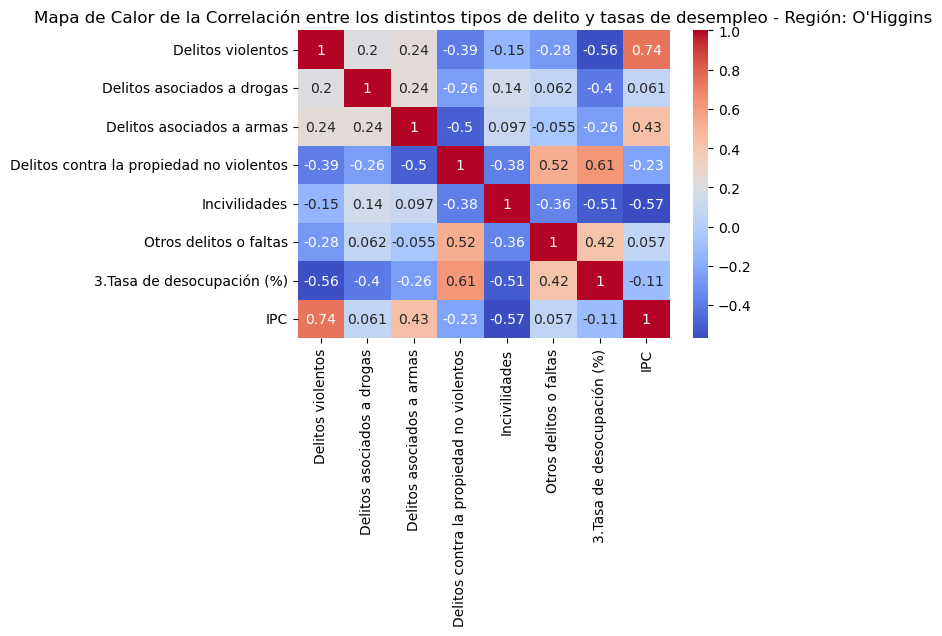

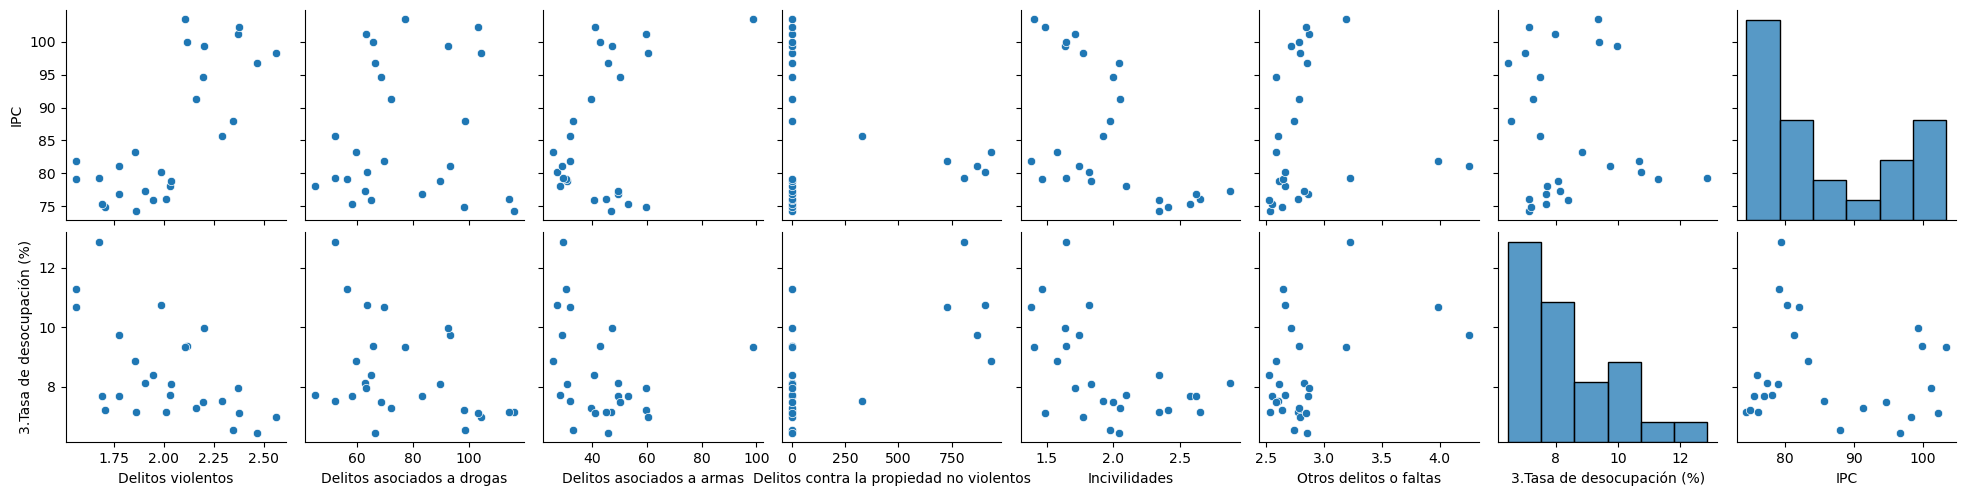

#=============================================================#
REGION - Región Metropolitana de Santiago
#=============================================================#


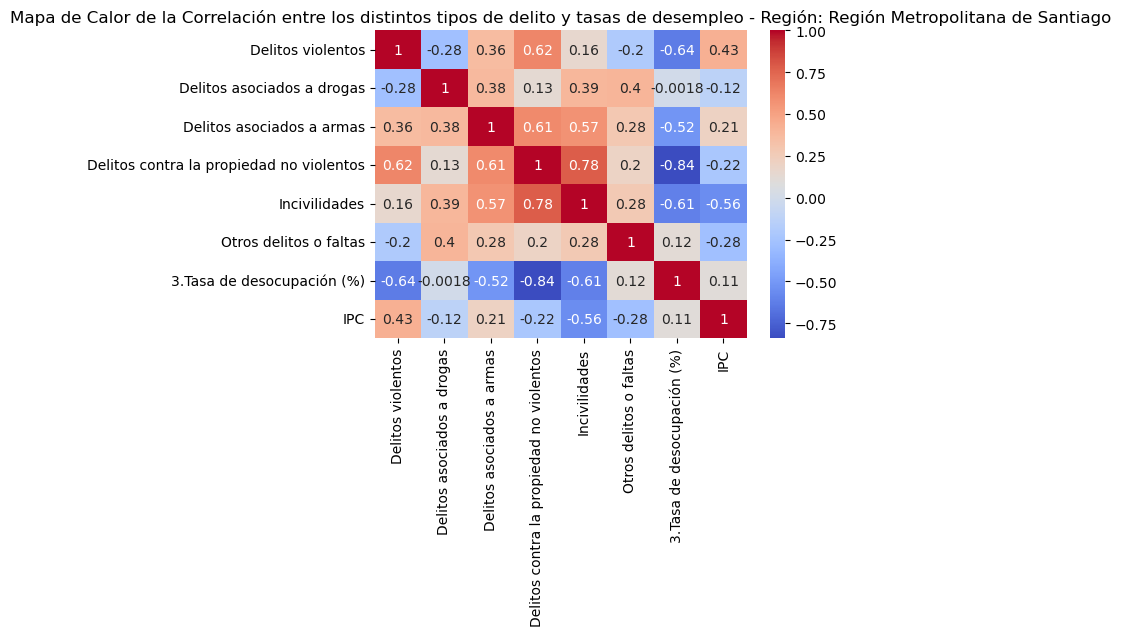

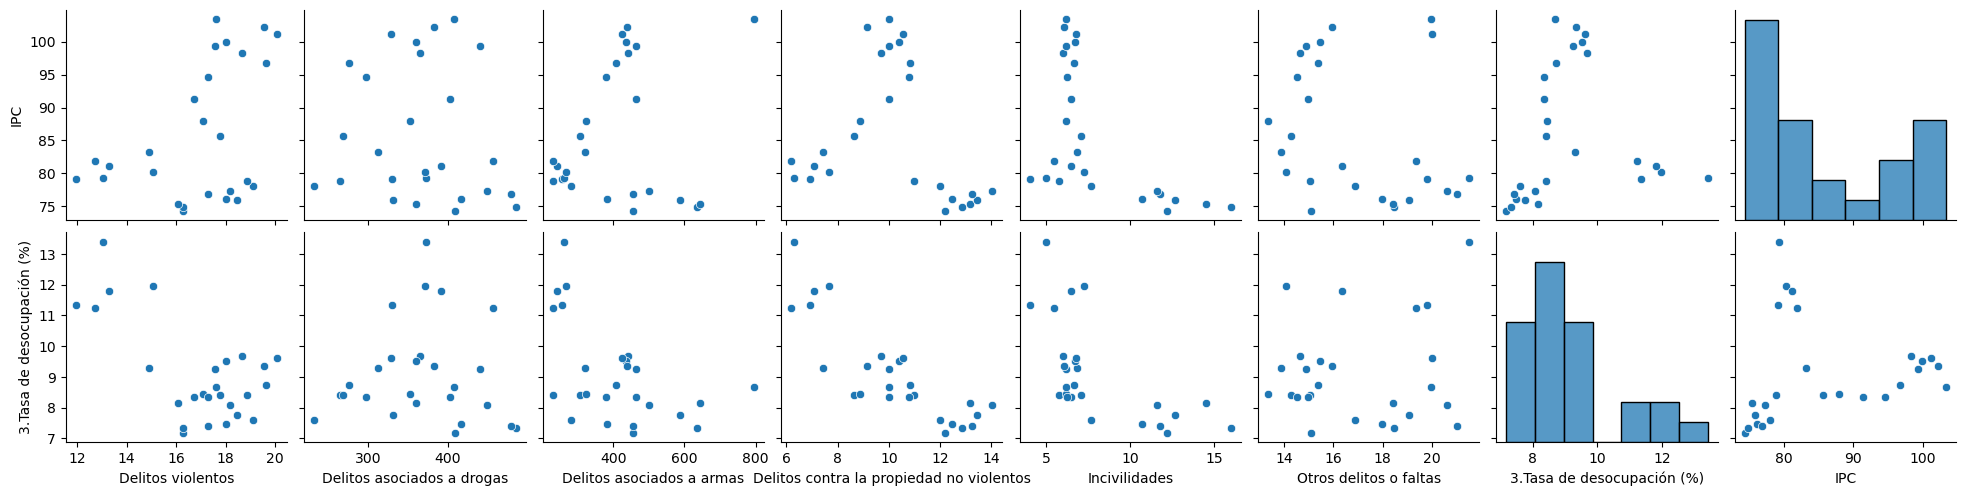

#=============================================================#
REGION - Tarapacá
#=============================================================#


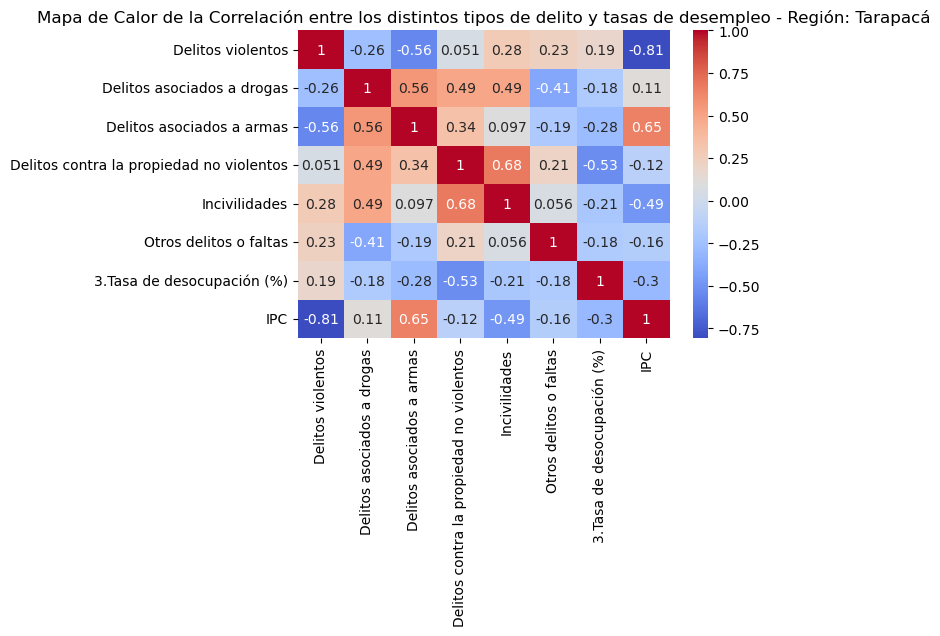

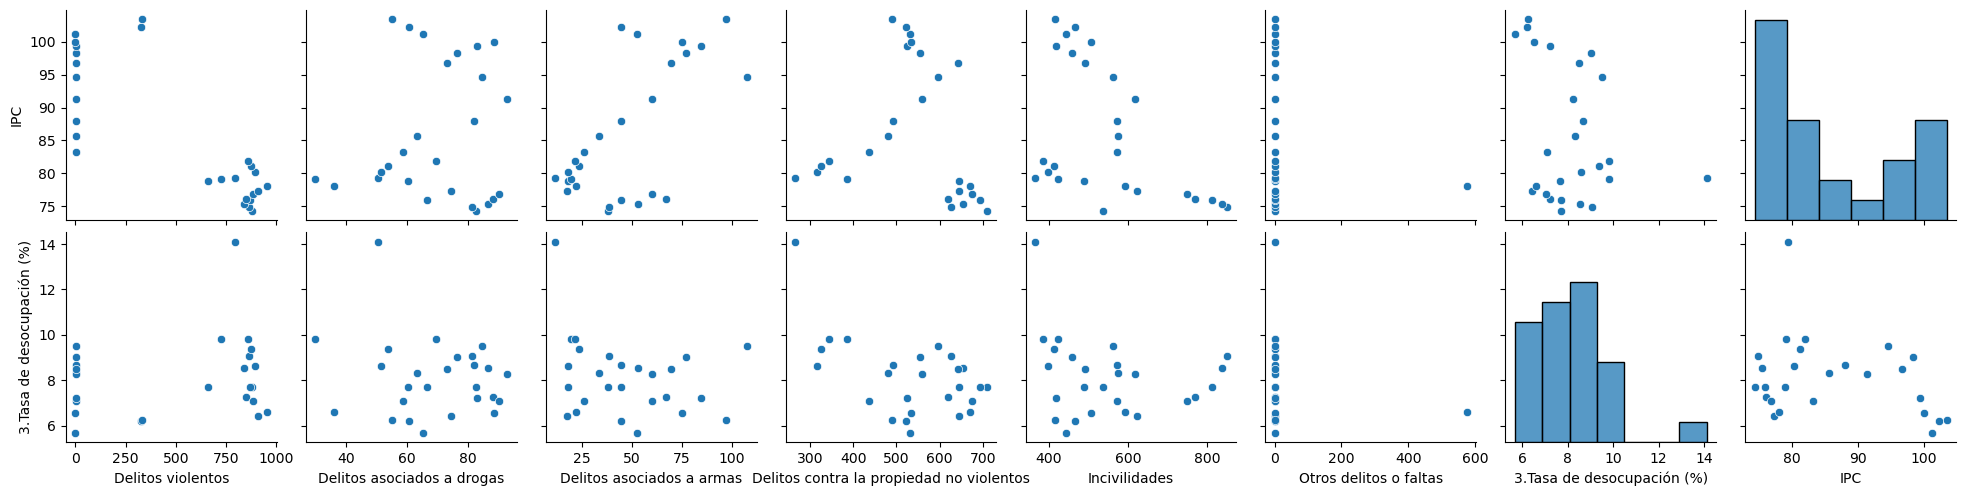

#=============================================================#
REGION - Valparaíso
#=============================================================#


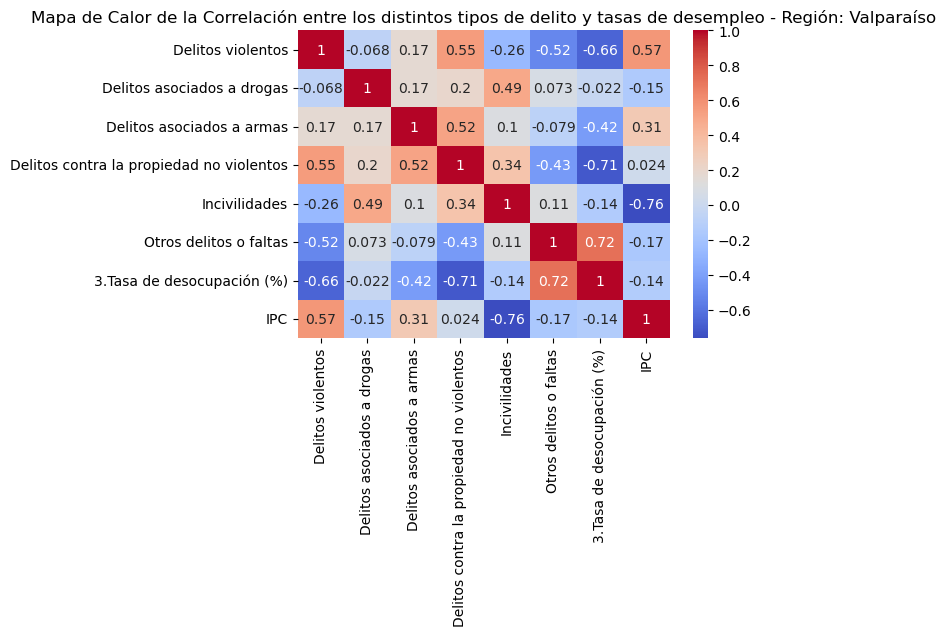

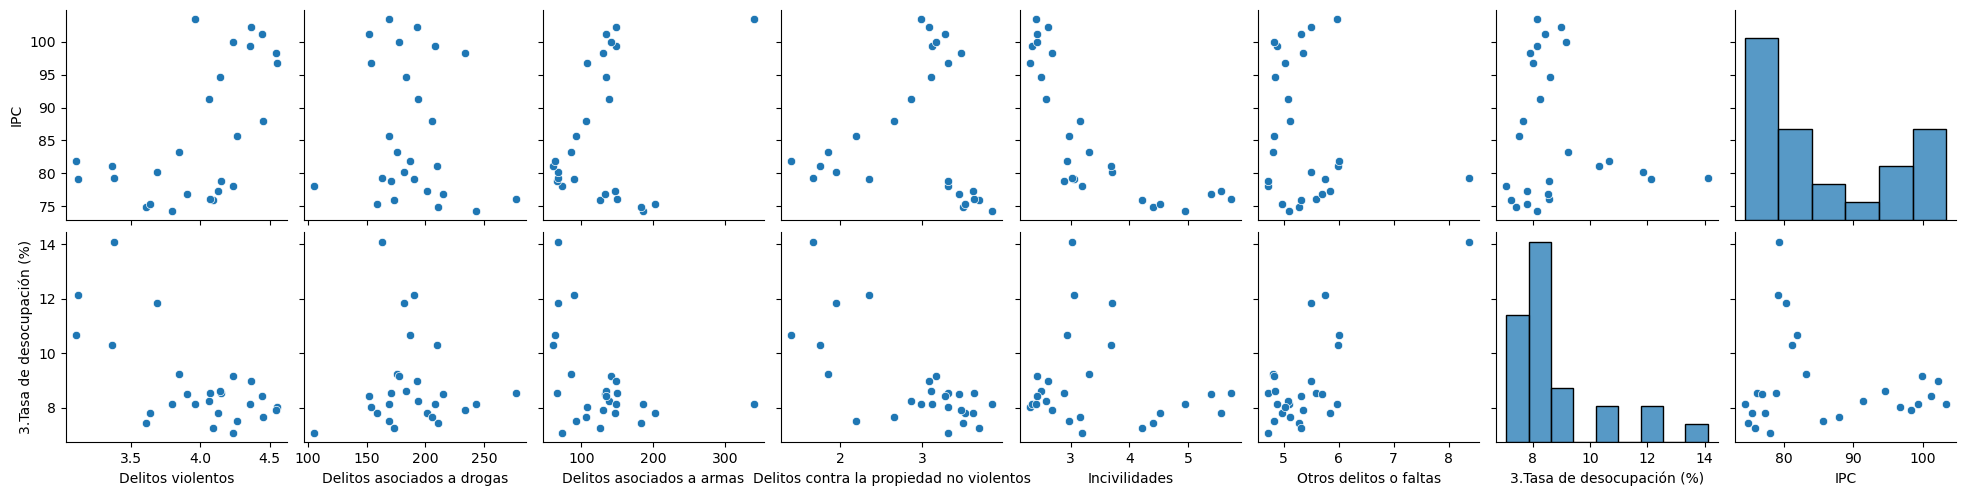

#=============================================================#
REGION - Ñuble
#=============================================================#


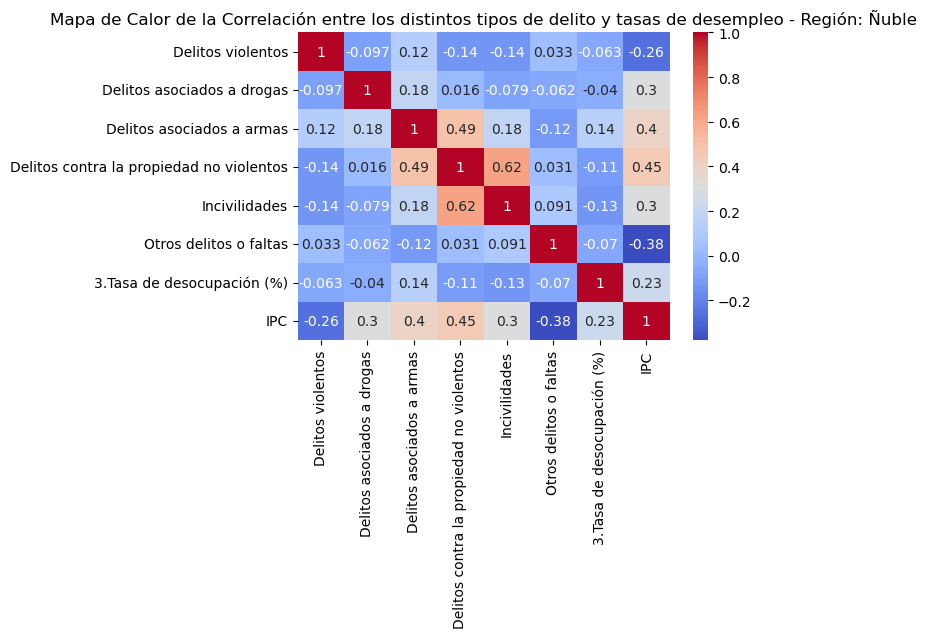

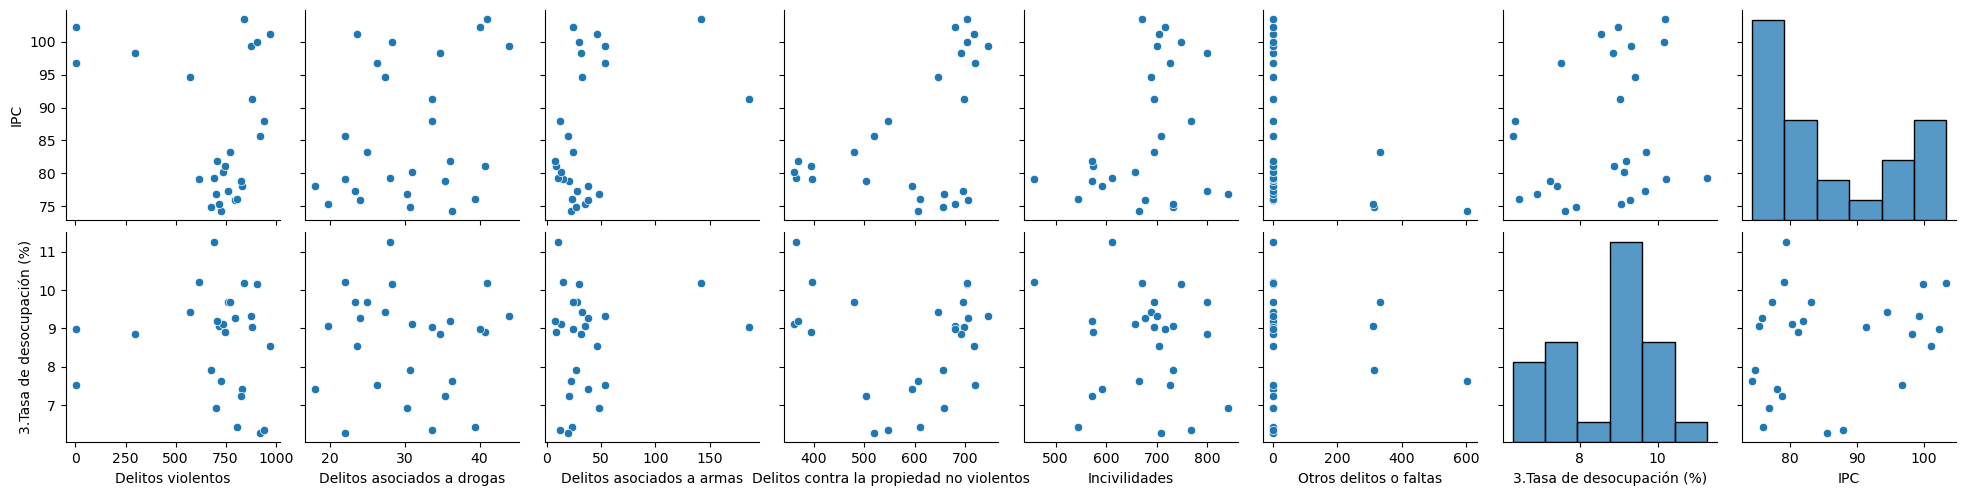

In [30]:
for reg in df_cid['Region_name'].unique():
    df_cid_reg = df_cid[df_cid['Region_name'] == reg]

    print("#=============================================================#")
    print(f"REGION - {reg}")
    print("#=============================================================#")

    fig, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(df_cid_reg.iloc[:, 3:].corr(), annot=True, cmap='coolwarm', ax=ax)
    plt.title(f"Mapa de Calor de la Correlación entre los distintos tipos de delito y tasas de desempleo - Región: {reg}")
    # plt.savefig(f'imagenes/pregunta 4/heatmap_indices_delitos_vs_IPC_Tasa_desocupacion_{reg}.png', bbox_inches="tight")
    # plt.close()
    plt.show() 

    pairplot = sns.pairplot(df_cid_reg, y_vars=["IPC", "3.Tasa de desocupación (%)"], x_vars=df_cid_reg.columns[3:])
    # pairplot.savefig(f'imagenes/pregunta 4/pairplot_indices_delitos_vs_IPC_Tasa_desocupacion_{reg}.png', bbox_inches="tight")
    # plt.close()
    plt.show()

*Respuesta:*
Gracias a los múltiples análisis realizados mediante pairplots y gráficos de calor para cada una de las regiones de Chile, he podido identificar varias tendencias generales. En primer lugar, la tasa de desocupación experimentó un notable aumento durante los años iniciales de la pandemia, mientras que, en esos mismos años, se observó una disminución general en los índices de criminalidad.

En cuanto a la pregunta planteada, puedo concluir que, en términos generales, ni la tasa de desocupación ni el IPC parecen ser indicadores suficientes para predecir un aumento en la criminalidad. Esto se debe a que, con excepción de algunas regiones, las correlaciones entre estas variables y los índices de criminalidad son bastante bajas, cercanas a cero. Sin embargo, cabe destacar que los índices de delitos violentos en la mayoría de las regiones muestran una correlación cercana a 1 con el IPC. Además, es importante mencionar que la inflación de la moneda chilena no ha dejado de crecer, con un aumento particularmente notable durante los años de la pandemia. Es interesante observar cómo los delitos violentos tienden a incrementarse con el tiempo.

En un análisis más detallado de la Región Metropolitana, se evidencia que, en general, los índices de criminalidad han aumentado de forma constante a lo largo de los años. Una excepción notable son los delitos relacionados con drogas, cuyos índices presentan una variabilidad poco regular. Además, se destaca el fuerte incremento en los delitos de incivilidad (que incluyen amenazas, comercio ambulante, consumo de bebidas alcohólicas en la vía pública, entre otros) durante el año del estallido social. También es relevante mencionar que, en esta región, la tasa de desempleo ha mostrado un descenso constante.

En el caso específico de la Región Metropolitana, tampoco parece que el IPC y la tasa de desempleo sean factores suficientes para explicar los cambios en los índices de criminalidad. A pesar de que el IPC ha mostrado un aumento significativo, y la tasa de desempleo ha disminuido considerablemente desde los años de la pandemia, la criminalidad continúa con un aumento ligero pero constante.

En resumen: los resultados sugieren que tanto el IPC como la tasa de desempleo, aunque relevantes en ciertos contextos específicos, no son determinantes para predecir los índices de criminalidad en las regiones de Chile, y es necesario considerar otros factores en un análisis más profundo.

###  ¿Existen diferencias significativas en la criminalidad entre las zonas urbanas y rurales de la region metropolitana, y que factores pueden explicarlas?

In [31]:
dict_rural_urban = {   
    13129: 0,  # San Joaquín (urbano)
    13130: 0,  # San Miguel (urbano)
    13131: 0,  # San Ramón (urbano)
    13108: 0,  # Independencia (urbano)
    13109: 0,  # La Cisterna (urbano)
    13122: 0,  # Peñalolén (urbano)
    13123: 0,  # Providencia (urbano)
    13113: 0,  # La Reina (urbano)
    13403: 1,  # Calera de Tango (rural)
    13301: 1,  # Colina (rural)
    13101: 0,  # Santiago (urbano)
    13302: 1,  # Lampa (rural)
    13202: 1,  # Pirque (rural)
    13201: 1,  # Puente Alto (rural)
    13107: 0,  # Huechuraba (urbano)
    13401: 0,  # San Bernardo (urbano)
    13503: 1,  # Curacaví (rural)
    13504: 1,  # María Pinto (rural)
    13102: 0,  # Cerrillos (urbano)
    13103: 0,  # Cerro Navia (urbano)
    13132: 0,  # Vitacura (urbano)
    13104: 0,  # Conchalí (urbano)
    13105: 0,  # El Bosque (urbano)
    13106: 0,  # Estación Central (urbano)
    13110: 0,  # La Florida (urbano)
    13111: 0,  # La Granja (urbano)
    13112: 0,  # La Pintana (urbano)
    13114: 0,  # Las Condes (urbano)
    13115: 0,  # Lo Barnechea (urbano)
    13116: 0,  # Lo Espejo (urbano)
    13117: 0,  # Lo Prado (urbano)
    13118: 0,  # Macul (urbano)
    13119: 0,  # Maipú (urbano)
    13120: 0,  # Ñuñoa (urbano)
    13121: 0,  # Pedro Aguirre Cerda (urbano)
    13124: 0,  # Pudahuel (urbano)
    13125: 0,  # Quilicura (urbano)
    13126: 0,  # Quinta Normal (urbano)
    13127: 0,  # Recoleta (urbano)
    13128: 0,  # Renca (urbano)
    13602: 1,  # El Monte (rural)
    13604: 1,  # Padre Hurtado (rural)
    13605: 1,  # Peñaflor (rural)
    13601: 1,  # Talagante (rural)
    13404: 1,  # Paine (rural)
    13603: 1,  # Isla de Maipo (rural)
    13402: 1,  # Buin (rural)
    13203: 1,  # San José de Maipo (rural)
    13303: 1,  # Tiltil (rural)
    13501: 1,  # Melipilla (rural)
    13505: 1,  # San Pedro (rural)
    13502: 1   # Alhué (rural)
}

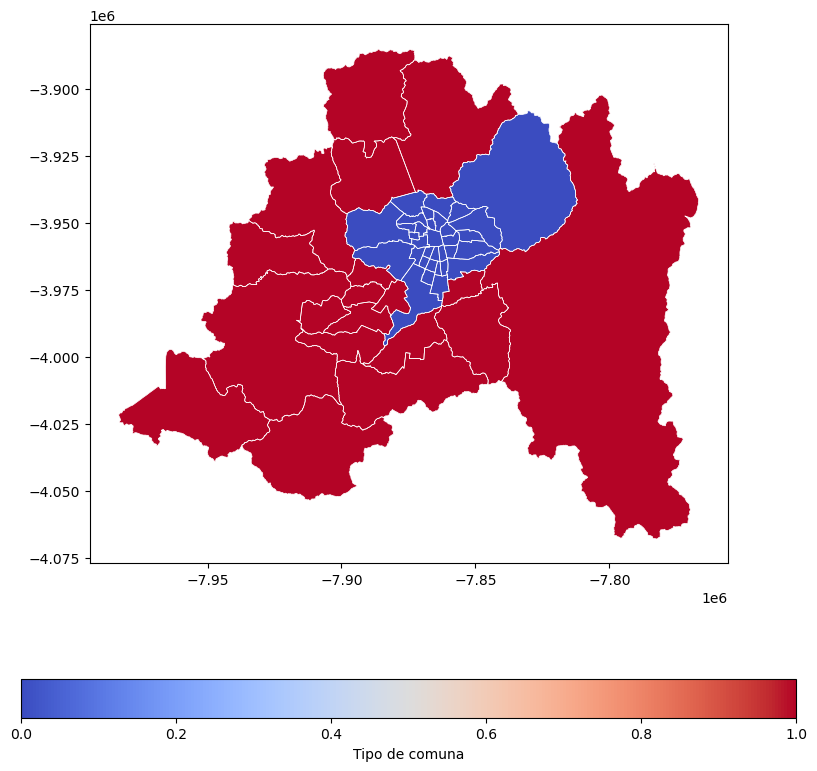

Azul significa urbano y rojo significa rural.


In [32]:
df_mapa_urbal = df_mapa.copy(deep=True)
df_mapa_urbal["urbana_rural"] = df_mapa_urbal["cod_comuna"].map(dict_rural_urban)
df_mapa_urbal.dropna(inplace=True)

color_map = {0: 'blue', 1: 'red'}

ax = df_mapa_urbal.plot(column="urbana_rural", cmap="coolwarm", legend=True, figsize=(10, 10),
                        legend_kwds={'label': "Tipo de comuna", 'orientation': "horizontal"})

df_mapa_urbal.boundary.plot(ax=ax, color='white', linewidth=0.5)

#for idx, row in df_mapa_urbal.iterrows():
#    centroid = row['geometry'].centroid
#    ax.text(centroid.x, centroid.y, row['Comuna'], fontsize=6, ha='center', color='black')

#plt.savefig(f'imagenes/pregunta 5/mapa_urbano_rural_comunas.png', bbox_inches="tight")
#plt.close()
plt.show()

print("Azul significa urbano y rojo significa rural.")


C:\Users\Jose\AppData\Local\Temp\ipykernel_18624\2853602946.py:34: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


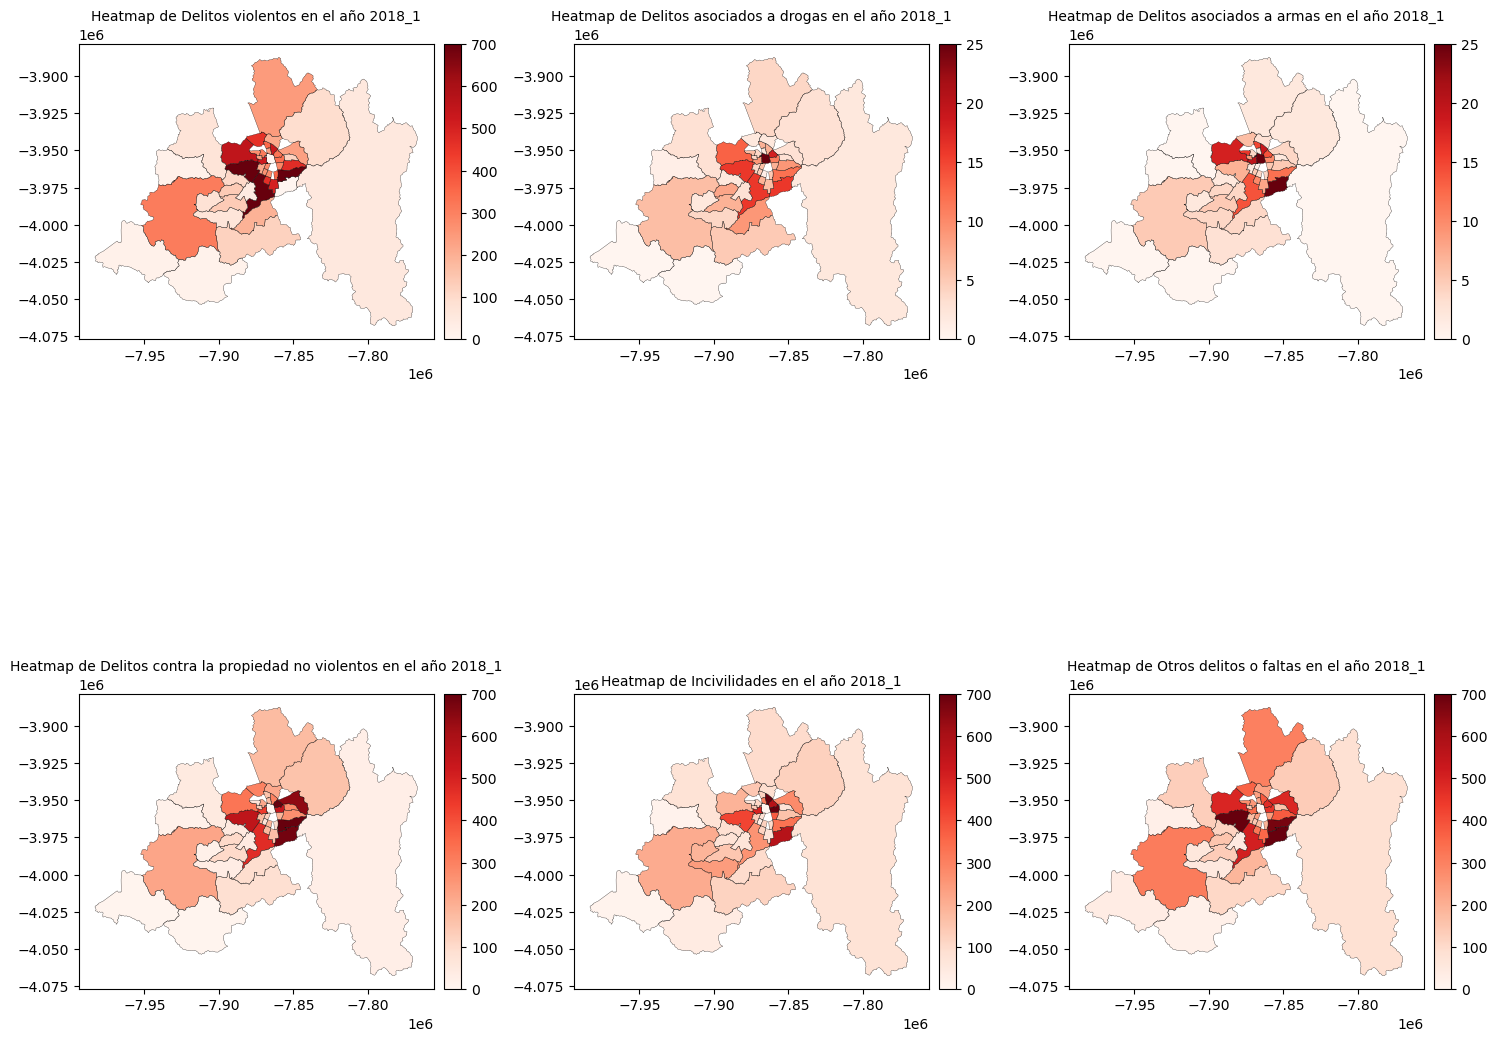

In [33]:
# df_ind_crime_com = pd.read_parquet("{path}datos de indice de criminalidad/DataFrames_total_comunas.parquet")
df_ind_crime_com = pd.read_parquet("datos de indice de criminalidad/DataFrames_total_comunas.parquet")

df_ind_crime_com["cod_comuna"] = df_ind_crime_com["cod_comuna"].astype(int)
df_mc = pd.merge(left=df_ind_crime_com, right=df_mapa, on="cod_comuna")
df_mc.dropna(axis=0, inplace=True)
df_mc = gpd.GeoDataFrame(df_mc, geometry='geometry')

def visualizar_por_fecha(fecha: datetime) -> None:
    df = df_mc[df_mc["fecha"] == fecha]
    columnas_in = ["Delitos violentos", "Delitos asociados a drogas", "Delitos asociados a armas",
                "Delitos contra la propiedad no violentos", "Incivilidades", "Otros delitos o faltas"]

    fig, axes = plt.subplots(2, 3, figsize=(15, 15))
    axes = axes.flatten()

    for i, column in enumerate(columnas_in):
        ax = axes[i]
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.1)

        if column in ["Delitos asociados a drogas", "Delitos asociados a armas"]:
            df.plot(ax=ax, vmin=0, vmax=25, cax=cax,
                column=column, cmap='Reds', legend=True)
        else:
            df.plot(vmin=0, vmax=700, ax=ax, cax=cax,
                column=column, cmap='Reds', legend=True)
        df.boundary.plot(ax=ax, lw=0.2, color='k')
        ax.set_title(f'Heatmap de {column} en el año {fecha.year}_{fecha.month}', fontsize=10)

    fig.tight_layout()
    # fig.savefig(f"imagenes/pregunta 5/heatmap_delitos_{fecha.year}_{fecha.month}.png", bbox_inches="tight")
    # plt.close(fig)
    fig.show()

fecha_base = pd.Timestamp("2018-01-01")
visualizar_por_fecha(fecha_base)

#fecha_tope = pd.Timestamp("2024-06-01")
#while fecha_base <= fecha_tope:
#    visualizar_por_fecha(fecha_base)
#    print(f"{fecha_base} esta lista")
#    fecha_base += pd.DateOffset(months=1)


*Respuesta:*

Gracias a la función que desarrollé utilizando GeoPandas, he podido analizar los distintos tipos de criminalidad en las comunas de la Región Metropolitana. Cabe mencionar que algunas comunas no se encuentran en el análisis, entre ellas: Lampa, Tiltil, Conchalí, Huechuraba, La Pintana y Pirque. Dejando esto de lado, es evidente que las zonas urbanas presentan índices de criminalidad significativamente más altos, algo que se puede observar claramente en el mapa geográfico presentado anteriormente, donde el rojo representa áreas rurales y el azul, áreas urbanas.

Destacan especialmente el centro de Santiago y comunas como Melipilla y Colina, que consistentemente muestran los índices más altos de criminalidad en general. Esto coincide con los patrones previamente observados en el análisis general de criminalidad de la región: un aumento significativo de los delitos de incivilidad durante los años del estallido social y una leve disminución general de los índices delictivos en otros periodos.

En cuanto a las comunas consideradas más "seguras" a lo largo del tiempo, destacan San José de Maipo, Lo Barnechea, Alhué, María Pinto y San Pedro. Entre estas, Lo Barnechea es la que presenta los índices de criminalidad más altos dentro del grupo de las comunas más seguras.

En relación a las comunas con mayores índices de criminalidad de forma constante, como el centro de Santiago, esto podría explicarse por su condición de capital, la alta densidad poblacional y la concentración de actividades económicas y sociales, lo que aumenta la probabilidad de que ocurran delitos. Por otro lado, en el caso de Melipilla, podría deberse a su condición de comuna rural con una mayor densidad de población y su ubicación estratégica, atravesada por la Autopista del Sol (Ruta 78), una de las más transitadas para conectar con el puerto de San Antonio y el litoral central.

Finalmente, en el caso de Colina, no tengo una hipótesis clara que explique sus altos índices de criminalidad recurrentes, lo que podría requerir un análisis más profundo. En resumen, el análisis reafirma la tendencia de mayores índices de criminalidad en zonas urbanas y destaca patrones específicos que invitan a reflexionar sobre las características y particularidades de cada comuna.